# MULTIVIEW CLUSTERING

## Workspace Setup

### Packages

In [1]:
from   sklearn.experimental  import enable_iterative_imputer
from   tqdm                  import tqdm
import copy                  as     cp
import jupyterthemes         as     jt
import matplotlib            as     mpl
import matplotlib.pyplot     as     plt
import mvlearn.cluster       as     mvc
import numpy                 as     np
import pandas                as     pd
import scipy.io              as     spi
import scipy.stats           as     sps
import sklearn.cluster       as     skc
import sklearn.decomposition as     skd
import sklearn.impute        as     ski
import sklearn.manifold      as     skma
import sklearn.metrics       as     skme
import sklearn.neighbors     as     skn
import sklearn.preprocessing as     skp
import sklearn.ensemble      as     ske
import warnings

### Global Variables

In [2]:
# ignore minor warnings
warnings.filterwarnings("ignore")

# use jupytertheme for plots
jt.jtplot.style()

# set font for plots
mpl.rcParams.update({'font.size':6})

# set global path
main_dir = '/cluster/work/borgw/SPSS/MultiOmicsAnalysis/'

# clustering
args = {}
args['kmeans']   = {'n_clusters':3}
args['dbscan']   = {'eps':1.5,\
                    'min_samples':5}
args['spectral'] = {'n_clusters':3,\
                    'affinity':'rbf',\
                    'gamma':1.,\
                    'assign_labels':'discretize'}

### Functions

In [3]:
def fstat_fig(dat_df,f_df,label):

    col = '%s_cluster' % label
    kw  = {'density':True,'alpha':.667}
    
    fig = plt.figure(figsize=(40,9))

    for i,v in enumerate(f_df.index[:10]):

        bs = np.linspace(int(dat_df[v].min()),int(dat_df[v].max()),25)
        ax = fig.add_subplot(2,5,i+1)

        for c in [d for d in dat_df[col].unique() if d!=-1]:
            m1 = np.round(dat_df.loc[dat_df[col]==c,v].mean(),1)
            m2 = np.round(dat_df.loc[dat_df[col]==c,v].median(),1)
            n  = np.round(dat_df.loc[dat_df[col]==c,v].shape[0],1)
            ax.hist(dat_df.loc[dat_df[col]==c,v],bins=bs,**kw,\
                    label=r'$n$=%s, $\mu$=%s, $m$=%s' % (n,m1,m2))

        ax.set_title(v)
        ax.legend()

    plt.close()
    
    return fig

def f_stats(df,c):
    
    k = len(df.loc[df[c]!=-1,c].unique())
    
    if k==1:
        print('no clusters')
    elif k==2:
        c0 = df.loc[df[c]==0,:].values
        c1 = df.loc[df[c]==1,:].values
        f,p = sps.f_oneway(c0,c1)
    elif k==3:
        c0 = df.loc[df[c]==0,:].values
        c1 = df.loc[df[c]==1,:].values
        c2 = df.loc[df[c]==2,:].values
        f,p = sps.f_oneway(c0,c1,c2)
    elif k==4:
        c0 = df.loc[df[c]==0,:].values
        c1 = df.loc[df[c]==1,:].values
        c2 = df.loc[df[c]==2,:].values
        c3 = df.loc[df[c]==3,:].values
        f,p = sps.f_oneway(c0,c1,c2,c3)
    elif k==5:
        c0 = df.loc[df[c]==0,:].values
        c1 = df.loc[df[c]==1,:].values
        c2 = df.loc[df[c]==2,:].values
        c3 = df.loc[df[c]==3,:].values
        c4 = df.loc[df[c]==4,:].values
        f,p = sps.f_oneway(c0,c1,c2,c3,c4)
    elif k==6:
        c0 = df.loc[df[c]==0,:].values
        c1 = df.loc[df[c]==1,:].values
        c2 = df.loc[df[c]==2,:].values
        c3 = df.loc[df[c]==3,:].values
        c4 = df.loc[df[c]==4,:].values
        c5 = df.loc[df[c]==5,:].values
        f,p = sps.f_oneway(c0,c1,c2,c3,c4,c5)
    elif k==7:
        c0 = df.loc[df[c]==0,:].values
        c1 = df.loc[df[c]==1,:].values
        c2 = df.loc[df[c]==2,:].values
        c3 = df.loc[df[c]==3,:].values
        c4 = df.loc[df[c]==4,:].values
        c5 = df.loc[df[c]==5,:].values
        c6 = df.loc[df[c]==6,:].values
        f,p = sps.f_oneway(c0,c1,c2,c3,c4,c5,c6)
    elif k==8:
        c0 = df.loc[df[c]==0,:].values
        c1 = df.loc[df[c]==1,:].values
        c2 = df.loc[df[c]==2,:].values
        c3 = df.loc[df[c]==3,:].values
        c4 = df.loc[df[c]==4,:].values
        c5 = df.loc[df[c]==5,:].values
        c6 = df.loc[df[c]==6,:].values
        c7 = df.loc[df[c]==7,:].values
        f,p = sps.f_oneway(c0,c1,c2,c3,c4,c5,c6,c7)
    elif k==9:
        c0 = df.loc[df[c]==0,:].values
        c1 = df.loc[df[c]==1,:].values
        c2 = df.loc[df[c]==2,:].values
        c3 = df.loc[df[c]==3,:].values
        c4 = df.loc[df[c]==4,:].values
        c5 = df.loc[df[c]==5,:].values
        c6 = df.loc[df[c]==6,:].values
        c7 = df.loc[df[c]==7,:].values
        c8 = df.loc[df[c]==8,:].values
        f,p = sps.f_oneway(c0,c1,c2,c3,c4,c5,c6,c7,c8)
    elif k==10:
        c0 = df.loc[df[c]==0,:].values
        c1 = df.loc[df[c]==1,:].values
        c2 = df.loc[df[c]==2,:].values
        c3 = df.loc[df[c]==3,:].values
        c4 = df.loc[df[c]==4,:].values
        c5 = df.loc[df[c]==5,:].values
        c6 = df.loc[df[c]==6,:].values
        c7 = df.loc[df[c]==7,:].values
        c8 = df.loc[df[c]==8,:].values
        c9 = df.loc[df[c]==9,:].values
        f,p = sps.f_oneway(c0,c1,c2,c3,c4,c5,c6,c7,c8,c9)
    elif k==11:
        c0 = df.loc[df[c]==0,:].values
        c1 = df.loc[df[c]==1,:].values
        c2 = df.loc[df[c]==2,:].values
        c3 = df.loc[df[c]==3,:].values
        c4 = df.loc[df[c]==4,:].values
        c5 = df.loc[df[c]==5,:].values
        c6 = df.loc[df[c]==6,:].values
        c7 = df.loc[df[c]==7,:].values
        c8 = df.loc[df[c]==8,:].values
        c9 = df.loc[df[c]==9,:].values
        c10 = df.loc[df[c]==10,:].values
        f,p = sps.f_oneway(c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10)
    elif k==12:
        c0 = df.loc[df[c]==0,:].values
        c1 = df.loc[df[c]==1,:].values
        c2 = df.loc[df[c]==2,:].values
        c3 = df.loc[df[c]==3,:].values
        c4 = df.loc[df[c]==4,:].values
        c5 = df.loc[df[c]==5,:].values
        c6 = df.loc[df[c]==6,:].values
        c7 = df.loc[df[c]==7,:].values
        c8 = df.loc[df[c]==8,:].values
        c9 = df.loc[df[c]==9,:].values
        c10 = df.loc[df[c]==10,:].values
        c11 = df.loc[df[c]==11,:].values
        f,p = sps.f_oneway(c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11)
    elif k==13:
        c0 = df.loc[df[c]==0,:].values
        c1 = df.loc[df[c]==1,:].values
        c2 = df.loc[df[c]==2,:].values
        c3 = df.loc[df[c]==3,:].values
        c4 = df.loc[df[c]==4,:].values
        c5 = df.loc[df[c]==5,:].values
        c6 = df.loc[df[c]==6,:].values
        c7 = df.loc[df[c]==7,:].values
        c8 = df.loc[df[c]==8,:].values
        c9 = df.loc[df[c]==9,:].values
        c10 = df.loc[df[c]==10,:].values
        c11 = df.loc[df[c]==11,:].values
        c12 = df.loc[df[c]==12,:].values
        f,p = sps.f_oneway(c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12)
    elif k==14:
        c0 = df.loc[df[c]==0,:].values
        c1 = df.loc[df[c]==1,:].values
        c2 = df.loc[df[c]==2,:].values
        c3 = df.loc[df[c]==3,:].values
        c4 = df.loc[df[c]==4,:].values
        c5 = df.loc[df[c]==5,:].values
        c6 = df.loc[df[c]==6,:].values
        c7 = df.loc[df[c]==7,:].values
        c8 = df.loc[df[c]==8,:].values
        c9 = df.loc[df[c]==9,:].values
        c10 = df.loc[df[c]==10,:].values
        c11 = df.loc[df[c]==11,:].values
        c12 = df.loc[df[c]==12,:].values
        c13 = df.loc[df[c]==13,:].values
        f,p = sps.f_oneway(c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13)
    elif k==15:
        c0 = df.loc[df[c]==0,:].values
        c1 = df.loc[df[c]==1,:].values
        c2 = df.loc[df[c]==2,:].values
        c3 = df.loc[df[c]==3,:].values
        c4 = df.loc[df[c]==4,:].values
        c5 = df.loc[df[c]==5,:].values
        c6 = df.loc[df[c]==6,:].values
        c7 = df.loc[df[c]==7,:].values
        c8 = df.loc[df[c]==8,:].values
        c9 = df.loc[df[c]==9,:].values
        c10 = df.loc[df[c]==10,:].values
        c11 = df.loc[df[c]==11,:].values
        c12 = df.loc[df[c]==12,:].values
        c13 = df.loc[df[c]==13,:].values
        c14 = df.loc[df[c]==14,:].values
        f,p = sps.f_oneway(c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14)
    elif k==16:
        c0 = df.loc[df[c]==0,:].values
        c1 = df.loc[df[c]==1,:].values
        c2 = df.loc[df[c]==2,:].values
        c3 = df.loc[df[c]==3,:].values
        c4 = df.loc[df[c]==4,:].values
        c5 = df.loc[df[c]==5,:].values
        c6 = df.loc[df[c]==6,:].values
        c7 = df.loc[df[c]==7,:].values
        c8 = df.loc[df[c]==8,:].values
        c9 = df.loc[df[c]==9,:].values
        c10 = df.loc[df[c]==10,:].values
        c11 = df.loc[df[c]==11,:].values
        c12 = df.loc[df[c]==12,:].values
        c13 = df.loc[df[c]==13,:].values
        c14 = df.loc[df[c]==14,:].values
        c15 = df.loc[df[c]==15,:].values
        f,p = sps.f_oneway(c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15)
    elif k==17:
        c0 = df.loc[df[c]==0,:].values
        c1 = df.loc[df[c]==1,:].values
        c2 = df.loc[df[c]==2,:].values
        c3 = df.loc[df[c]==3,:].values
        c4 = df.loc[df[c]==4,:].values
        c5 = df.loc[df[c]==5,:].values
        c6 = df.loc[df[c]==6,:].values
        c7 = df.loc[df[c]==7,:].values
        c8 = df.loc[df[c]==8,:].values
        c9 = df.loc[df[c]==9,:].values
        c10 = df.loc[df[c]==10,:].values
        c11 = df.loc[df[c]==11,:].values
        c12 = df.loc[df[c]==12,:].values
        c13 = df.loc[df[c]==13,:].values
        c14 = df.loc[df[c]==14,:].values
        c15 = df.loc[df[c]==15,:].values
        c16 = df.loc[df[c]==16,:].values
        f,p = sps.f_oneway(c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16)
    elif k==18:
        c0 = df.loc[df[c]==0,:].values
        c1 = df.loc[df[c]==1,:].values
        c2 = df.loc[df[c]==2,:].values
        c3 = df.loc[df[c]==3,:].values
        c4 = df.loc[df[c]==4,:].values
        c5 = df.loc[df[c]==5,:].values
        c6 = df.loc[df[c]==6,:].values
        c7 = df.loc[df[c]==7,:].values
        c8 = df.loc[df[c]==8,:].values
        c9 = df.loc[df[c]==9,:].values
        c10 = df.loc[df[c]==10,:].values
        c11 = df.loc[df[c]==11,:].values
        c12 = df.loc[df[c]==12,:].values
        c13 = df.loc[df[c]==13,:].values
        c14 = df.loc[df[c]==14,:].values
        c15 = df.loc[df[c]==15,:].values
        c16 = df.loc[df[c]==16,:].values
        c17 = df.loc[df[c]==17,:].values
        f,p = sps.f_oneway(c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17)
    elif k==19:
        c0 = df.loc[df[c]==0,:].values
        c1 = df.loc[df[c]==1,:].values
        c2 = df.loc[df[c]==2,:].values
        c3 = df.loc[df[c]==3,:].values
        c4 = df.loc[df[c]==4,:].values
        c5 = df.loc[df[c]==5,:].values
        c6 = df.loc[df[c]==6,:].values
        c7 = df.loc[df[c]==7,:].values
        c8 = df.loc[df[c]==8,:].values
        c9 = df.loc[df[c]==9,:].values
        c10 = df.loc[df[c]==10,:].values
        c11 = df.loc[df[c]==11,:].values
        c12 = df.loc[df[c]==12,:].values
        c13 = df.loc[df[c]==13,:].values
        c14 = df.loc[df[c]==14,:].values
        c15 = df.loc[df[c]==15,:].values
        c16 = df.loc[df[c]==16,:].values
        c17 = df.loc[df[c]==17,:].values
        c18 = df.loc[df[c]==18,:].values
        f,p = sps.f_oneway(c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18)
    elif k==20:
        c0 = df.loc[df[c]==0,:].values
        c1 = df.loc[df[c]==1,:].values
        c2 = df.loc[df[c]==2,:].values
        c3 = df.loc[df[c]==3,:].values
        c4 = df.loc[df[c]==4,:].values
        c5 = df.loc[df[c]==5,:].values
        c6 = df.loc[df[c]==6,:].values
        c7 = df.loc[df[c]==7,:].values
        c8 = df.loc[df[c]==8,:].values
        c9 = df.loc[df[c]==9,:].values
        c10 = df.loc[df[c]==10,:].values
        c11 = df.loc[df[c]==11,:].values
        c12 = df.loc[df[c]==12,:].values
        c13 = df.loc[df[c]==13,:].values
        c14 = df.loc[df[c]==14,:].values
        c15 = df.loc[df[c]==15,:].values
        c16 = df.loc[df[c]==16,:].values
        c17 = df.loc[df[c]==17,:].values
        c18 = df.loc[df[c]==18,:].values
        c19 = df.loc[df[c]==19,:].values
        f,p = sps.f_oneway(c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19)
        
    fs_df = pd.DataFrame(f,index=df.columns,columns=['f_stat'])
    fs_df = fs_df.drop(c,axis=0)
    fs_df = fs_df.sort_values('f_stat',ascending=False)
    
    return fs_df

def assign_clusters(dat_df,clu_df,label):
    
    col = '%s_cluster' % label
    
    if col not in dat_df.columns:

        sv_df = pd.concat([dat_df,clu_df['dbscan']],axis=1)
        c_dct = {}
        c_dct['dbscan'] = col

        for c in clu_df.columns:
            if 'ts' in c:
                c_dct[c] = '%s_%s' % (label,c)

        sv_df = sv_df.rename(columns=c_dct)
        
    else:
        
        sv_df = dat_df
    
    return sv_df

def ortho_project(dat_df,sub_df):
    
    ort_df = dat_df.copy(deep=True)
    
    for c in sub_df.columns:
        
        prj_df = np.outer(np.dot(sub_df[c],dat_df)/np.dot(sub_df[c],sub_df[c]),sub_df[c]).T
        ort_df = ort_df-prj_df
    
    return ort_df

def projection(dat_df,sub_df):
    
    prj_df = np.matmul(dat_df,sub_df.T)
    prj_df = prj_df.rename(columns={0:'p0',1:'p1',2:'p2'})
    
    return prj_df
 
def f_pvalues(dat_df,c,l):
    
    f0 = 'ConsensusClustering/data/%s_H0_fstats_%d.csv' % (c,int(100*l))
    f1 = 'ConsensusClustering/data/%s_fstats_%d.csv' % (c,int(100*l))
    
    try:
        
        f_df    = pd.read_csv('%s%s' % (main_dir,f1), index_col=0)
        null_df = pd.read_csv('%s%s' % (main_dir,f0), index_col=0)
        
    except:
    
        c       = '%s_cluster' % c
        cols    = [col for col in dat_df.columns if col!=c]
        n       = int(np.ceil(len(cols)/l-1))
        f_df    = pd.DataFrame(index=cols,columns=['p_value'])
        f_df    = pd.concat([f_df,f_stats(dat_df,c)],join='outer',axis=1)

        null_df = pd.DataFrame(index=cols)

        for p in tqdm(range(n-1)):

            perm_df    = dat_df.copy()
            perm_df[c] = np.random.permutation(perm_df[c])
            null_df    = pd.concat([null_df,f_stats(perm_df,c)],\
                                   join='outer',axis=1)
            null_df    = null_df.rename(columns={'f_stat':p+1})

        for i in f_df.index:

            f   = f_df.loc[i,'f_stat']
            fs  = null_df.loc[i,:].values
            fs  = np.append(fs,f)
            pv  = fs[fs>=f].shape[0]/n
            f_df.loc[i,'p_value'] = pv

        f_df = f_df.sort_values(['p_value','f_stat'],ascending=[True,False])
        f_df = f_df.dropna()
        f_df = np.round(f_df,6)
        
        f_df.to_csv('%s%s' % (main_dir,f1))
        null_df.to_csv('%s%s' % (main_dir,f0))
        
    return f_df,null_df

def cluster(dat_df,algo):
    
    if   algo=='kmeans':
        clu = skc.KMeans(**args[algo]).fit(dat_df)
    elif algo=='dbscan':
        clu = skc.DBSCAN(**args[algo]).fit(dat_df)
    elif algo=='spectral':
        clu = skc.SpectralClustering(**args[algo]).fit(dat_df)
    
    lab_df= pd.DataFrame(clu.labels_,columns=[algo],index=dat_df.index)
    
    return lab_df

def pca_var(dat_df,ev,label):

    n      = dat_df.shape[1]
    pca    = skd.PCA(n_components=n)
    pca_ft = pca.fit(dat_df)
    pca_ev = pca_ft.explained_variance_ratio_
    pca_cv = np.array([sum(pca_ev[:i]) for i in range(1,n+1)])
    pca_n  = pca_cv[pca_cv<=ev].shape[0]+1
    pca_df = pd.DataFrame(pca.fit_transform(dat_df),\
                columns=['%spc_%d' % (label,i+1) for i in range(n)],\
                index = dat_df.index)
    pca_df = pca_df[pca_df.columns[:pca_n]]
    
    return pca_df

def tsne(dat_df,pars,states):

    pars0 = {}
    pars0['learning_rate']      = 'auto'
    pars0['init']               = 'random'
    pars0['method']             = 'exact'

    pars_df = pd.DataFrame(index=states,columns=['kl_div'])

    for r in tqdm(states):
        tsne = skma.TSNE(random_state=r,**pars0,**pars).fit(dat_df)
        pars_df.loc[r,'kl_div'] = tsne.kl_divergence_

    state   = pars_df.index[pars_df.kl_div==pars_df.kl_div.min()][0]
    tsne    = skma.TSNE(random_state=state,**pars0,**pars)\
                  .fit_transform(dat_df)
    cols    = ['ts%d' % d for d in range(1,pars['n_components']+1)]
    tsne_df = pd.DataFrame(tsne,index=dat_df.index,columns=cols)
    
    return tsne_df,state

def cluster_optimization(dat_df,n_states,n_comps,epsilons,min_samples,label):
    
    f = 'ConsensusClustering/data/%s_cluster_optimization_%d.csv' % (label,n_states)
    
    try:
        
        df = pd.read_csv('%s%s' % (main_dir,f), index_col=0)
        
    except:
    
        cs = ['dim','state','epsilon','n_mins','n_clusters','silhouette']
        df = pd.DataFrame(index=range(len(n_comps)*len(epss)),columns=cs)

        i = 0
        for n_comp in n_comps:

            # t-SNE
            tsne_pars = {'perplexity':30.,'n_components':n_comp}
            ts,state  = tsne(dat_df,tsne_pars,states=range(n_states))

            for eps in epss:

                for mins in minss:

                    # DBSCAN
                    args['dbscan']   = {'eps':eps,'min_samples':mins}
                    cdf = cluster(ts,'dbscan')
                    nc  = len(cdf.loc[cdf.dbscan!=-1,'dbscan'].unique())
                    df.loc[i,'dim']        = n_comp
                    df.loc[i,'state']      = state
                    df.loc[i,'epsilon']    = eps
                    df.loc[i,'n_mins']     = mins
                    df.loc[i,'n_clusters'] = nc

                    # Silhouette
                    if nc>1:
                        sil_avg = skme.silhouette_score(ts,cdf.dbscan)
                        sil_avg = sil_avg*cdf[cdf.dbscan!=-1].shape[0]/cdf.shape[0]
                    else:
                        sil_avg = np.nan
                        
                    df.loc[i,'silhouette'] = sil_avg

                    i += 1

        NOTEMPTY = ~df.silhouette.isna()
        POSITIVE = df.silhouette>0
        CLUSTER  = df.n_clusters<18
        df   = df[NOTEMPTY&POSITIVE&CLUSTER]
        df   = df.sort_values('silhouette',ascending=False)

        df.to_csv('%s%s' % (main_dir,f))
    
    return df

def cluster_fig(ts,clu_df):
    
    ts_fig = plt.figure(figsize=(32,9))
    ax1 = ts_fig.add_subplot(121)
    ax2 = ts_fig.add_subplot(122)
    
    pts  = ts[clu_df.dbscan>=0]
    pcdf = clu_df[clu_df.dbscan>=0]
    sils = skme.silhouette_samples(ts,clu_df.dbscan)

    y_lower = 1

    for c in sorted(clu_df.dbscan.unique()):

        cdf     = clu_df[clu_df.dbscan==c]
        csils   = sils[clu_df.dbscan==c]
        csils   = csils[csils>=0]
        csils.sort()
        nc      = csils.shape[0]
        y_upper = y_lower+nc

        if c!=-1:
            cl = mpl.cm.cool(c/max(clu_df.dbscan.max(),1))
            ax1.scatter(x=cdf.ts1,y=cdf.ts2,color=cl,label='cluster %d' % int(c+1))
            ax2.fill_betweenx(np.arange(y_lower,y_upper),0,csils,fc=cl)
        else:
            ax1.scatter(x=cdf.ts1,y=cdf.ts2,label='outliers',color='black')
            ax2.fill_betweenx(np.arange(y_lower,y_upper),0,csils,fc='black')

        y_lower = y_upper+1
        
    ax1.legend()
    ax1.set_xticks([])
    ax1.set_yticks([])
    try:
        avgs = skme.silhouette_score(pts,pcdf.dbscan)
        ax2.axvline(x=avgs,color='w')
    except:
        None
    ax2.set_xlim([0,1])
    ax2.set_ylim([0,y_upper+1])
    ax2.set_yticklabels([])

    plt.close()
    
    return ts_fig

def optimal_clusters(dat_df,opt_df):

    i     = opt_df.index[opt_df.silhouette==opt_df.silhouette.max()]
    dim   = opt_df.loc[i,'dim'].values[0]
    state = opt_df.loc[i,'state'].values[0]
    eps   = opt_df.loc[i,'epsilon'].values[0]
    mins  = opt_df.loc[i,'n_mins'].values[0]

    tsne_pars   = {'perplexity':30.,'n_components':dim}
    ts_df,state = tsne(dat_df,tsne_pars,states=[state])

    args['dbscan'] = {'eps':eps,'min_samples':mins}
    lab_df         = cluster(ts_df,'dbscan')
    clu_df         = pd.concat([lab_df,ts_df],axis=1)
    
    return ts_df,clu_df

## Data

### Loading and Merging

In [4]:
f = '/olinks/spss_mlcb_olink_episode.csv'
epi_df = pd.read_csv('%s%s' % (main_dir,f), index_col=0)

# filter for episodes in which serum sampling happened within 6 days after bc
PERIOD = (epi_df['sample.intv.d'] <=6) & (epi_df['sample.intv.d'] >=0)
epi_df = epi_df[PERIOD]

f = 'Data/spss_mlcb_day.csv'
bc_df = pd.read_csv('%s%s' % (main_dir,f), index_col=['sample.id'])
bc_df = bc_df[bc_df['redcap.event.name']=='day_sampling']
bc_df = bc_df[bc_df['data.available'] == 'yes']

f = 'ConsensusClustering/data/All Panels_2022_2020_raw_NPX_olink.csv'
npx_df = pd.read_csv('%s%s' % (main_dir,f), index_col=0)

raw_df = pd.concat([epi_df,bc_df,npx_df],join='inner',axis=1)
raw_df = raw_df.rename(columns={'age.at.bc.days':'age.at.bc'})
raw_df

,personal.id,episode.nr,study.site,eligibility,consent,consent.biob,age.at.bc,age.at.bc.months,age.at.bc.years,age.grp,...,Olink Target 96 Organ Damage(v.3311).82,Olink Target 96 Organ Damage(v.3311).83,Olink Target 96 Organ Damage(v.3311).84,Olink Target 96 Organ Damage(v.3311).85,Olink Target 96 Organ Damage(v.3311).86,Olink Target 96 Organ Damage(v.3311).87,Olink Target 96 Organ Damage(v.3311).88,Olink Target 96 Organ Damage(v.3311).89,Olink Target 96 Organ Damage(v.3311).90,Olink Target 96 Organ Damage(v.3311).91
BE-001,BE-001,0,Bern,eligible,yes,yes,2521,82,6,child.5y.9y,...,1.70159,3.48718,2.05995,3.76090,6.96531,4.18190,0.22963,2.45691,0.87458,1.74746
BE-003,BE-003,0,Bern,eligible,yes,yes,2285,75,6,child.5y.9y,...,3.59710,3.06095,2.04341,6.06249,6.69491,2.23101,1.37726,2.01789,1.63672,2.00566
BE-004,BE-004,0,Bern,eligible,yes,yes,717,23,1,child.1y.4y,...,1.73363,1.68708,2.19836,6.25993,5.32153,1.12803,1.08999,0.87993,0.04963,1.42964
BE-005,BE-005,0,Bern,eligible,yes,yes,4400,144,12,child.10y.16y,...,4.37900,3.18976,3.96052,7.78852,6.43559,2.50802,1.03539,0.41681,1.60899,2.15542
BE-007,BE-007,0,Bern,eligible,yes,yes,89,2,0,child.less12mt,...,3.08916,1.98271,4.14826,7.28065,7.33051,2.05212,1.72586,1.42252,0.78154,1.53606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZH-254,ZH-254,0,Zurich,eligible,yes,yes,41,1,0,child.less12mt,...,5.06552,2.87701,3.85969,10.63042,7.58074,1.53331,1.24035,1.68320,4.14710,2.54191
ZH-255,ZH-255,0,Zurich,eligible,yes,yes,12,0,0,neo.term,...,6.42122,2.89101,5.20275,10.70967,6.99078,3.31375,0.66809,1.16686,3.34361,3.40926
ZH-257,ZH-257,0,Zurich,eligible,yes,yes,360,11,0,child.less12mt,...,3.72867,2.44134,3.89944,9.87816,6.65984,2.61212,3.34854,0.92167,2.80111,1.77911
ZH-258,ZH-258,0,Zurich,eligible,yes,yes,57,1,0,child.less12mt,...,2.96162,2.31719,6.42890,6.05447,7.64716,1.46705,3.20317,1.93248,1.74769,1.80203


### Mapping to UniProt IDs

In [5]:
f = '/cluster/work/borgw/SPSS/o-link/20191053_Giannoni_NPX.csv'

map_df   = pd.read_csv('%s' % f)
map_df   = map_df.set_index('Uniprot ID',drop=True)
map_df   = map_df.drop(['Unnamed: 369','Unnamed: 370','Unnamed: 371',\
                        'Unnamed: 372','Unnamed: 373','Unnamed: 374',\
                        'Unnamed: 375','Unnamed: 376'],axis=1)

dict_df  = pd.DataFrame(map_df.loc['SG-053',:].T).reset_index()\
             .rename(columns={'index':'UniProtID'})
dict_df['SG-053'] = dict_df['SG-053'].astype(float)
dict2_df = pd.DataFrame(raw_df.loc['SG-053',:].T).reset_index()\
             .rename(columns={'index':'dat_col'})
dict_df  = dict_df.merge(dict2_df,on='SG-053',how='inner')

map_dict = pd.Series(dict_df.UniProtID.values,index=dict_df.dat_col)\
             .to_dict()

raw_df = raw_df.rename(columns=map_dict)

prots = [c for c in dict_df['UniProtID'].unique()]

## Preprocessing

### One-Hot Encoding

In [6]:
foc_df = pd.get_dummies(raw_df['focus.grp'], prefix='focus')
pat_df = pd.get_dummies(raw_df['pathogen.grp'], prefix='patho')
cah_df = pd.get_dummies(raw_df['cahai'], prefix='cahai')
cat_df = pd.get_dummies(raw_df['category'], prefix='cate')
eth_df = pd.get_dummies(raw_df['ethnicity'], prefix='eth')
ohe_df = pd.concat([raw_df,foc_df,pat_df,cah_df,cat_df,eth_df],\
                   join='outer',axis=1)
ohe_df = ohe_df.replace(['yes', 'no'], [1, 0])\
               .replace(['male', 'female'], [1, 0])
ohe_df

,personal.id,episode.nr,study.site,eligibility,consent,consent.biob,age.at.bc,age.at.bc.months,age.at.bc.years,age.grp,...,cahai_los.ca,cahai_los.hai,cate_comorbidity,cate_healthy,cate_neonate,eth_african,eth_asian,eth_caucasian,eth_jewish,eth_mixed
BE-001,BE-001,0,Bern,eligible,1,1,2521,82,6,child.5y.9y,...,0,0,1,0,0,0,0,1,0,0
BE-003,BE-003,0,Bern,eligible,1,1,2285,75,6,child.5y.9y,...,0,0,1,0,0,0,0,0,0,1
BE-004,BE-004,0,Bern,eligible,1,1,717,23,1,child.1y.4y,...,0,0,1,0,0,0,0,1,0,0
BE-005,BE-005,0,Bern,eligible,1,1,4400,144,12,child.10y.16y,...,0,0,0,1,0,0,0,1,0,0
BE-007,BE-007,0,Bern,eligible,1,1,89,2,0,child.less12mt,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZH-254,ZH-254,0,Zurich,eligible,1,1,41,1,0,child.less12mt,...,0,0,1,0,0,0,0,1,0,0
ZH-255,ZH-255,0,Zurich,eligible,1,1,12,0,0,neo.term,...,0,1,0,0,1,0,0,1,0,0
ZH-257,ZH-257,0,Zurich,eligible,1,1,360,11,0,child.less12mt,...,0,0,0,1,0,0,0,1,0,0
ZH-258,ZH-258,0,Zurich,eligible,1,1,57,1,0,child.less12mt,...,0,0,0,1,0,0,0,1,0,0


### Feature Selection

In [7]:
f = 'ConsensusClustering/Features.pkl'

sel_dc = pd.read_pickle('%s%s' % (main_dir,f))
sel_dc['proteome'] = prots
sel_ls = []

for f in sel_dc:
    print('\n%s\n' % f.upper())
    for i,ff in enumerate(sel_dc[f]):
        print('%d\t%s' % (i+1,ff))
        sel_ls += [ff]

sel_df = ohe_df[sel_ls].copy(deep=True)
sel_df


PHYSIO

1	temp.high
2	temp.low
3	rr.high
4	sato2.low
5	hr.high
6	cap.refill
7	sbp.low
8	map.low
9	gcs.low
10	fio2.high
11	wcc.high
12	wcc.low
13	anc.low
14	lymph.low
15	platelets.low
16	paco2.high
17	pao2.low
18	lactate.high
19	bili.high
20	crea.high
21	inr.high
22	alat.high

ORGANS

1	cons05.resp
2	cons05.cvs
3	cons05.cns
4	cons05.ren
5	cons05.hep
6	cons05.hem
7	cons05.score
8	pelod.resp
9	pelod.cvs
10	pelod.cns
11	pelod.ren
12	pelod.hem
13	pelod.score
14	psofa.resp
15	psofa.cvs
16	psofa.cns
17	psofa.ren
18	psofa.hep
19	psofa.hem
20	psofa.score

DEMOGRAPHICS

1	cate_neonate
2	eth_asian
3	eth_caucasian
4	eth_african
5	eth_jewish
6	sex
7	age.at.bc

CHRONIC_CONDITIONS

1	ccc.neuro
2	ccc.cardio
3	ccc.pulmo
4	ccc.uro
5	ccc.gastro
6	ccc.haemimmuno
7	ccc.metabol
8	ccc.malform
9	ccc.onco
10	ccc.neo
11	ccc.surg
12	ccc.techdep
13	ccc.transplant
14	cate_comorbidity
15	cate_healthy
16	ccc.summary

INFECTIONS

1	focus_abdominal
2	focus_clabsi
3	focus_cns
4	focus_earnosethroat
5	focus_endocarditis

,temp.high,temp.low,rr.high,sato2.low,hr.high,cap.refill,sbp.low,map.low,gcs.low,fio2.high,...,Q12913,Q7LG56,Q13308,P20472,Q9UHF1,Q0Z7S8,P98073,P01229,P53539,P27797
BE-001,38.4,36.5,45.0,97.0,140.0,3.0,71.0,45.0,13.0,NaN,...,1.70159,3.48718,2.05995,3.76090,6.96531,4.18190,0.22963,2.45691,0.87458,1.74746
BE-003,39.0,37.0,36.0,95.0,120.0,NaN,88.0,76.0,13.0,NaN,...,3.59710,3.06095,2.04341,6.06249,6.69491,2.23101,1.37726,2.01789,1.63672,2.00566
BE-004,39.8,39.8,40.0,94.0,156.0,NaN,93.0,93.0,NaN,NaN,...,1.73363,1.68708,2.19836,6.25993,5.32153,1.12803,1.08999,0.87993,0.04963,1.42964
BE-005,40.2,37.4,40.0,97.0,130.0,1.0,113.0,NaN,15.0,NaN,...,4.37900,3.18976,3.96052,7.78852,6.43559,2.50802,1.03539,0.41681,1.60899,2.15542
BE-007,38.5,38.0,59.0,97.0,156.0,NaN,NaN,NaN,NaN,NaN,...,3.08916,1.98271,4.14826,7.28065,7.33051,2.05212,1.72586,1.42252,0.78154,1.53606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZH-254,38.6,37.9,80.0,76.0,190.0,4.0,59.0,42.0,15.0,NaN,...,5.06552,2.87701,3.85969,10.63042,7.58074,1.53331,1.24035,1.68320,4.14710,2.54191
ZH-255,37.6,37.0,90.0,82.0,168.0,3.0,47.0,38.0,10.0,1.0,...,6.42122,2.89101,5.20275,10.70967,6.99078,3.31375,0.66809,1.16686,3.34361,3.40926
ZH-257,39.0,37.9,48.0,96.0,192.0,3.0,136.0,87.0,15.0,NaN,...,3.72867,2.44134,3.89944,9.87816,6.65984,2.61212,3.34854,0.92167,2.80111,1.77911
ZH-258,38.4,36.7,49.0,98.0,152.0,1.0,77.0,50.0,15.0,NaN,...,2.96162,2.31719,6.42890,6.05447,7.64716,1.46705,3.20317,1.93248,1.74769,1.80203


### Imputation

#### Physiological Variables

##### Missingness

###### Compute

In [8]:
phymis_df = sel_df[sel_dc['physio']].isnull().sum()\
                                    .sort_values(ascending=False)
phymis_df = phymis_df/sel_df.shape[0]

phymis_fg = plt.figure(figsize=(16,9))
ax1       = phymis_fg.add_subplot(111)
ax1.barh(y=range(phymis_df.shape[0]),\
         width=phymis_df.values,\
         ec='white',\
         linewidth=1,\
         tick_label=phymis_df.index.tolist())
ax1.set_xlim([0,1])
ax1.set_ylim([-.5,phymis_df.shape[0]-.5])
ax1.set_title('Missingness of Phyiological Variables Before Imputation')
ax1.set_xlabel('percent')
ax1.grid(False)
plt.close()

###### Figure

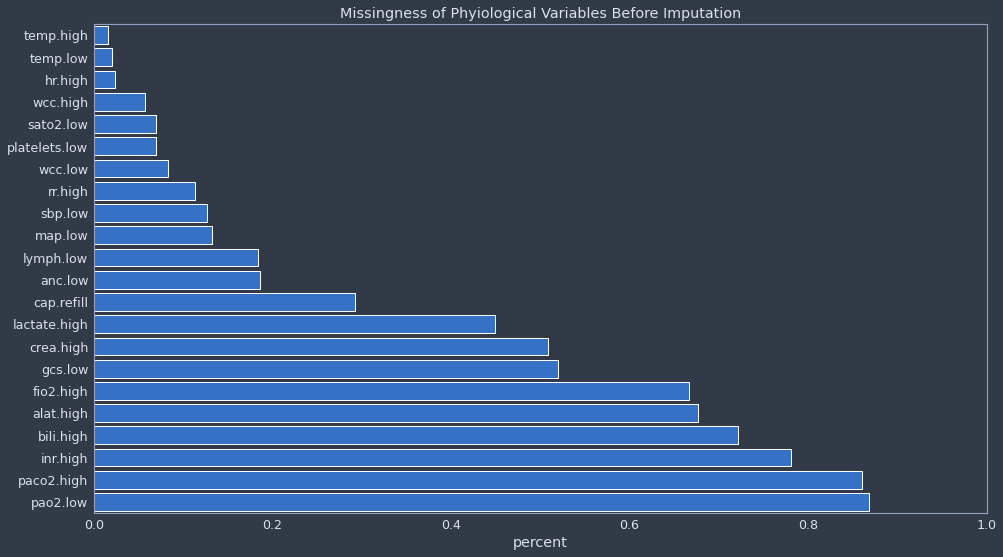

In [9]:
phymis_fg

##### Reference-Range Imputation

In [10]:
imp_df = sel_df.copy(deep=True)

# sex
M = imp_df.sex==1
F = imp_df.sex==0

# age ranges
DS_01   =  imp_df['age.at.bc']<=   1
DS_17   = (imp_df['age.at.bc'] >   1) & (imp_df['age.at.bc']<=   7)
DS_07   =  imp_df['age.at.bc']<=   7
DS_730  = (imp_df['age.at.bc'] >   7) & (imp_df['age.at.bc']<=  30)
MS_01   =  imp_df['age.at.bc']<=  30
MS_03   =  imp_df['age.at.bc']<=  91
MS_13   = (imp_df['age.at.bc'] >  30) & (imp_df['age.at.bc']<=  91)
MS_112  = (imp_df['age.at.bc'] >  30) & (imp_df['age.at.bc']<= 365)
MS_36   = (imp_df['age.at.bc'] >  91) & (imp_df['age.at.bc']<= 182)
MS_324  = (imp_df['age.at.bc'] >  91) & (imp_df['age.at.bc']<= 730)
MS_69   = (imp_df['age.at.bc'] > 182) & (imp_df['age.at.bc']<= 274)
MS_912  = (imp_df['age.at.bc'] > 274) & (imp_df['age.at.bc']<= 365)
MS_612  = (imp_df['age.at.bc'] > 182) & (imp_df['age.at.bc']<= 365)
MS_1218 = (imp_df['age.at.bc'] > 365) & (imp_df['age.at.bc']<= 547)
MS_1824 = (imp_df['age.at.bc'] > 547) & (imp_df['age.at.bc']<= 730)
YS_02   =  imp_df['age.at.bc']<= 730
YS_12   = (imp_df['age.at.bc'] > 365) & (imp_df['age.at.bc']<= 730)
YS_15   = (imp_df['age.at.bc'] > 365) & (imp_df['age.at.bc']<=1825)
YS_110  = (imp_df['age.at.bc'] > 365) & (imp_df['age.at.bc']<=3650)
YS_23   = (imp_df['age.at.bc'] > 730) & (imp_df['age.at.bc']<=1095)
YS_25   = (imp_df['age.at.bc'] > 730) & (imp_df['age.at.bc']<=1825)
YS_218  = (imp_df['age.at.bc'] > 730) & (imp_df['age.at.bc']<=6570)
YS_34   = (imp_df['age.at.bc'] >1095) & (imp_df['age.at.bc']<=1460)
YS_46   = (imp_df['age.at.bc'] >1460) & (imp_df['age.at.bc']<=2190)
YS_59   = (imp_df['age.at.bc'] >1825) & (imp_df['age.at.bc']<=3285)
YS_512  = (imp_df['age.at.bc'] >1825) & (imp_df['age.at.bc']<=4380)
YS_518  = (imp_df['age.at.bc'] >1825) & (imp_df['age.at.bc']<=6570)
YS_68   = (imp_df['age.at.bc'] >2190) & (imp_df['age.at.bc']<=2920)
YS_812  = (imp_df['age.at.bc'] >2920) & (imp_df['age.at.bc']<=4380)
YS_912  = (imp_df['age.at.bc'] >3285) & (imp_df['age.at.bc']<=4380)
YS_1018 = (imp_df['age.at.bc'] >3650) & (imp_df['age.at.bc']<=6570)
YS_1215 = (imp_df['age.at.bc'] >4380) & (imp_df['age.at.bc']<=5475)
YS_1216 = (imp_df['age.at.bc'] >4380) & (imp_df['age.at.bc']<=5840)
YS_1218 = (imp_df['age.at.bc'] >4380) & (imp_df['age.at.bc']<=6570)
YS_1518 = (imp_df['age.at.bc'] >5475) & (imp_df['age.at.bc']<=6570)
YS_1618 = (imp_df['age.at.bc'] >5840) & (imp_df['age.at.bc']<=6570)

imp_df.loc[M&MS_01,  'alat.high'] = imp_df.loc[M&MS_01,  'alat.high'].fillna(44.5)
imp_df.loc[M&MS_13,  'alat.high'] = imp_df.loc[M&MS_13,  'alat.high'].fillna(47.7)
imp_df.loc[M&MS_36,  'alat.high'] = imp_df.loc[M&MS_36,  'alat.high'].fillna(49.3)
imp_df.loc[M&MS_612, 'alat.high'] = imp_df.loc[M&MS_612, 'alat.high'].fillna(46.8)
imp_df.loc[M&MS_1218,'alat.high'] = imp_df.loc[M&MS_1218,'alat.high'].fillna(38.0)
imp_df.loc[M&MS_1824,'alat.high'] = imp_df.loc[M&MS_1824,'alat.high'].fillna(32.6)
imp_df.loc[M&YS_25,  'alat.high'] = imp_df.loc[M&YS_25,  'alat.high'].fillna(30.0)
imp_df.loc[M&YS_518, 'alat.high'] = imp_df.loc[M&YS_518, 'alat.high'].fillna(33.2)
imp_df.loc[F&MS_01,  'alat.high'] = imp_df.loc[F&MS_01,  'alat.high'].fillna(44.1)
imp_df.loc[F&MS_13,  'alat.high'] = imp_df.loc[F&MS_13,  'alat.high'].fillna(46.7)
imp_df.loc[F&MS_36,  'alat.high'] = imp_df.loc[F&MS_36,  'alat.high'].fillna(45.7)
imp_df.loc[F&MS_612, 'alat.high'] = imp_df.loc[F&MS_612, 'alat.high'].fillna(41.2)
imp_df.loc[F&MS_1218,'alat.high'] = imp_df.loc[F&MS_1218,'alat.high'].fillna(34.9)
imp_df.loc[F&MS_1824,'alat.high'] = imp_df.loc[F&MS_1824,'alat.high'].fillna(30.9)
imp_df.loc[F&YS_25,  'alat.high'] = imp_df.loc[F&YS_25,  'alat.high'].fillna(28.2)
imp_df.loc[F&YS_518, 'alat.high'] = imp_df.loc[F&YS_518, 'alat.high'].fillna(26.0)

imp_df.loc[MS_03,  'hr.high'] = imp_df.loc[MS_03,  'hr.high'].fillna(164)
imp_df.loc[MS_36,  'hr.high'] = imp_df.loc[MS_36,  'hr.high'].fillna(159)
imp_df.loc[MS_69,  'hr.high'] = imp_df.loc[MS_69,  'hr.high'].fillna(152)
imp_df.loc[MS_912, 'hr.high'] = imp_df.loc[MS_912, 'hr.high'].fillna(145)
imp_df.loc[MS_1218,'hr.high'] = imp_df.loc[MS_1218,'hr.high'].fillna(140)
imp_df.loc[MS_1824,'hr.high'] = imp_df.loc[MS_1824,'hr.high'].fillna(135)
imp_df.loc[YS_23,  'hr.high'] = imp_df.loc[YS_23,  'hr.high'].fillna(128)
imp_df.loc[YS_34,  'hr.high'] = imp_df.loc[YS_34,  'hr.high'].fillna(123)
imp_df.loc[YS_46,  'hr.high'] = imp_df.loc[YS_46,  'hr.high'].fillna(117)
imp_df.loc[YS_68,  'hr.high'] = imp_df.loc[YS_68,  'hr.high'].fillna(111)
imp_df.loc[YS_812, 'hr.high'] = imp_df.loc[YS_812, 'hr.high'].fillna(103)
imp_df.loc[YS_1215,'hr.high'] = imp_df.loc[YS_1215,'hr.high'].fillna( 96)
imp_df.loc[YS_1518,'hr.high'] = imp_df.loc[YS_1518,'hr.high'].fillna( 92)

imp_df['inr.high'] = imp_df['inr.high'].fillna(1.1)

imp_df['fio2.high'] = imp_df['fio2.high'].fillna(0.21)

imp_df.loc[MS_03, 'lactate.high'] = imp_df.loc[MS_03, 'lactate.high'].fillna(3.5)
imp_df.loc[MS_324,'lactate.high'] = imp_df.loc[MS_324,'lactate.high'].fillna(3.3)
imp_df.loc[YS_218,'lactate.high'] = imp_df.loc[YS_218,'lactate.high'].fillna(2.4)

imp_df['paco2.high'] = imp_df['paco2.high'].fillna(58.5)

imp_df.loc[MS_03,  'rr.high'] = imp_df.loc[MS_03,  'rr.high'].fillna(57)
imp_df.loc[MS_36,  'rr.high'] = imp_df.loc[MS_36,  'rr.high'].fillna(55)
imp_df.loc[MS_69,  'rr.high'] = imp_df.loc[MS_69,  'rr.high'].fillna(52)
imp_df.loc[MS_912, 'rr.high'] = imp_df.loc[MS_912, 'rr.high'].fillna(50)
imp_df.loc[MS_1218,'rr.high'] = imp_df.loc[MS_1218,'rr.high'].fillna(46)
imp_df.loc[MS_1824,'rr.high'] = imp_df.loc[MS_1824,'rr.high'].fillna(40)
imp_df.loc[YS_23,  'rr.high'] = imp_df.loc[YS_23,  'rr.high'].fillna(34)
imp_df.loc[YS_34,  'rr.high'] = imp_df.loc[YS_34,  'rr.high'].fillna(29)
imp_df.loc[YS_46,  'rr.high'] = imp_df.loc[YS_46,  'rr.high'].fillna(27)
imp_df.loc[YS_68,  'rr.high'] = imp_df.loc[YS_68,  'rr.high'].fillna(24)
imp_df.loc[YS_812, 'rr.high'] = imp_df.loc[YS_812, 'rr.high'].fillna(22)
imp_df.loc[YS_1215,'rr.high'] = imp_df.loc[YS_1215,'rr.high'].fillna(21)
imp_df.loc[YS_1518,'rr.high'] = imp_df.loc[YS_1518,'rr.high'].fillna(19)

imp_df.loc[MS_01,  'crea.high'] = imp_df.loc[MS_01,  'crea.high'].fillna(69)
imp_df.loc[MS_112, 'crea.high'] = imp_df.loc[MS_112, 'crea.high'].fillna(22)
imp_df.loc[YS_12,  'crea.high'] = imp_df.loc[YS_12,  'crea.high'].fillna(34)
imp_df.loc[YS_25,  'crea.high'] = imp_df.loc[YS_25,  'crea.high'].fillna(50)
imp_df.loc[YS_512, 'crea.high'] = imp_df.loc[YS_512, 'crea.high'].fillna(58)
imp_df.loc[YS_1218,'crea.high'] = imp_df.loc[YS_1218,'crea.high'].fillna(92)

imp_df['temp.high'] = imp_df['temp.high'].fillna(38.5)

imp_df.loc[M&YS_02,  'bili.high'] = imp_df.loc[M&YS_02,  'bili.high'].fillna(12)
imp_df.loc[M&YS_25,  'bili.high'] = imp_df.loc[M&YS_25,  'bili.high'].fillna(13)
imp_df.loc[M&YS_59,  'bili.high'] = imp_df.loc[M&YS_59,  'bili.high'].fillna(15)
imp_df.loc[M&YS_912, 'bili.high'] = imp_df.loc[M&YS_912, 'bili.high'].fillna(18)
imp_df.loc[M&YS_1216,'bili.high'] = imp_df.loc[M&YS_1216,'bili.high'].fillna(22)
imp_df.loc[M&YS_1618,'bili.high'] = imp_df.loc[M&YS_1618,'bili.high'].fillna(27)
imp_df.loc[F&YS_02,  'bili.high'] = imp_df.loc[F&YS_02,  'bili.high'].fillna(9)
imp_df.loc[F&YS_25,  'bili.high'] = imp_df.loc[F&YS_25,  'bili.high'].fillna(12)
imp_df.loc[F&YS_59,  'bili.high'] = imp_df.loc[F&YS_59,  'bili.high'].fillna(17)
imp_df.loc[F&YS_912, 'bili.high'] = imp_df.loc[F&YS_912, 'bili.high'].fillna(22)
imp_df.loc[F&YS_1216,'bili.high'] = imp_df.loc[F&YS_1216,'bili.high'].fillna(25)
imp_df.loc[F&YS_1618,'bili.high'] = imp_df.loc[F&YS_1618,'bili.high'].fillna(26)

imp_df.loc[DS_07,  'wcc.high'] = imp_df.loc[DS_07,  'wcc.high'].fillna(34.0)
imp_df.loc[DS_730, 'wcc.high'] = imp_df.loc[DS_730, 'wcc.high'].fillna(19.5)
imp_df.loc[MS_112, 'wcc.high'] = imp_df.loc[MS_112, 'wcc.high'].fillna(17.5)
imp_df.loc[YS_15,  'wcc.high'] = imp_df.loc[YS_15,  'wcc.high'].fillna(15.5)
imp_df.loc[YS_512, 'wcc.high'] = imp_df.loc[YS_512, 'wcc.high'].fillna(13.5)
imp_df.loc[YS_1218,'wcc.high'] = imp_df.loc[YS_1218,'wcc.high'].fillna(11.0)

imp_df['cap.refill'] = imp_df['cap.refill'].fillna(1)

imp_df.loc[DS_01,  'anc.low'] = imp_df.loc[DS_01,  'anc.low'].fillna(6.0)
imp_df.loc[DS_17,  'anc.low'] = imp_df.loc[DS_17,  'anc.low'].fillna(5.0)
imp_df.loc[DS_730, 'anc.low'] = imp_df.loc[DS_730, 'anc.low'].fillna(1.5)
imp_df.loc[MS_112, 'anc.low'] = imp_df.loc[MS_112, 'anc.low'].fillna(1.0)
imp_df.loc[YS_110, 'anc.low'] = imp_df.loc[YS_110, 'anc.low'].fillna(1.5)
imp_df.loc[YS_1018,'anc.low'] = imp_df.loc[YS_1018,'anc.low'].fillna(1.8)

imp_df['gcs.low'] = imp_df['gcs.low'].fillna(15)

imp_df['lymph.low'] = imp_df['lymph.low'].fillna(1)

imp_df.loc[MS_01,  'map.low'] = imp_df.loc[MS_01,  'map.low'].fillna(46)
imp_df.loc[MS_112, 'map.low'] = imp_df.loc[MS_112, 'map.low'].fillna(55)
imp_df.loc[YS_12,  'map.low'] = imp_df.loc[YS_12,  'map.low'].fillna(60)
imp_df.loc[YS_25,  'map.low'] = imp_df.loc[YS_25,  'map.low'].fillna(62)
imp_df.loc[YS_512, 'map.low'] = imp_df.loc[YS_512, 'map.low'].fillna(65)
imp_df.loc[YS_1218,'map.low'] = imp_df.loc[YS_1218,'map.low'].fillna(67)

imp_df['sato2.low'] = imp_df['sato2.low'].fillna(92)

imp_df['pao2.low'] = imp_df['pao2.low'].fillna(61)

imp_df['platelets.low'] = imp_df['platelets.low'].fillna(76.5)

imp_df.loc[DS_07,  'sbp.low'] = imp_df.loc[DS_07,  'sbp.low'].fillna(65)
imp_df.loc[DS_730, 'sbp.low'] = imp_df.loc[DS_730, 'sbp.low'].fillna(75)
imp_df.loc[MS_112, 'sbp.low'] = imp_df.loc[MS_112, 'sbp.low'].fillna(100)
imp_df.loc[YS_15,  'sbp.low'] = imp_df.loc[YS_15,  'sbp.low'].fillna(102)
imp_df.loc[YS_512, 'sbp.low'] = imp_df.loc[YS_512, 'sbp.low'].fillna(105)
imp_df.loc[YS_1218,'sbp.low'] = imp_df.loc[YS_1218,'sbp.low'].fillna(117)

imp_df['temp.low'] = imp_df['temp.low'].fillna(36.0)

imp_df.loc[MS_01,  'wcc.low'] = imp_df.loc[MS_01,  'wcc.low'].fillna(5.0)
imp_df.loc[MS_112, 'wcc.low'] = imp_df.loc[MS_112, 'wcc.low'].fillna(5.0)
imp_df.loc[YS_15,  'wcc.low'] = imp_df.loc[YS_15,  'wcc.low'].fillna(6.0)
imp_df.loc[YS_512, 'wcc.low'] = imp_df.loc[YS_512, 'wcc.low'].fillna(4.5)
imp_df.loc[YS_1218,'wcc.low'] = imp_df.loc[YS_1218,'wcc.low'].fillna(4.5)

#### Proteome

##### Missingness

###### Compute

In [11]:
promis_df = sel_df[sel_dc['proteome']].isnull().sum()\
                                      .sort_values(ascending=False)
promis_df = promis_df/sel_df.shape[0]
promis_df = promis_df[promis_df!=0]

promis_fg = plt.figure(figsize=(16,9))
ax1       = promis_fg.add_subplot(111)
ax1.barh(y=range(promis_df.shape[0]),\
         width=promis_df.values,\
         ec='white',\
         linewidth=1,\
         tick_label=promis_df.index.tolist())
ax1.set_xlim([0,1])
ax1.set_ylim([-.5,promis_df.shape[0]-.5])
ax1.set_title('Missingness of Proteins Before Imputation')
ax1.set_xlabel('percent')
ax1.grid(False)
plt.close()

###### Figure

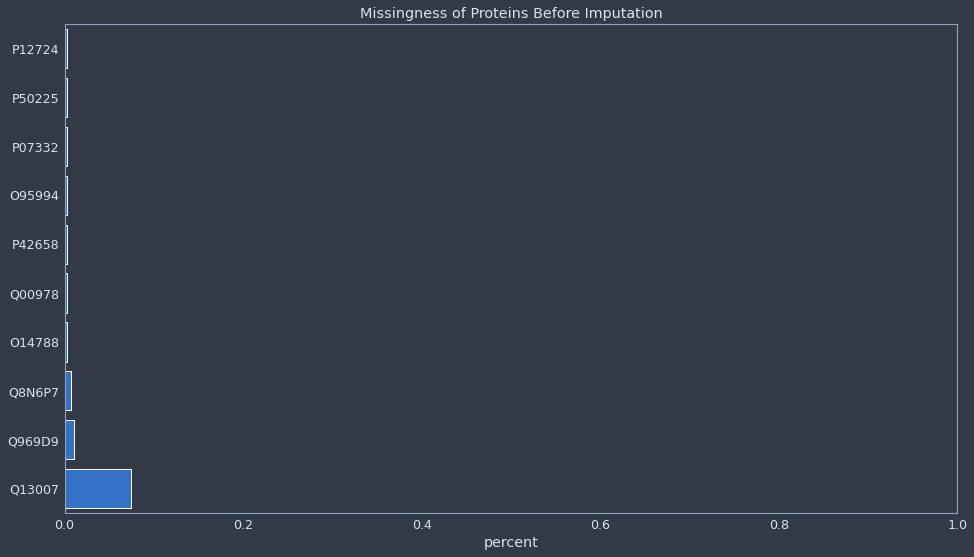

In [12]:
promis_fg

#####  Multiple Imputation by Chained Equations (MICE)

In [13]:
mice = ski.IterativeImputer(max_iter=100,\
                            initial_strategy='median',\
                            skip_complete=True,\
                            min_value=0,\
                            max_value=imp_df[sel_dc['proteome']].max().max())

imp_df[sel_dc['proteome']] =  mice.fit_transform(imp_df[sel_dc['proteome']])
imp_df[sel_dc['proteome']]

,Q96SB3,P16278,O75475,Q05516,Q9NWZ3,Q15661,P14317,Q9UHC6,Q6UXB4,Q00978,...,Q12913,Q7LG56,Q13308,P20472,Q9UHF1,Q0Z7S8,P98073,P01229,P53539,P27797
BE-001,2.189480,2.591750,4.848860,1.737870,1.645060,5.323420,4.700430,2.398600,4.477340,2.565510,...,1.70159,3.48718,2.05995,3.76090,6.96531,4.18190,0.22963,2.45691,0.87458,1.74746
BE-003,4.374040,2.980250,5.676970,4.644750,5.197660,4.755190,6.598710,2.275020,4.211850,4.689300,...,3.59710,3.06095,2.04341,6.06249,6.69491,2.23101,1.37726,2.01789,1.63672,2.00566
BE-004,3.064210,1.851580,2.073060,2.873600,1.803510,6.737260,4.180860,1.999300,2.599490,2.100520,...,1.73363,1.68708,2.19836,6.25993,5.32153,1.12803,1.08999,0.87993,0.04963,1.42964
BE-005,6.908315,0.920112,6.015381,4.953772,7.222683,6.940401,10.382117,4.347090,5.872441,4.092666,...,4.37900,3.18976,3.96052,7.78852,6.43559,2.50802,1.03539,0.41681,1.60899,2.15542
BE-007,3.088700,4.241990,4.357900,2.859930,2.193450,6.208380,5.462200,4.286340,4.010610,2.461800,...,3.08916,1.98271,4.14826,7.28065,7.33051,2.05212,1.72586,1.42252,0.78154,1.53606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZH-254,4.805850,5.013930,6.319910,5.300950,4.610000,6.068970,6.847390,3.783100,3.760460,5.079230,...,5.06552,2.87701,3.85969,10.63042,7.58074,1.53331,1.24035,1.68320,4.14710,2.54191
ZH-255,5.385860,4.295540,6.509910,5.139260,4.801040,6.559500,7.278640,5.505870,4.491950,5.028190,...,6.42122,2.89101,5.20275,10.70967,6.99078,3.31375,0.66809,1.16686,3.34361,3.40926
ZH-257,5.002694,2.358387,6.289317,6.673875,3.401441,7.141498,7.858672,7.740111,5.498104,5.801897,...,3.72867,2.44134,3.89944,9.87816,6.65984,2.61212,3.34854,0.92167,2.80111,1.77911
ZH-258,3.841330,3.329035,4.487176,1.960050,2.027405,7.127125,7.896770,8.531797,5.550231,2.815816,...,2.96162,2.31719,6.42890,6.05447,7.64716,1.46705,3.20317,1.93248,1.74769,1.80203


##### Binary Variables

In [14]:
imp_df.columns[imp_df.isna().any()]

Index(['ccc.neuro', 'ccc.cardio', 'ccc.pulmo', 'ccc.uro', 'ccc.gastro',
       'ccc.haemimmuno', 'ccc.metabol', 'ccc.malform', 'ccc.onco', 'ccc.neo',
       'ccc.surg', 'ccc.techdep', 'ccc.transplant', 'abx.change.pen',
       'abx.change.oxa', 'abx.change.pip', 'abx.change.cla', 'abx.change.cxm',
       'abx.change.cro', 'abx.change.fep', 'abx.change.mem', 'abx.change.amk',
       'abx.change.van', 'abx.change.cip', 'abx.change.lzd', 'abx.change.cli',
       'abx.change.mtz', 'abx.change.sxt', 'niv', 'iv', 'hfnc', 'ecls',
       'inotrope', 'crrt'],
      dtype='object')

In [15]:
imp_df = imp_df.fillna(0)

### PCA of Binary Variables

#### Confounders

In [16]:
pca0_cs = sel_dc['demographics']
pca0_cs = [c for c in pca0_cs if 'age' not in c]
pca0_df = pca_var(imp_df[pca0_cs],.95,'dem')
pca_df  = pd.concat([imp_df,pca0_df],join='inner',axis=1)

#### Contextual Variables

In [17]:
pca1_cs = sel_dc['chronic_conditions']+\
          ['niv','iv','hfnc','ecls','inotrope','crrt']
          #[c for c in sel_dc['organs'] if (('cons' in c) and ('score' not in c))]
pca1_df = pca_var(imp_df[pca1_cs],.95,'con')
pca_df  = pd.concat([imp_df,pca0_df,pca1_df],join='inner',axis=1)

#### Infection Variables

In [18]:
pca2_cs = sel_dc['infections']+sel_dc['pathogen']+sel_dc['treatment']
nos     = ['niv','iv','hfnc','ecls','inotrope','crrt']
pca2_cs = [c for c in pca2_cs if not any([n in c for n in nos])]
pca2_df = pca_var(imp_df[pca2_cs],.95,'inf')
pca_df  = pd.concat([imp_df,pca0_df,pca1_df,pca2_df],join='inner',axis=1)
pca_df

,temp.high,temp.low,rr.high,sato2.low,hr.high,cap.refill,sbp.low,map.low,gcs.low,fio2.high,...,infpc_22,infpc_23,infpc_24,infpc_25,infpc_26,infpc_27,infpc_28,infpc_29,infpc_30,infpc_31
BE-001,38.4,36.5,45.0,97.0,140.0,3.0,71.0,45.0,13.0,0.21,...,0.473268,-0.088749,0.048121,-0.118653,-0.217180,0.551535,0.380187,-0.120814,-0.097800,0.459311
BE-003,39.0,37.0,36.0,95.0,120.0,1.0,88.0,76.0,13.0,0.21,...,0.090804,0.072890,-0.175125,-0.151438,-0.097932,0.065396,-0.100803,-0.016855,-0.071142,-0.059128
BE-004,39.8,39.8,40.0,94.0,156.0,1.0,93.0,93.0,15.0,0.21,...,-0.214838,0.042017,-0.142699,-0.070053,-0.351335,0.229853,0.078046,0.246735,-0.236640,-0.134677
BE-005,40.2,37.4,40.0,97.0,130.0,1.0,113.0,67.0,15.0,0.21,...,0.165080,0.077960,0.115634,-0.040376,-0.062915,-0.254271,-0.081372,-0.066870,-0.210163,0.306584
BE-007,38.5,38.0,59.0,97.0,156.0,1.0,100.0,55.0,15.0,0.21,...,-0.158000,0.085244,-0.113380,-0.306229,-0.056817,0.145506,-0.126946,0.029240,0.084384,0.163887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZH-254,38.6,37.9,80.0,76.0,190.0,4.0,59.0,42.0,15.0,0.21,...,-0.014120,0.365675,0.036399,-0.292167,-0.055722,-0.294444,-0.411319,-0.143436,0.411485,0.006276
ZH-255,37.6,37.0,90.0,82.0,168.0,3.0,47.0,38.0,10.0,1.00,...,-0.067183,-0.010386,-0.018100,-0.005487,-0.008917,-0.031426,0.099409,-0.027725,0.038099,-0.022106
ZH-257,39.0,37.9,48.0,96.0,192.0,3.0,136.0,87.0,15.0,0.21,...,-0.223035,0.060825,-0.139964,0.690931,-0.485987,0.269812,-0.249111,-0.175648,0.201562,0.132961
ZH-258,38.4,36.7,49.0,98.0,152.0,1.0,77.0,50.0,15.0,0.21,...,-0.043187,-0.169295,-0.170401,-0.267444,-0.117871,0.104722,0.103962,0.078581,0.120574,0.013417


### Standardization

#### Original Distributions

##### Physiology

###### Compute

In [19]:
physio_cs  = [c for c in sel_dc['physio'] if 'fio2.high' not in c]+\
             [c for c in sel_dc['organs'] if 'cons' not in c]
physio_cs  = [c for c in physio_cs if c not in pca1_cs]

physdist_fg = plt.figure(figsize=(35,50))

for i,c in enumerate(physio_cs):

    ax = physdist_fg.add_subplot(10,4,i+1)
    ax.hist(sel_df[c],color='w',density=True,label='original',bins=15)
    ax.hist(pca_df[c],alpha=.75,density=True,label='imputed',bins=15)
    ax.set_title(c)
    ax.set_yticks([])
    ax.grid(False)
    plt.legend()

plt.close()

###### Figure

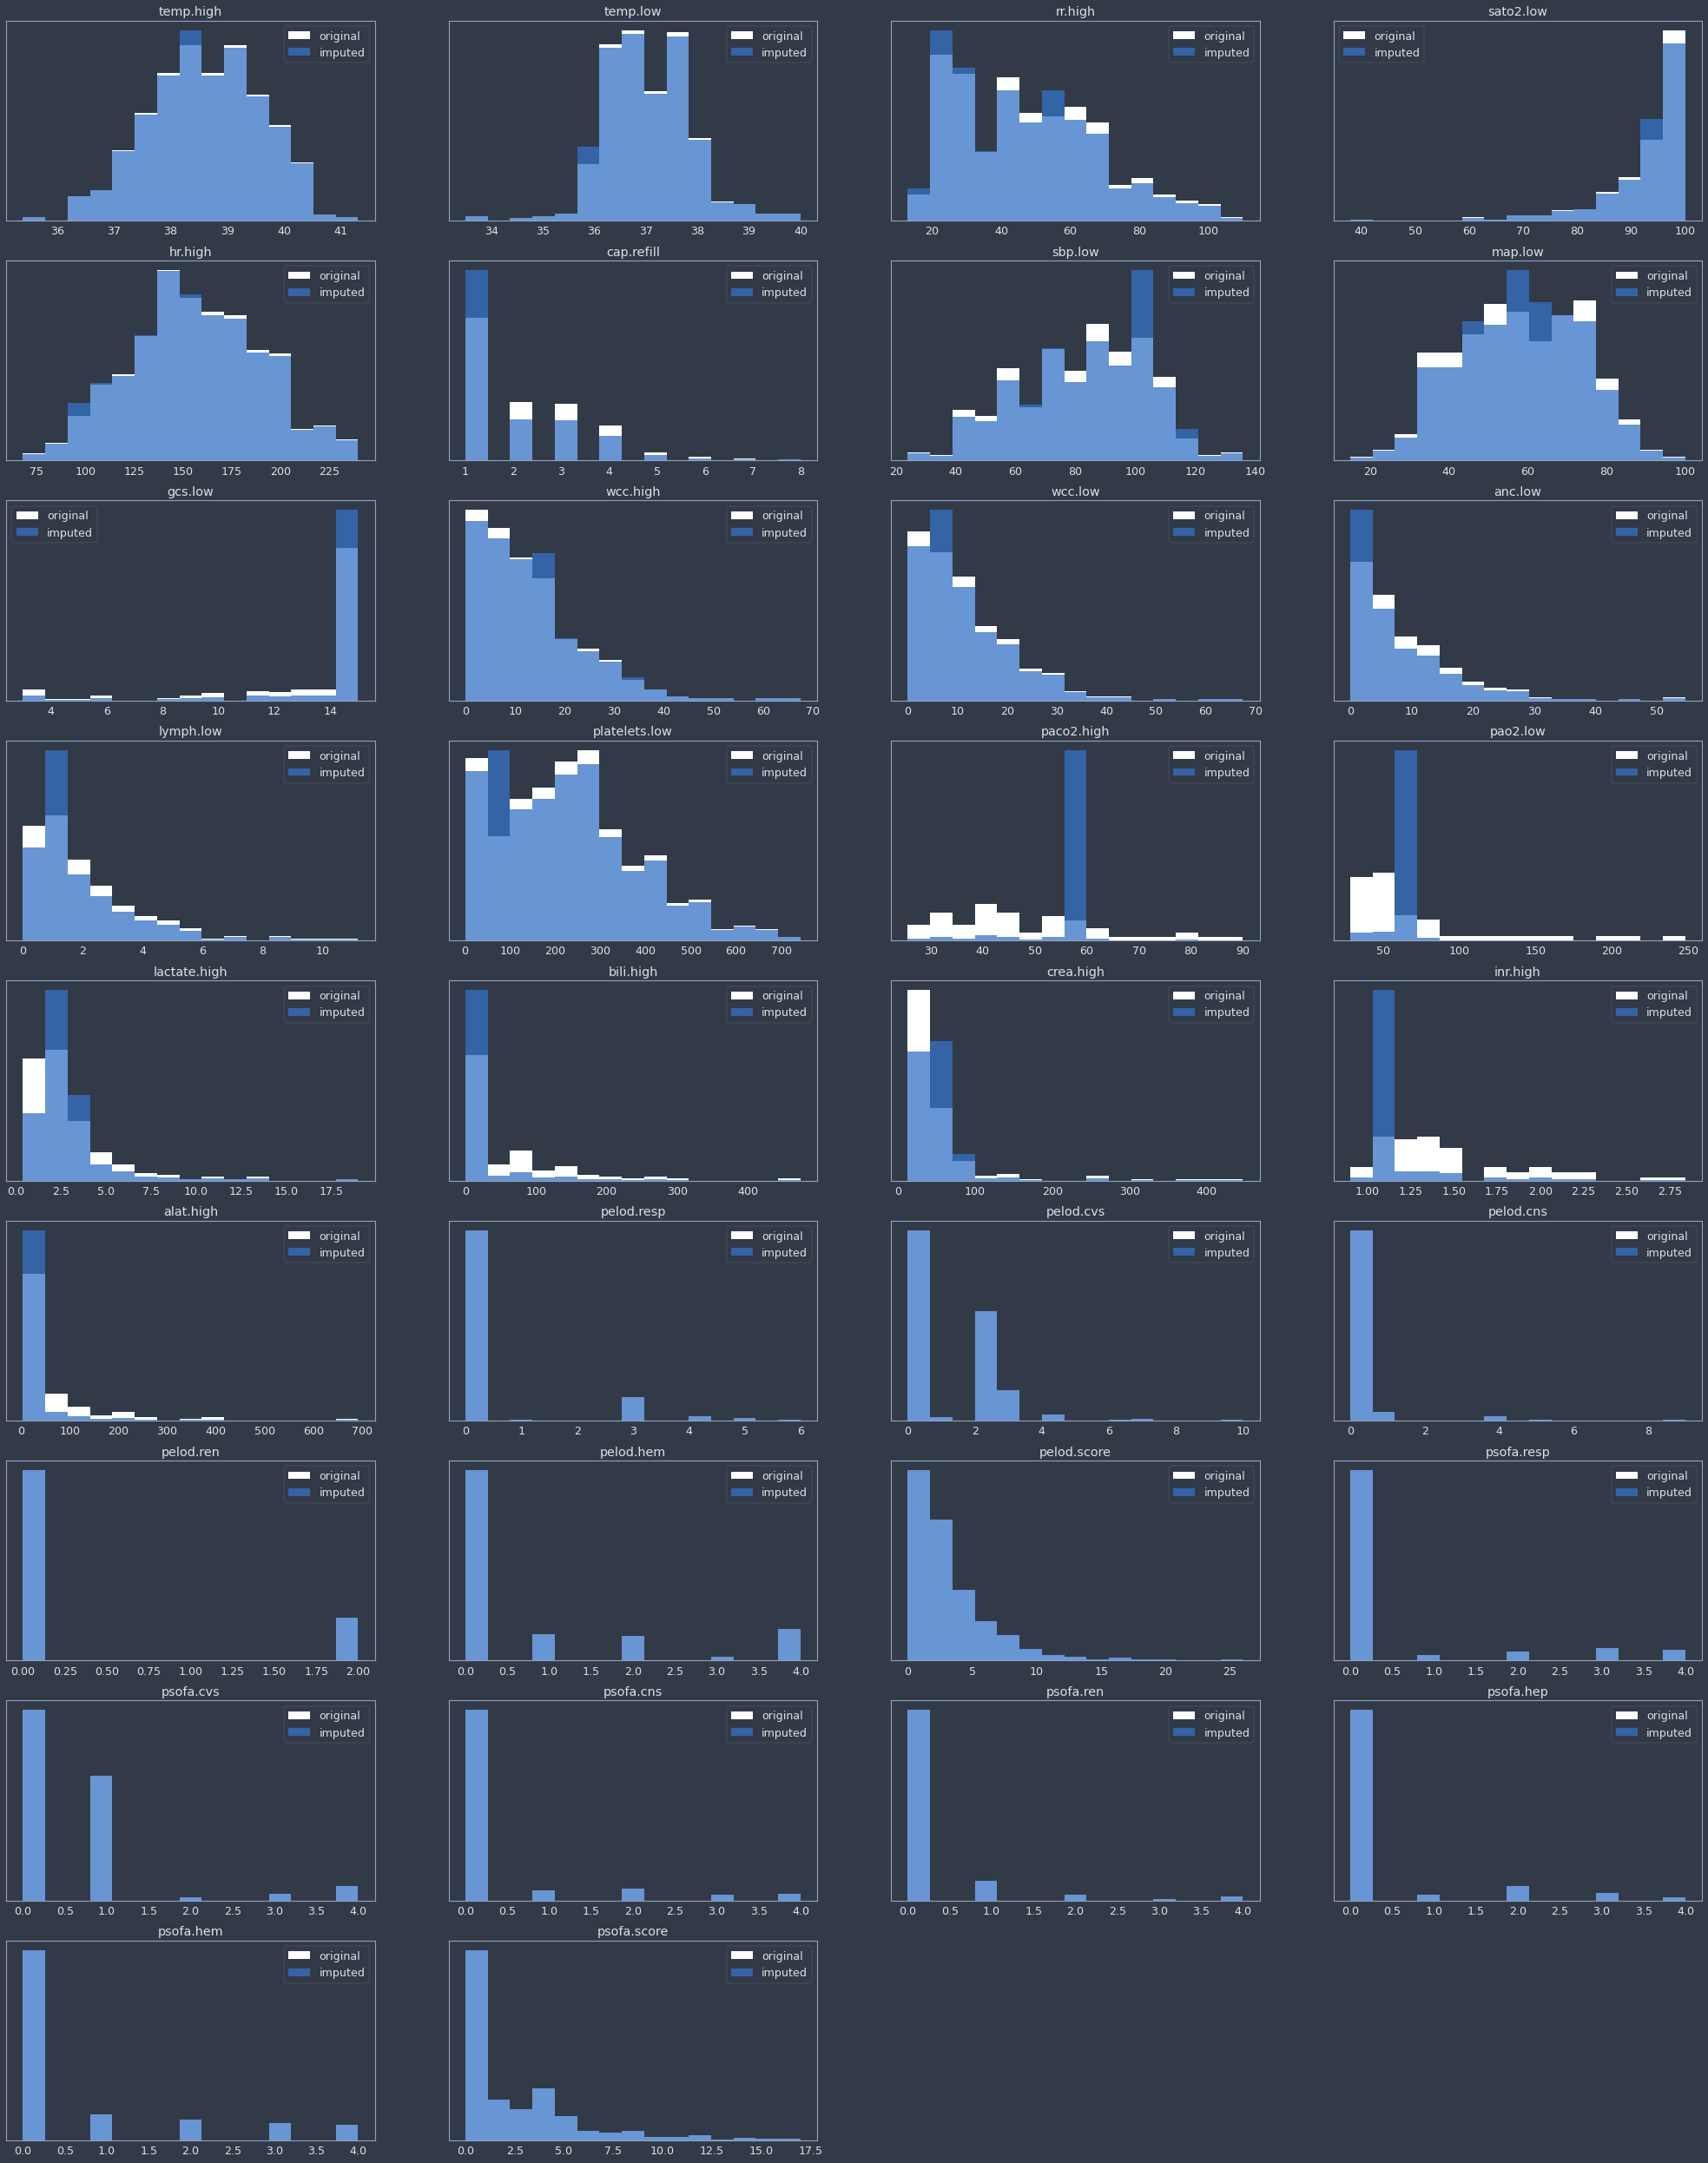

In [20]:
physdist_fg

##### Confounder PCs

###### Compute

In [21]:
dempc_cs = [c for c in pca_df.columns if 'dempc' in c]
dempc_fg = plt.figure(figsize=(35,25))

for i,c in enumerate(dempc_cs):

    ax = dempc_fg.add_subplot(5,4,i+1)
    ax.hist(pca_df[c],density=True,bins=15)
    ax.set_title(c)
    ax.set_yticks([])
    ax.grid(False)

plt.close()

###### Figure

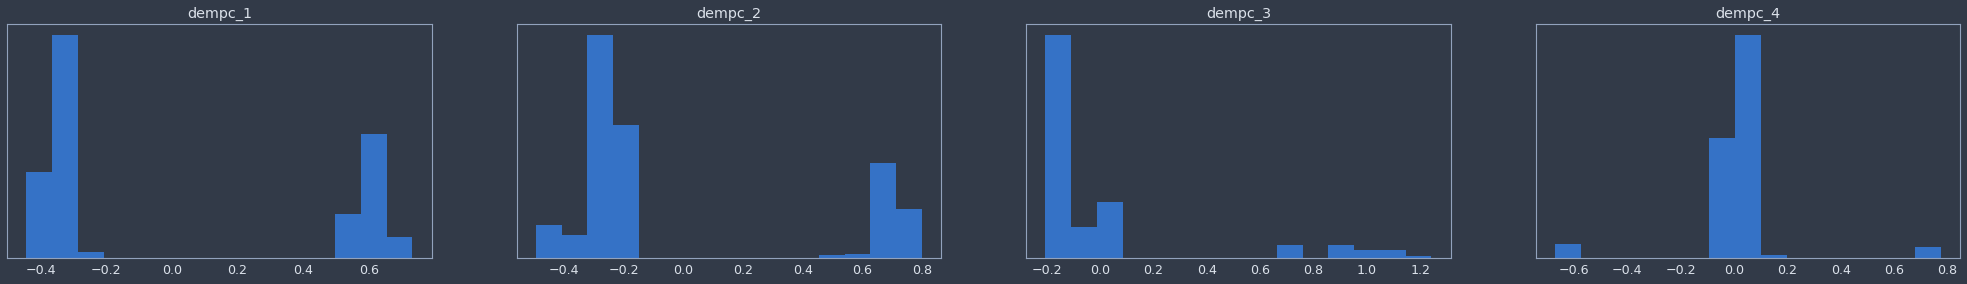

In [22]:
dempc_fg

##### Contextual PCs

###### Compute

In [23]:
conpc_cs = [c for c in pca_df.columns if 'conpc' in c] + ['fio2.high']
conpc_fg = plt.figure(figsize=(35,25))

for i,c in enumerate(conpc_cs):

    ax = conpc_fg.add_subplot(5,4,i+1)
    ax.hist(pca_df[c],density=True,bins=15)
    ax.set_title(c)
    ax.set_yticks([])
    ax.grid(False)

plt.close()

###### Figure

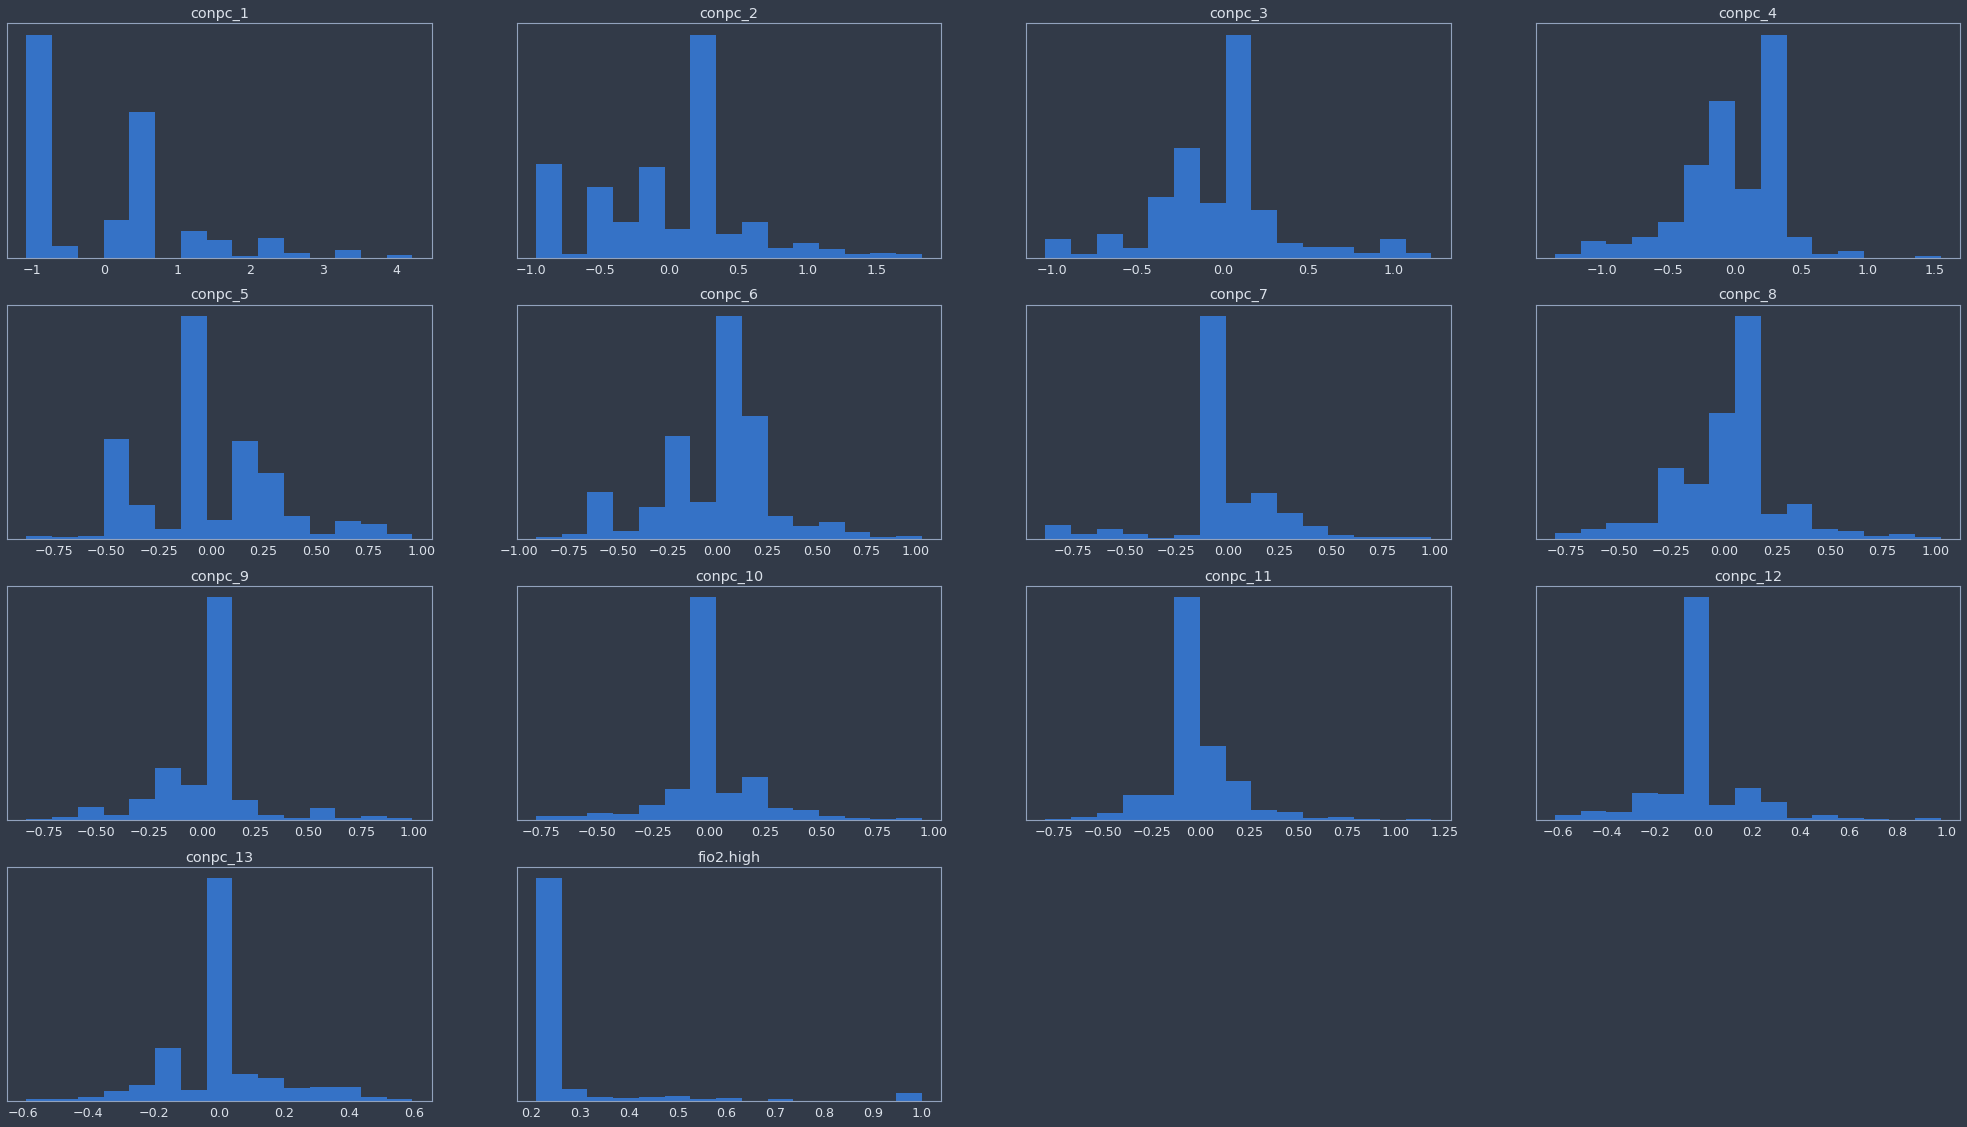

In [24]:
conpc_fg

##### Infection PCs

###### Compute

In [25]:
infpc_cs = [c for c in pca_df.columns if 'infpc' in c]
infpc_fg = plt.figure(figsize=(35,40))

for i,c in enumerate(infpc_cs):

    ax = infpc_fg.add_subplot(8,4,i+1)
    ax.hist(pca_df[c],density=True,bins=15)
    ax.set_title(c)
    ax.set_yticks([])
    ax.grid(False)

plt.close()

###### Figure

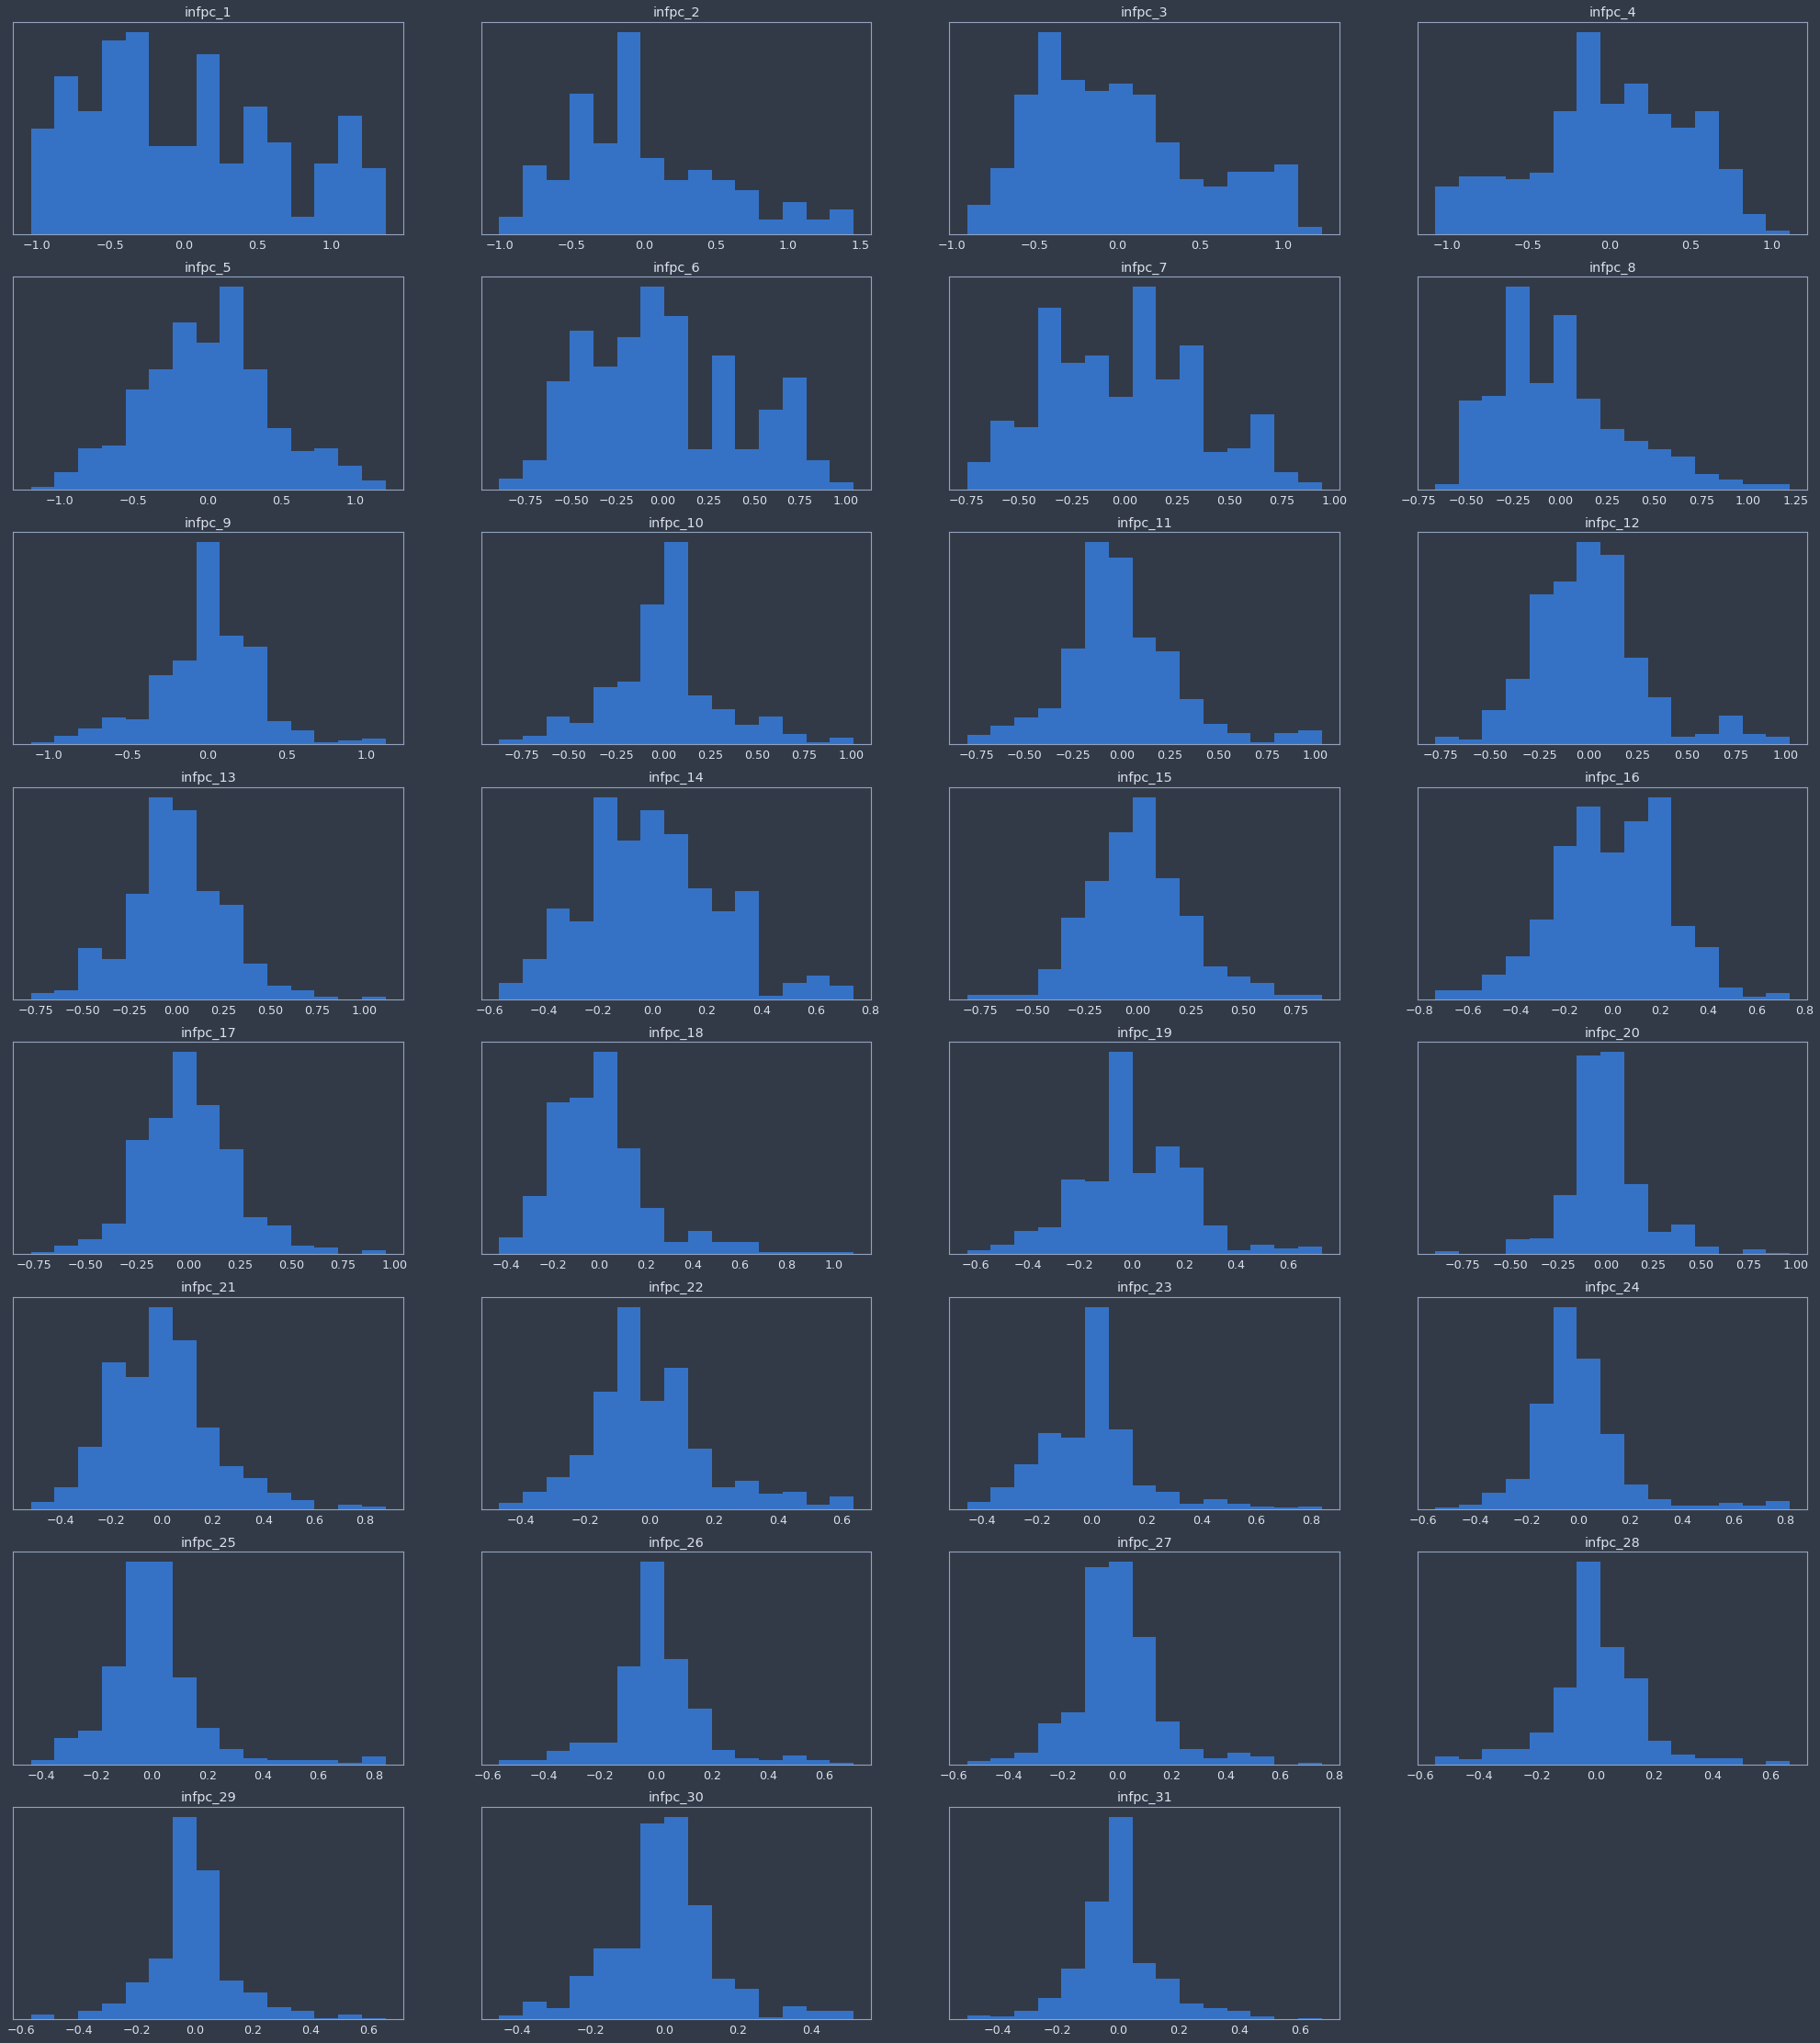

In [26]:
infpc_fg

##### Proteome

###### Compute

In [27]:
protein_cs = cp.deepcopy(sel_dc['proteome'])
protein_fg = plt.figure(figsize=(35,35))

for i,c in enumerate(protein_cs):

    ax = protein_fg.add_subplot(20,18,i+1)
    ax.hist(sel_df[c],color='w',density=True,label='original',bins=15)
    ax.hist(pca_df[c],alpha=.75,density=True,label='imputed',bins=15)
    ax.set_title(c,fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)

plt.close()

###### Figure

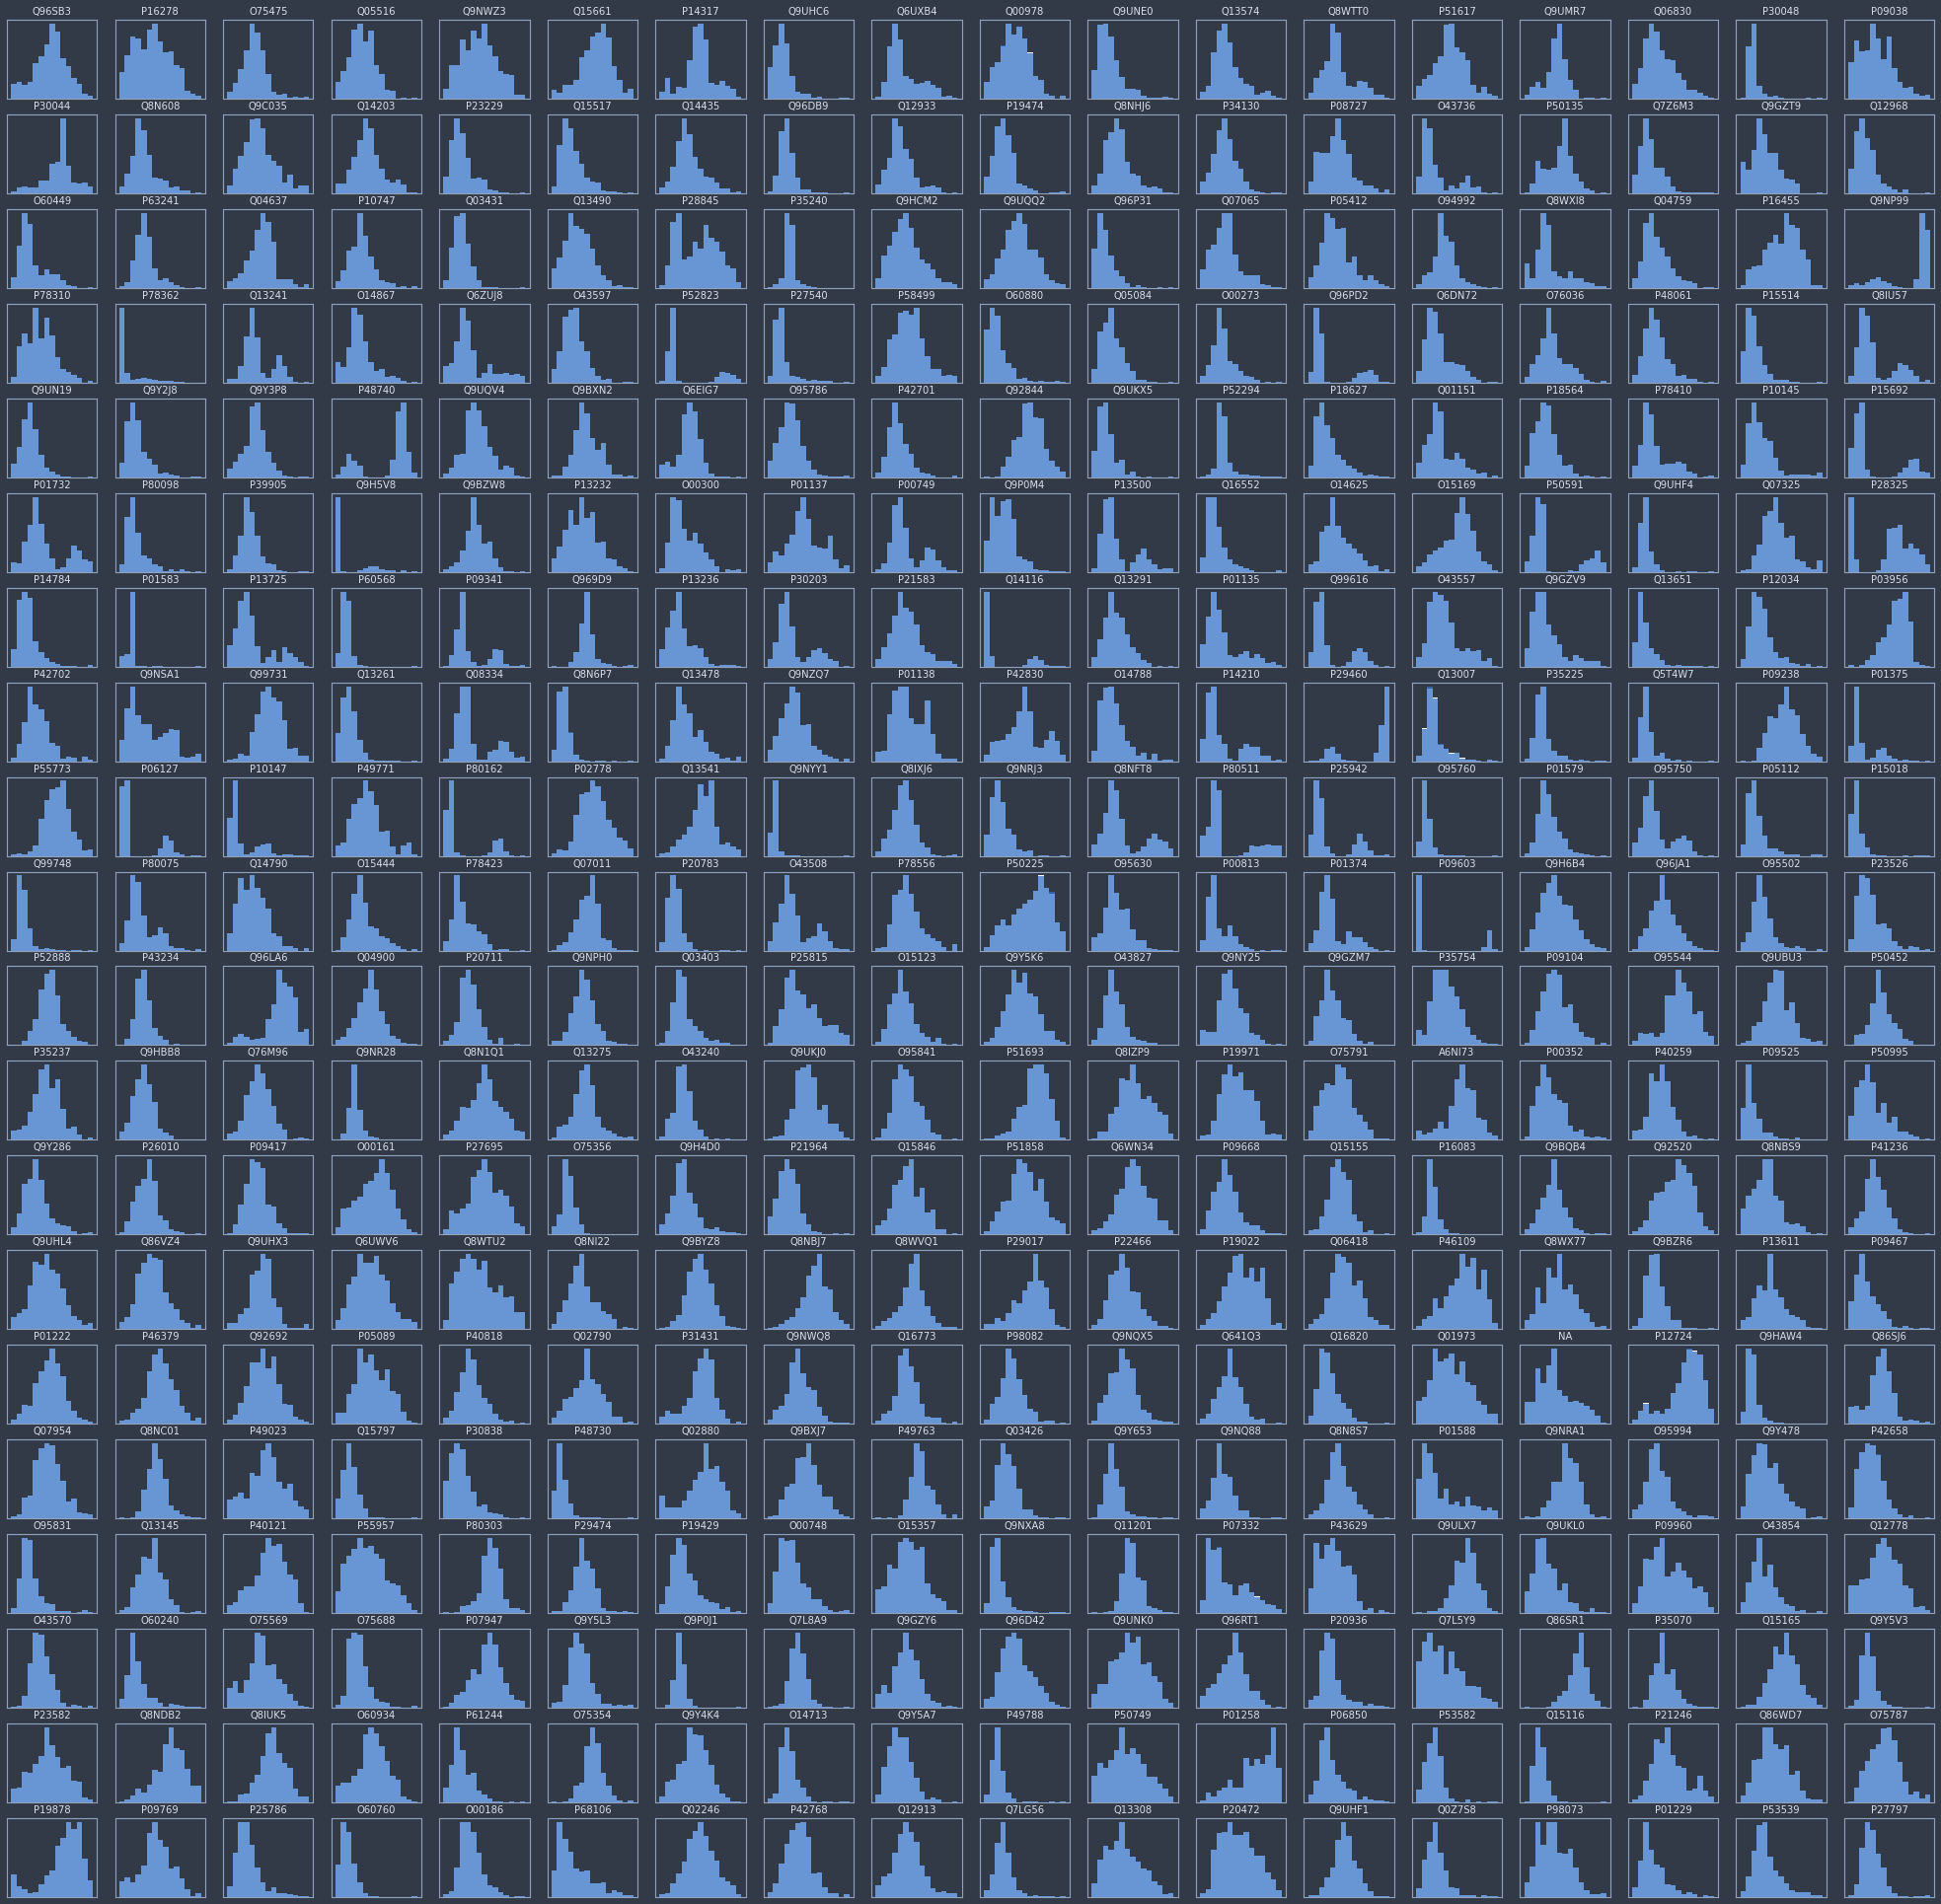

In [28]:
protein_fg

#### Log Scaling

In [29]:
log_df = pca_df.copy(deep=True)

inv_cs = ['sato2.low','gcs.low']

for c in inv_cs:
    log_df[c] = log_df[c].max()-log_df[c]

log_cs = ['conpc_1','sato2.low','cap.refill','gcs.low','fio2.high',\
          'wcc.high','wcc.low','anc.low','lymph.low','lactate.high',\
          'bili.high','crea.high','inr.high','alat.high','age.at.bc']\
         +[c for c in sel_dc['organs'] if 'cons' not in c]

for c in log_cs:
    log_df[c] = np.log(log_df[c]-log_df[c].min()+1)

#### Standard Scaling

In [30]:
sc = skp.StandardScaler()
std_df = pd.DataFrame(sc.fit_transform(log_df),\
                      columns=log_df.columns,\
                      index=log_df.index)
std_df

,temp.high,temp.low,rr.high,sato2.low,hr.high,cap.refill,sbp.low,map.low,gcs.low,fio2.high,...,infpc_22,infpc_23,infpc_24,infpc_25,infpc_26,infpc_27,infpc_28,infpc_29,infpc_30,infpc_31
BE-001,-0.208272,-0.625951,-0.076666,-0.516882,-0.476256,1.233399,-0.600364,-0.869426,1.313880,-0.370053,...,2.538929,-0.479085,0.268194,-0.698783,-1.325687,3.514697,2.461659,-0.817194,-0.667286,3.255489
BE-003,0.400806,-0.022456,-0.514414,-0.015399,-1.067187,-0.726941,0.191495,1.202997,1.313880,-0.370053,...,0.487132,0.393474,-0.976038,-0.891861,-0.597787,0.416739,-0.652689,-0.114008,-0.485400,-0.419083
BE-004,1.212910,3.357117,-0.319859,0.175256,-0.003512,-0.726941,0.424395,2.339486,-0.396578,-0.370053,...,-1.152535,0.226817,-0.795318,-0.412566,-2.144586,1.464756,0.505338,1.668932,-1.614586,-0.954558
BE-005,1.618962,0.460341,-0.319859,-0.516882,-0.771722,-0.726941,1.355995,0.601326,-0.396578,-0.370053,...,0.885604,0.420843,0.644473,-0.237786,-0.384043,-1.620362,-0.526873,-0.452314,-1.433934,2.172998
BE-007,-0.106759,1.184535,0.604276,-0.516882,-0.003512,-0.726941,0.750455,-0.200903,-0.396578,-0.370053,...,-0.847620,0.460159,-0.631912,-1.803472,-0.346816,0.927245,-0.821956,0.197784,0.575750,1.161590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZH-254,-0.005246,1.063836,1.625688,1.749673,1.001070,1.746733,-1.159324,-1.069983,-0.396578,-0.370053,...,-0.075750,1.973975,0.202867,-1.720660,-0.340133,-1.876365,-2.663232,-0.970209,2.807546,0.044481
ZH-255,-1.020376,-0.022456,2.112075,1.410247,0.351046,1.233399,-1.718283,-1.337392,2.393059,4.239482,...,-0.360413,-0.056066,-0.100879,-0.032314,-0.054427,-0.200263,0.643657,-0.187532,0.259947,-0.156681
ZH-257,0.400806,1.063836,0.069250,-0.240896,1.060163,1.233399,2.427334,1.938372,-0.396578,-0.370053,...,-1.196513,0.328345,-0.780075,4.069093,-2.966518,1.719395,-1.612959,-1.188093,1.375248,0.942394
ZH-258,-0.208272,-0.384553,0.117889,-0.872690,-0.121698,-0.726941,-0.320884,-0.535164,-0.396578,-0.370053,...,-0.231685,-0.913883,-0.949714,-1.575055,-0.719495,0.667349,0.673137,0.531526,0.822674,0.095094


#### Standardized Distributions

##### Physiology

###### Compute

In [31]:
physdist_fg2 = plt.figure(figsize=(35,50))

for i,c in enumerate(physio_cs):

    ax = physdist_fg2.add_subplot(10,4,i+1)
    ax.hist(std_df[c],density=True,bins=15)
    ax.set_title(c)
    ax.set_yticks([])
    ax.grid(False)

plt.close()

###### Figure

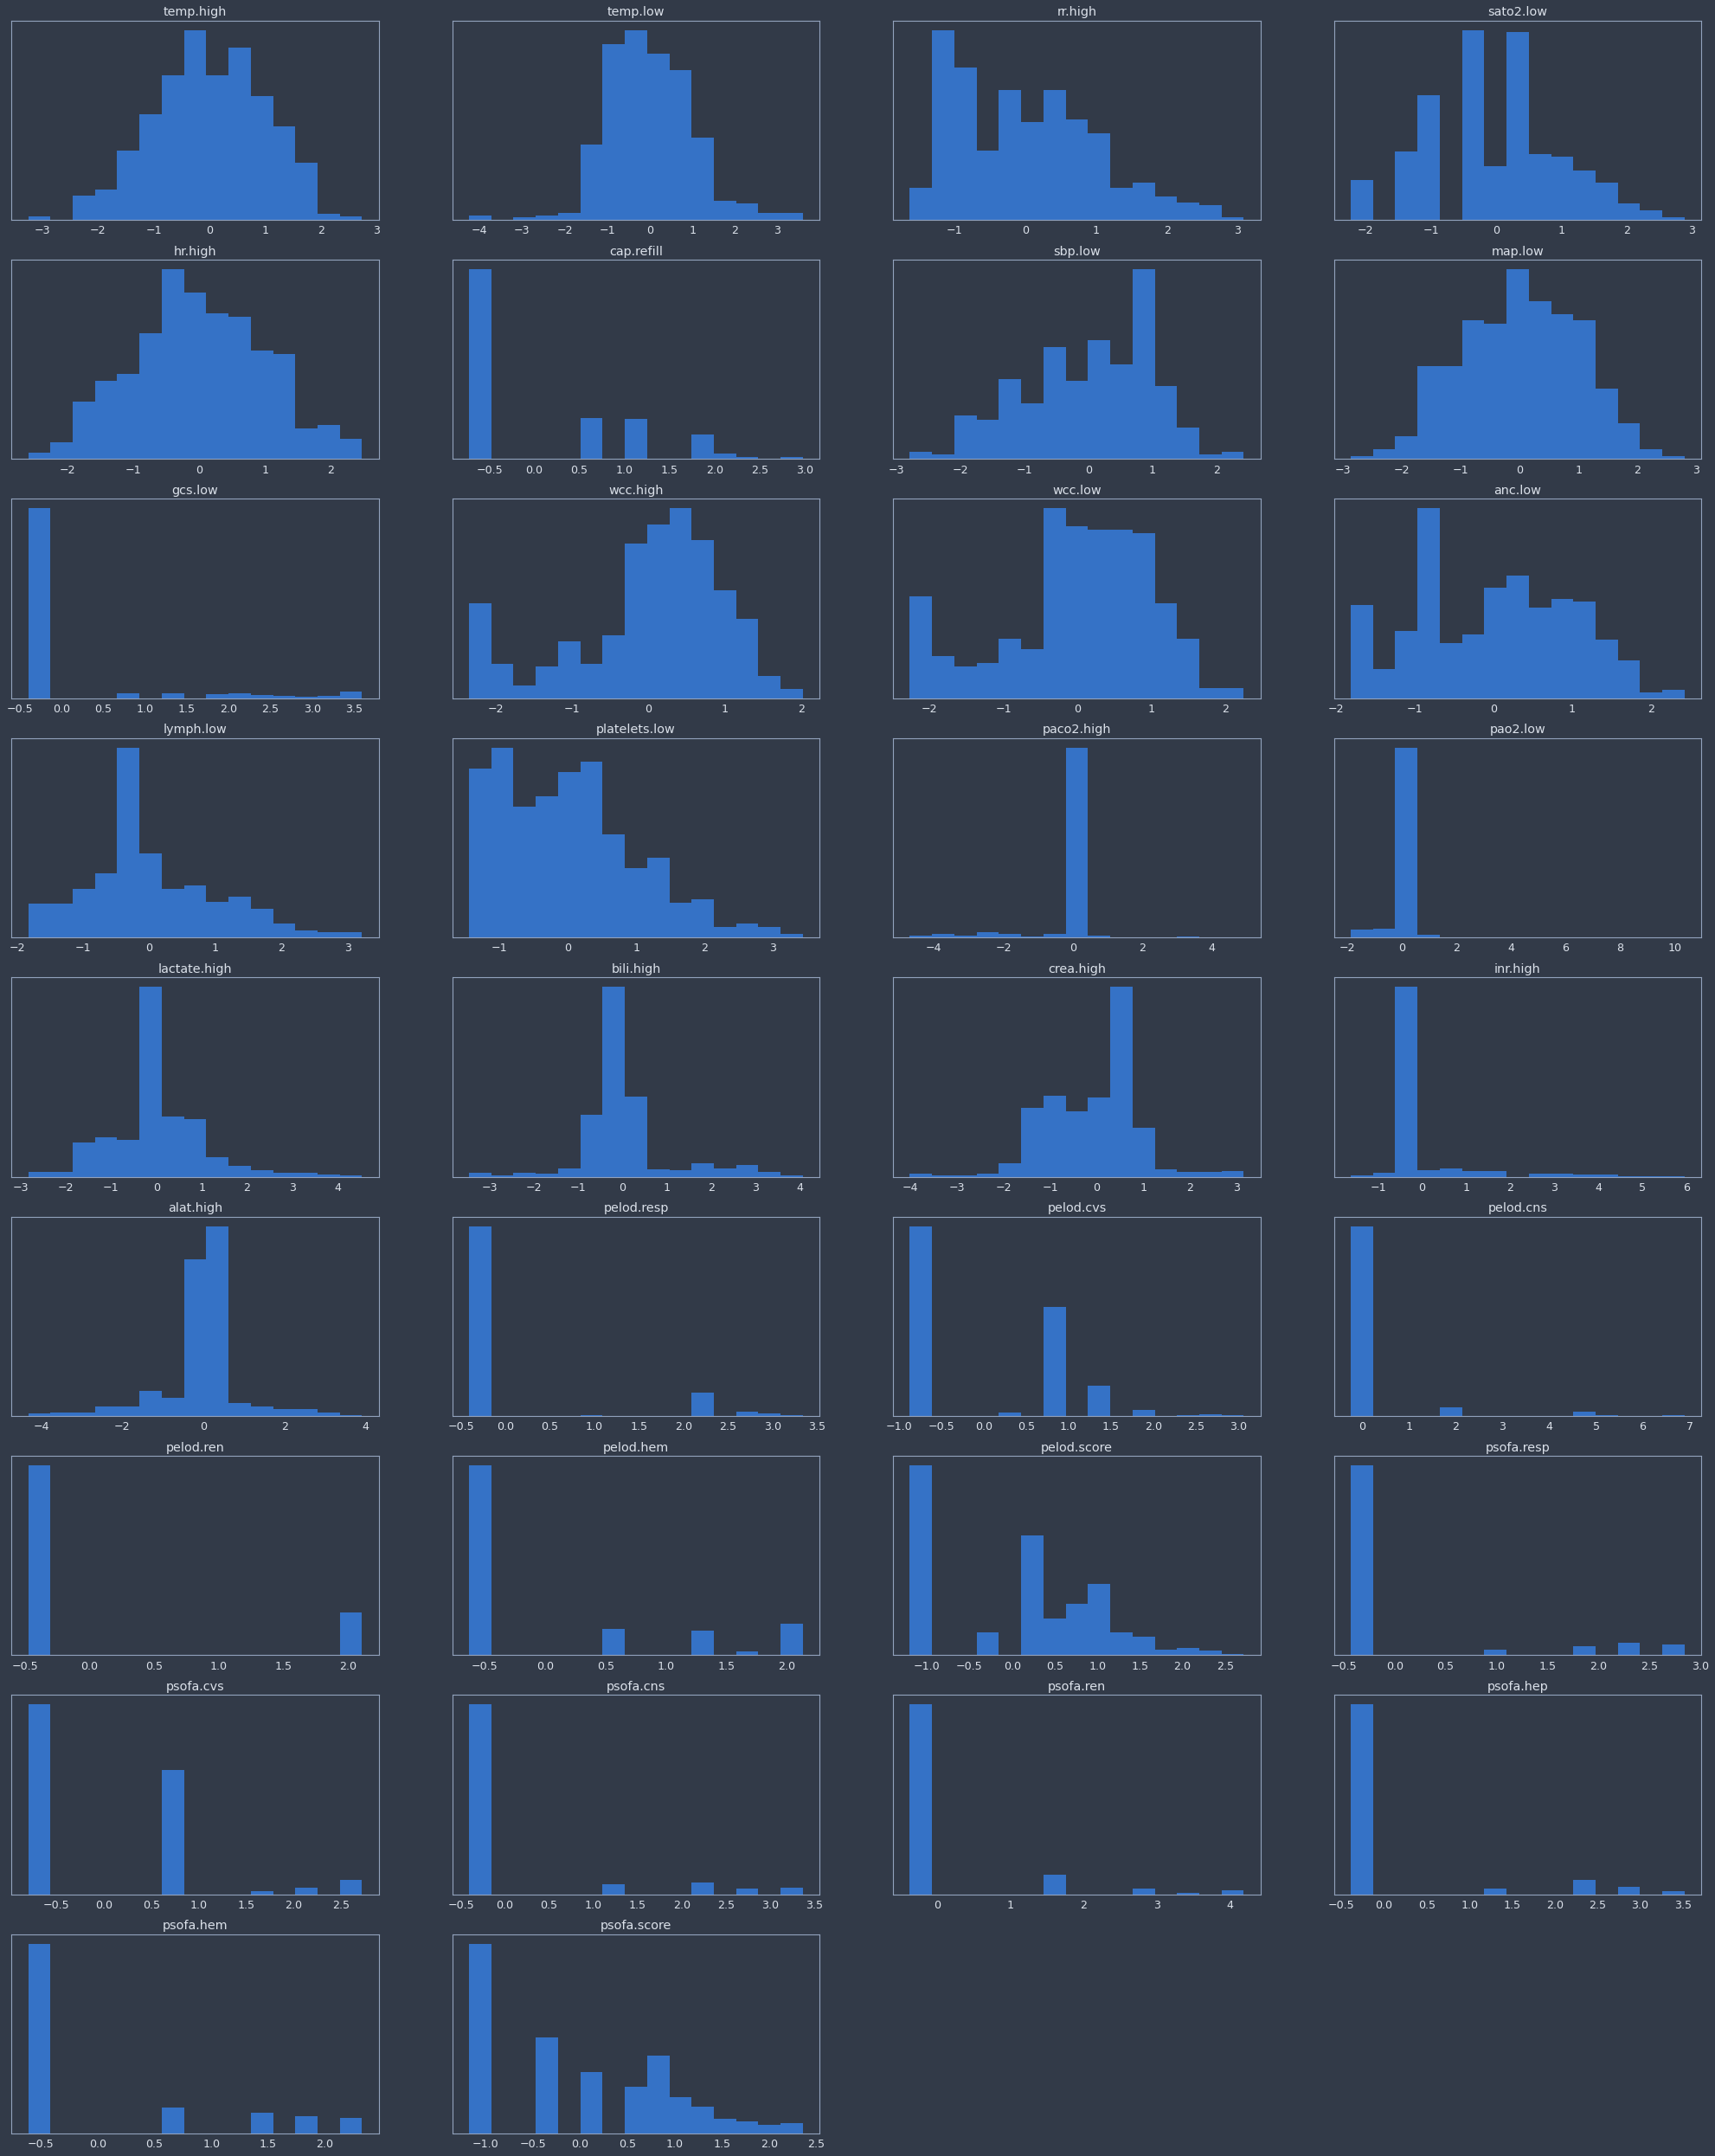

In [32]:
physdist_fg2

##### Contextual PCs

###### Compute

In [33]:
conpc_fg2 = plt.figure(figsize=(35,25))

for i,c in enumerate(conpc_cs):

    ax = conpc_fg2.add_subplot(5,4,i+1)
    ax.hist(std_df[c],density=True,bins=15)
    ax.set_title(c)
    ax.set_yticks([])
    ax.grid(False)

plt.close()

###### Figure

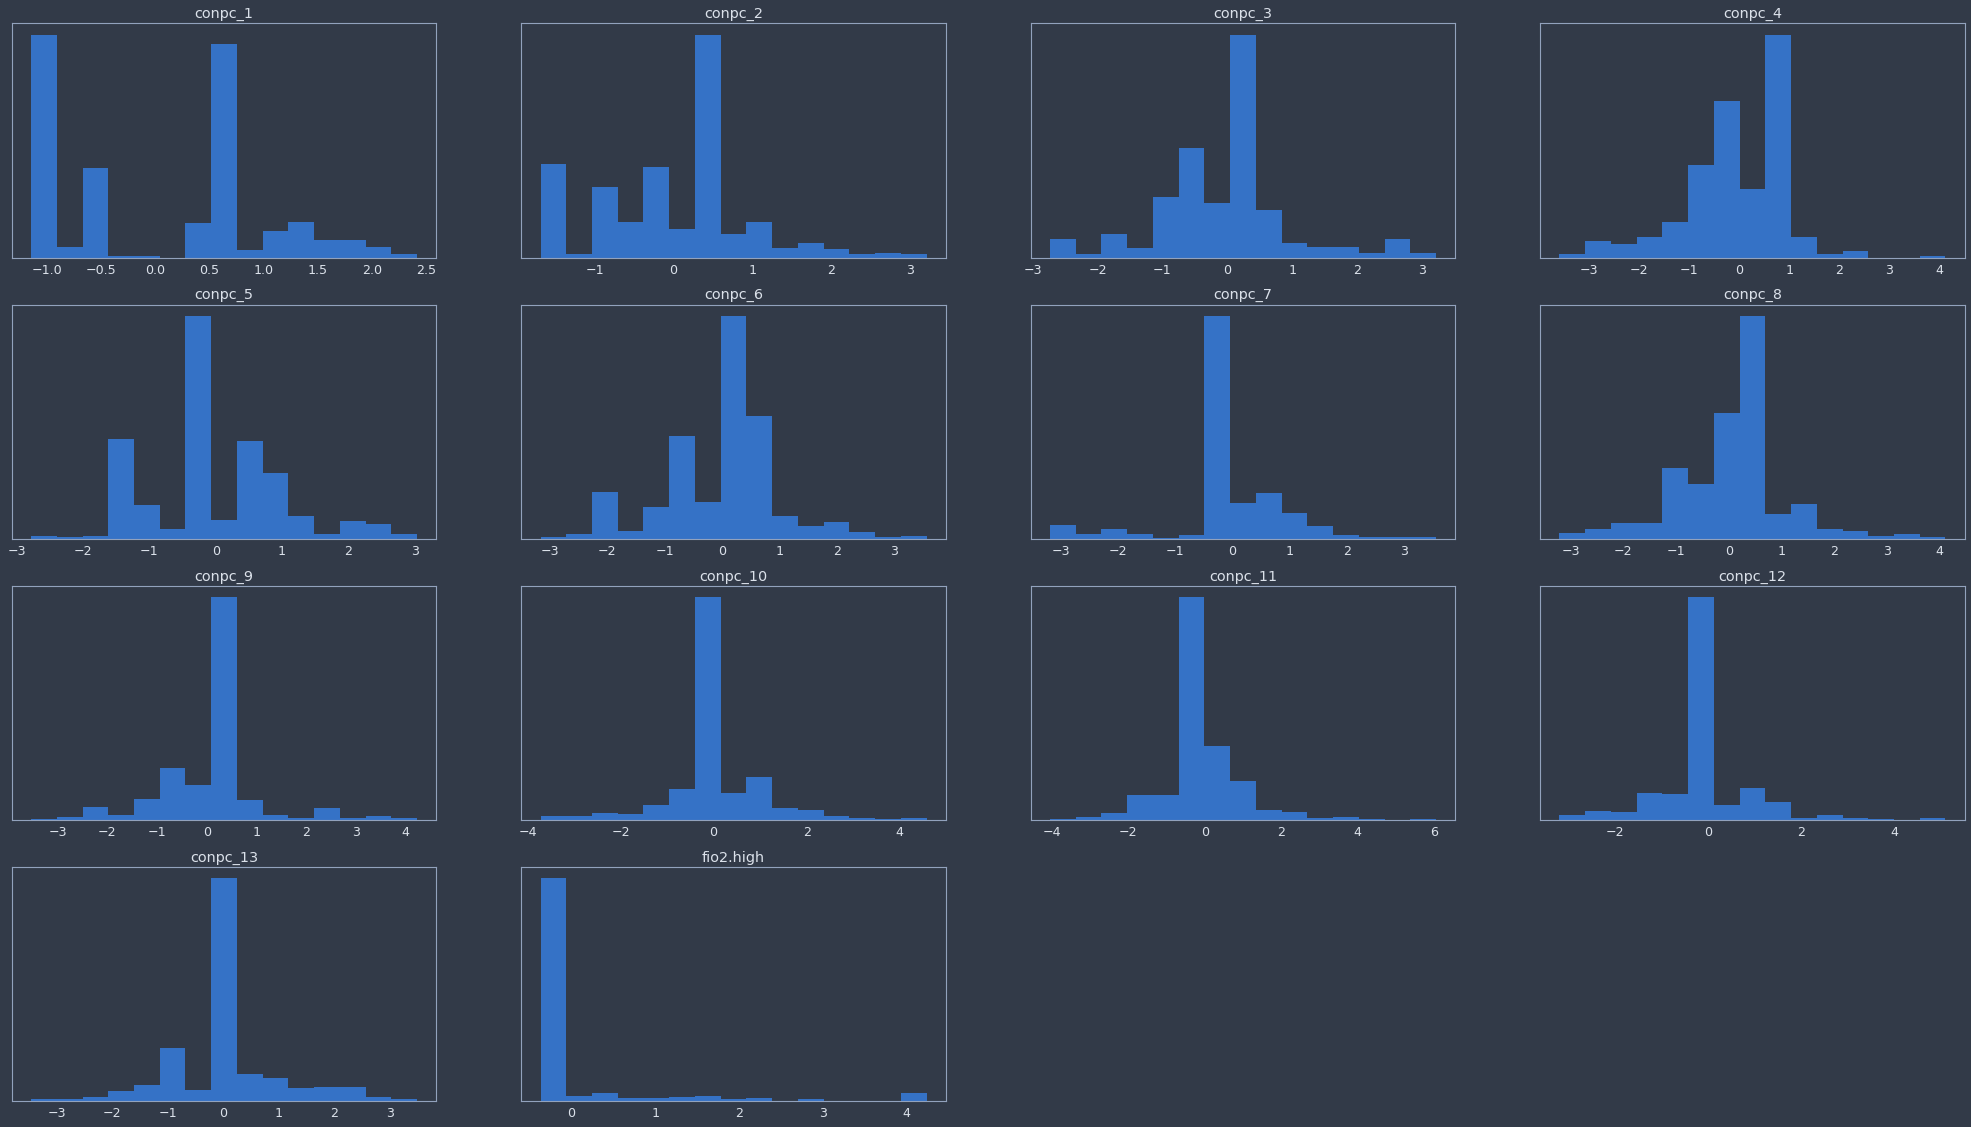

In [34]:
conpc_fg2

##### Infection PCs

###### Compute

In [35]:
infpc_fg2 = plt.figure(figsize=(35,40))

for i,c in enumerate(infpc_cs):

    ax = infpc_fg2.add_subplot(8,4,i+1)
    ax.hist(std_df[c],density=True,bins=15)
    ax.set_title(c)
    ax.set_yticks([])
    ax.grid(False)

plt.close()

###### Figure

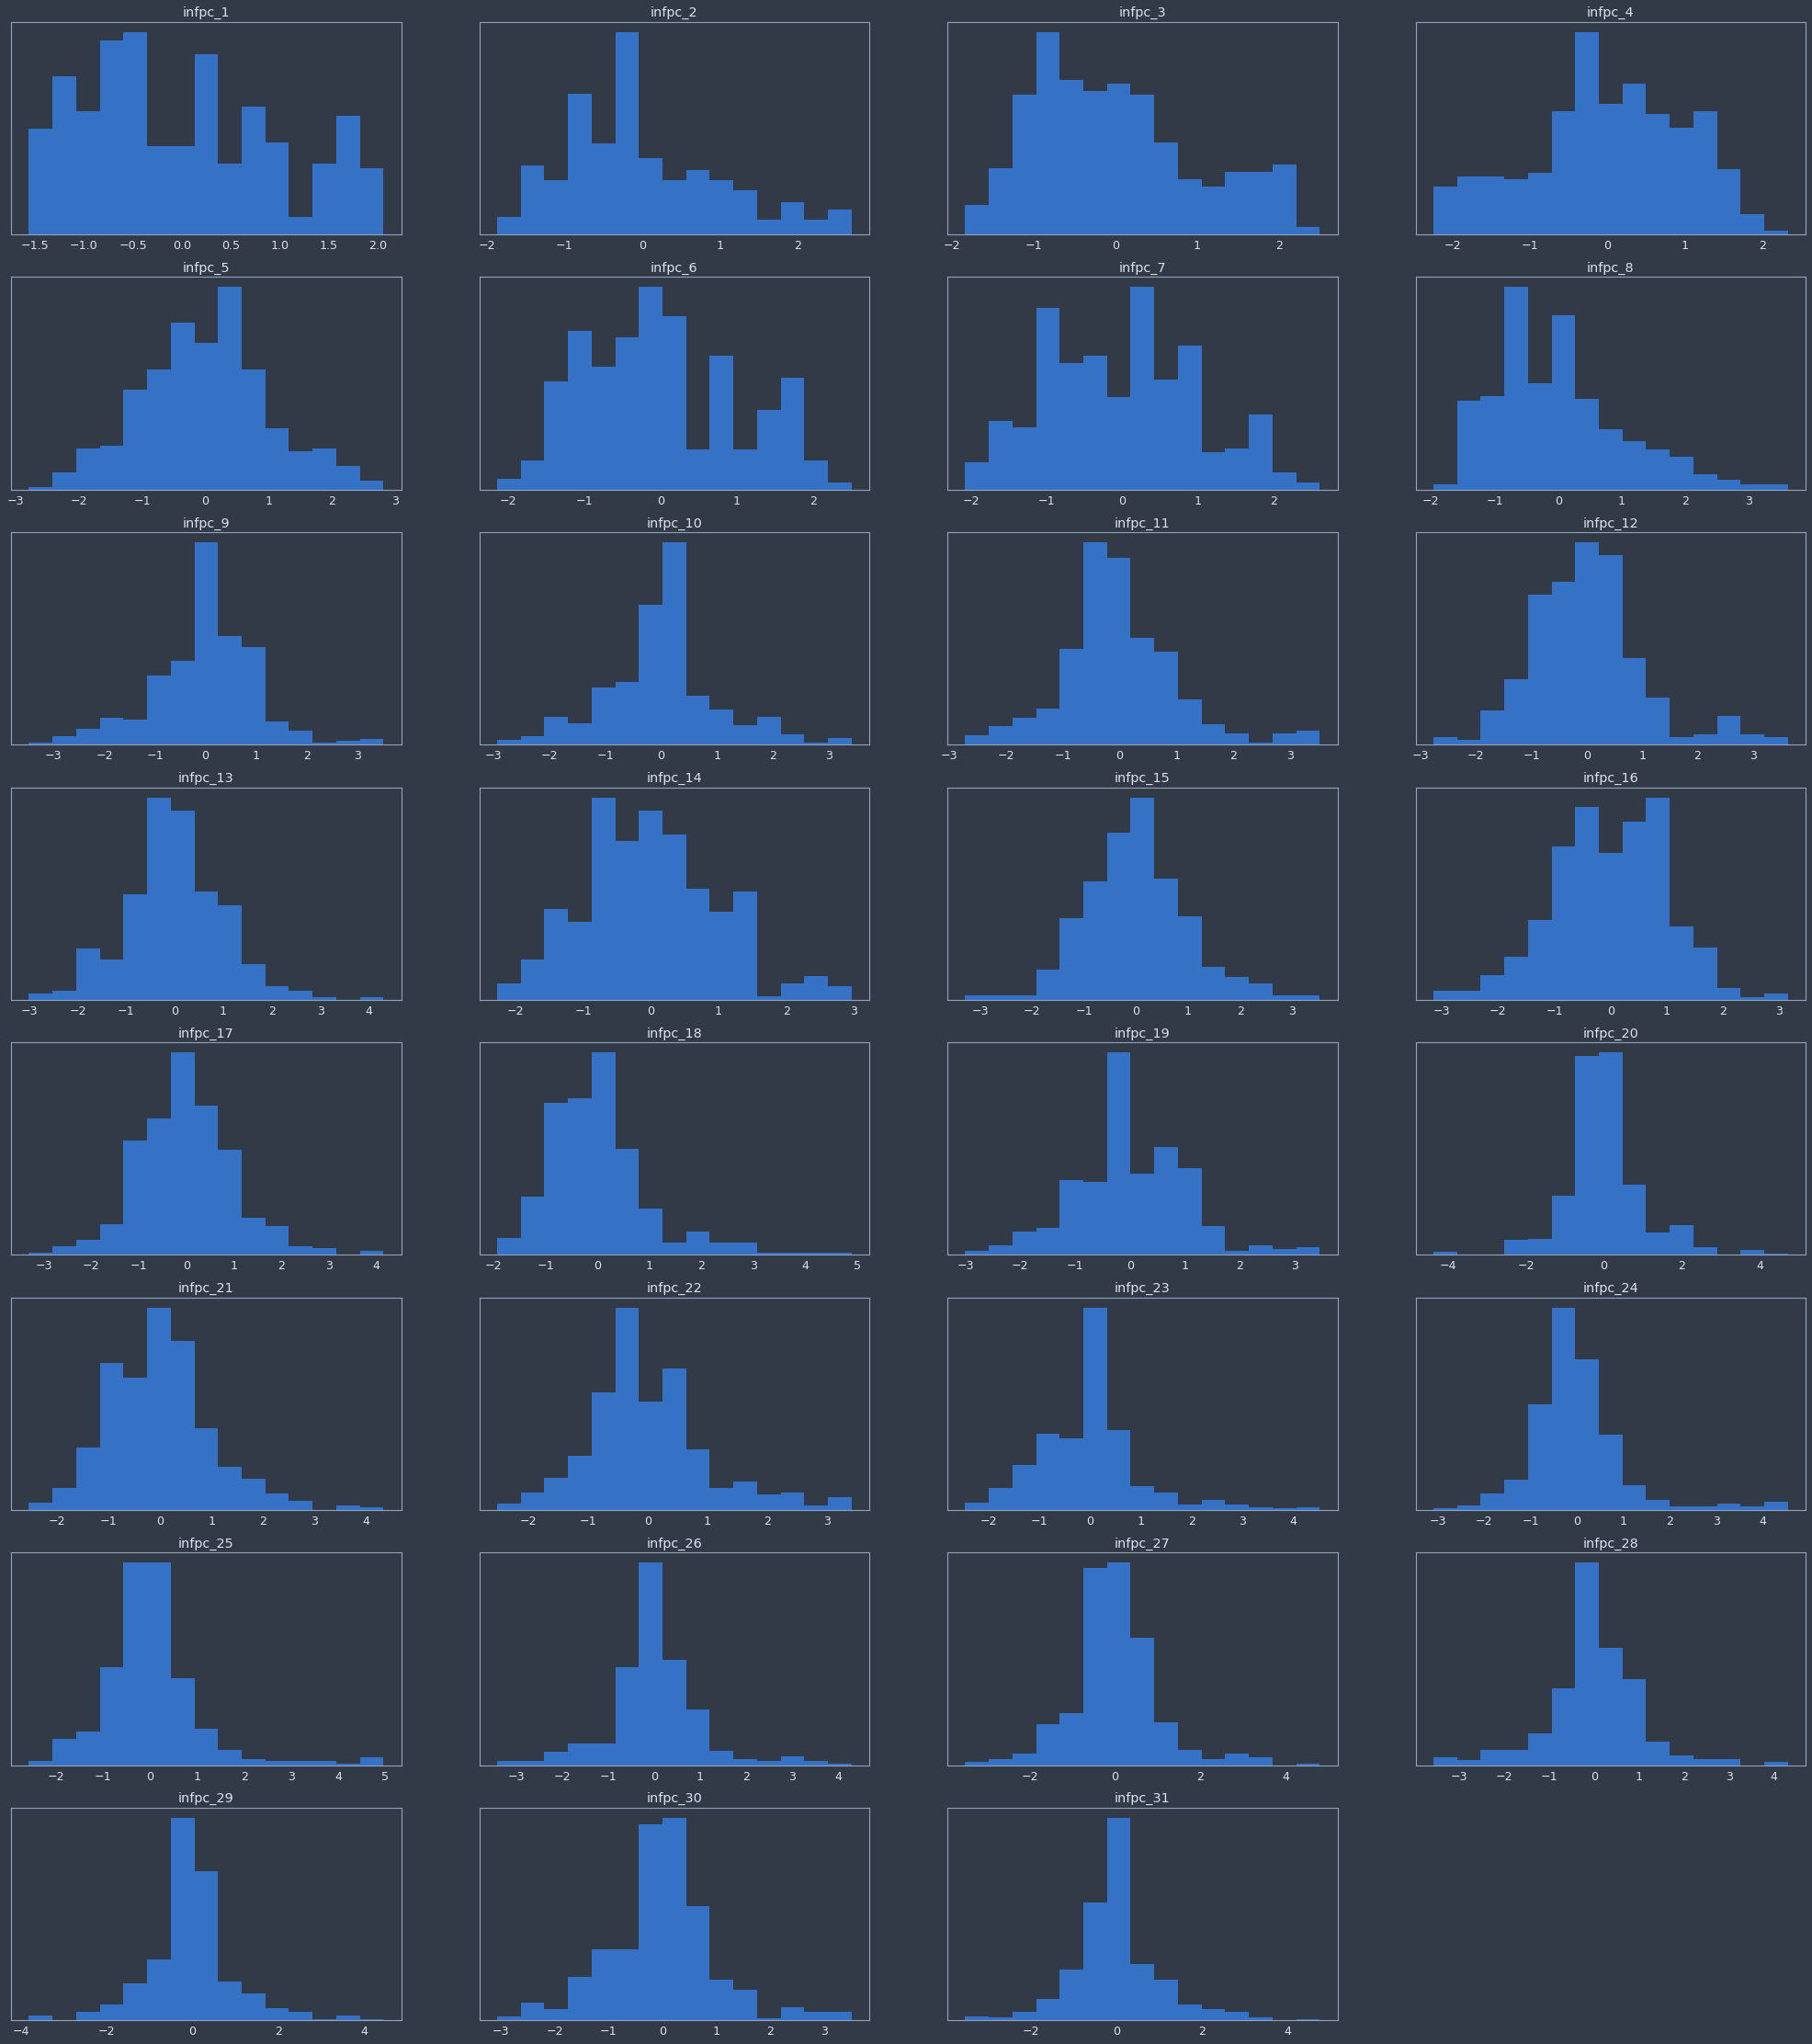

In [36]:
infpc_fg2

## Analysis

### Single-Protein Clustering Based on Bimodal Proteins

###### Find Bimodal Proteins

In [37]:
pro_df  = imp_df[protein_cs].copy(deep=True)
bim_fig = plt.figure(figsize=(24,13.5))
b       = 19
bims    = {}
i       = 1

for p in pro_df.columns:

    X   = pro_df.loc[:,p].values
    kde = skn.KernelDensity(kernel='gaussian',bandwidth=1).fit(X.reshape(-1,1))
    y,x = np.histogram(X,bins=b)
    w   = x[1]-x[0]
    x   = x[:,np.newaxis]
    k   = np.exp(kde.score_samples(x))
    dk  = np.gradient(k)
    ddk = np.gradient(dk)
    sk  = np.sign(dk)
    ssk = np.sign(ddk)
    C1  = sk[1:]-sk[:-1]!=0
    C2  = ddk[1:]>.0001
    C   = np.concatenate([[False],C1&C2])
    x0s = x[C]
    
    if len(x0s)!=0:
        
        tx0s = []
        
        for x0 in x0s:
            C3 = y[:np.where(x==x0)[0][0]].sum()/y.sum()>.2
            C4 = y[np.where(x==x0)[0][0]:].sum()/y.sum()>.2
            if C3&C4:
                tx0s += [x0]
        
        if len(tx0s)!=0:
            
            ax = bim_fig.add_subplot(5,7,i)
            ax.hist(X,bins=b,density=True)
        
            for tx0 in tx0s:
                ax.axvline(tx0-w/2,lw=2,color='white')
                ax.set_xticklabels([])
                ax.set_yticklabels([])
                ax.set_title(p)
            
            bims[p] = tx0s[0][0]
            i+=1
            
plt.close()

###### Figure

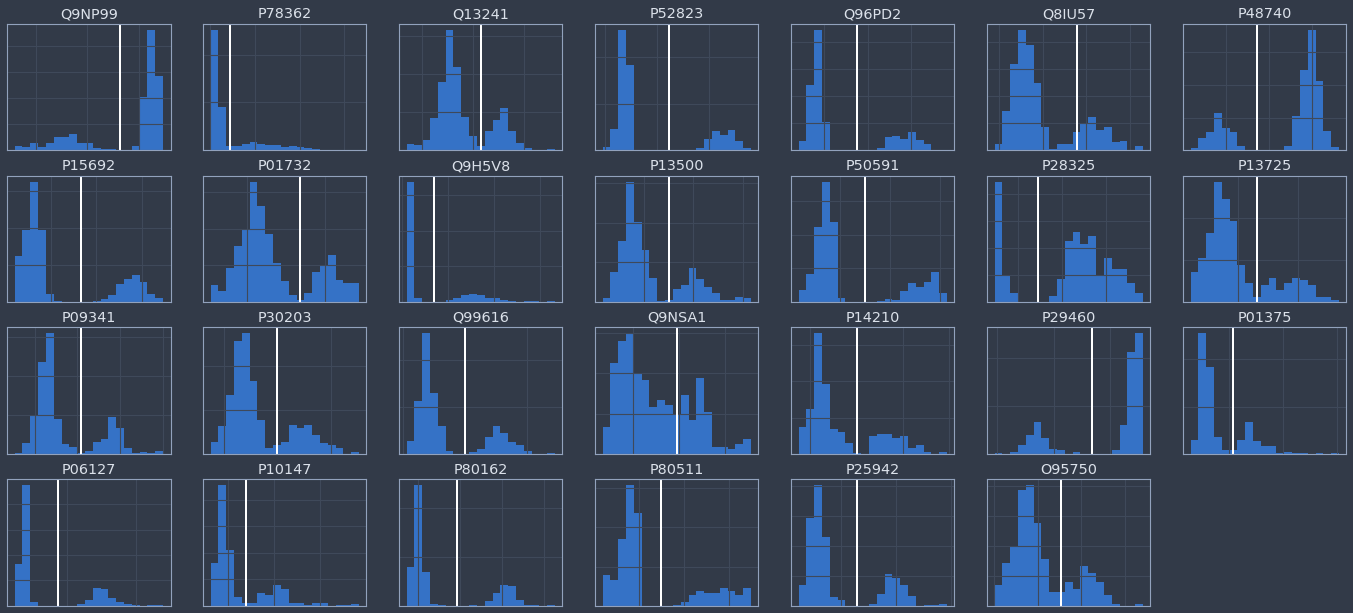

In [38]:
bim_fig

###### Associated Physiology

In [142]:
l = .05

test_cs = sel_dc['physio']
bimphy_df = pd.DataFrame(index=bims,columns=test_cs)

for p in bims:
    
    c                                = '%sbimphy_cluster' % p
    bim_df                           = imp_df.copy(deep=True)
    cols   = [c for c in bim_df.columns if c in test_cs]+[p]
    bim_df = bim_df[cols]
    bim_df[c]                        = 0
    bim_df.loc[bim_df[p]<=bims[p],c] = 1
    bim_df = bim_df.drop(p,axis=1)
    
    f_df,null_df = f_pvalues(bim_df,'%sbimphy' % p,l)
    f_df         = f_df[f_df.p_value==f_df.p_value.min()]
    
    bimphy_df.loc[p,f_df.index] = 1
    
    print(p)
    print(f_df,'\n')
    
bimphy_df = bimphy_df.fillna(0)

bimphy_pdf = bimphy_df.sum(axis=0).sort_values(ascending=False)
bimphy_bdf = bimphy_df.sum(axis=1).sort_values(ascending=True)
bimphy_df = bimphy_df.loc[bimphy_bdf.index,bimphy_pdf.index]

bimphy_fig = plt.figure(figsize=(16,9))
ax = bimphy_fig.add_subplot(111)
ax.pcolor(bimphy_df)
ax.set_yticks(np.arange(bimphy_df.shape[0])+.5)
ax.set_yticklabels(bimphy_df.index)
ax.set_xticks(np.arange(bimphy_df.shape[1])+.5)
ax.set_xticklabels(bimphy_df.columns,rotation=45,ha='right')
ax.grid('lightgray')
plt.close()

100%|████████████████████████████████████████████████████████████| 438/438 [00:01<00:00, 342.43it/s]


Q9NP99
            p_value     f_stat
sbp.low    0.002278  32.595257
temp.high  0.002278  22.827757
map.low    0.002278  21.553918
hr.high    0.002278  14.542469
rr.high    0.002278  14.502526
temp.low   0.002278  10.566082 



100%|████████████████████████████████████████████████████████████| 438/438 [00:01<00:00, 340.97it/s]


P78362
            p_value     f_stat
sbp.low    0.002278  24.849076
map.low    0.002278  17.905170
temp.high  0.002278  16.945445
hr.high    0.002278   8.574981 



100%|████████████████████████████████████████████████████████████| 438/438 [00:01<00:00, 339.72it/s]


Q13241
            p_value     f_stat
sbp.low    0.002278  34.510661
map.low    0.002278  22.670726
temp.high  0.002278  21.351251
hr.high    0.002278  15.422850
rr.high    0.002278  14.702211
temp.low   0.002278  12.146715 



100%|████████████████████████████████████████████████████████████| 438/438 [00:01<00:00, 338.12it/s]


P52823
            p_value     f_stat
sbp.low    0.002278  32.595257
temp.high  0.002278  22.827757
map.low    0.002278  21.553918
hr.high    0.002278  14.542469
rr.high    0.002278  14.502526 



100%|████████████████████████████████████████████████████████████| 438/438 [00:01<00:00, 342.14it/s]


Q96PD2
            p_value     f_stat
sbp.low    0.002278  32.595257
temp.high  0.002278  22.827757
map.low    0.002278  21.553918
hr.high    0.002278  14.542469
rr.high    0.002278  14.502526
temp.low   0.002278  10.566082 



100%|████████████████████████████████████████████████████████████| 438/438 [00:01<00:00, 342.41it/s]


Q8IU57
            p_value     f_stat
sbp.low    0.002278  28.890167
map.low    0.002278  22.478142
temp.high  0.002278  17.495463
rr.high    0.002278  10.017336 



100%|████████████████████████████████████████████████████████████| 438/438 [00:01<00:00, 340.83it/s]


P48740
            p_value     f_stat
sbp.low    0.002278  32.595257
temp.high  0.002278  22.827757
map.low    0.002278  21.553918
hr.high    0.002278  14.542469
rr.high    0.002278  14.502526 



100%|████████████████████████████████████████████████████████████| 438/438 [00:01<00:00, 341.53it/s]


P15692
            p_value     f_stat
sbp.low    0.002278  32.595257
temp.high  0.002278  22.827757
map.low    0.002278  21.553918
hr.high    0.002278  14.542469
rr.high    0.002278  14.502526 



100%|████████████████████████████████████████████████████████████| 438/438 [00:01<00:00, 341.18it/s]


P01732
            p_value     f_stat
sbp.low    0.002278  33.075934
temp.high  0.002278  25.658269
map.low    0.002278  22.256976
hr.high    0.002278  14.725956 



100%|████████████████████████████████████████████████████████████| 438/438 [00:01<00:00, 341.29it/s]


Q9H5V8
            p_value     f_stat
sbp.low    0.002278  32.595257
temp.high  0.002278  22.827757
map.low    0.002278  21.553918
hr.high    0.002278  14.542469
rr.high    0.002278  14.502526 



100%|████████████████████████████████████████████████████████████| 438/438 [00:01<00:00, 341.08it/s]


P13500
            p_value     f_stat
sbp.low    0.002278  29.249089
temp.high  0.002278  22.716010
map.low    0.002278  19.252281
rr.high    0.002278  14.224315
hr.high    0.002278  12.600509 



100%|████████████████████████████████████████████████████████████| 438/438 [00:01<00:00, 340.60it/s]


P50591
            p_value     f_stat
sbp.low    0.002278  32.595257
temp.high  0.002278  22.827757
map.low    0.002278  21.553918
hr.high    0.002278  14.542469
rr.high    0.002278  14.502526 



100%|████████████████████████████████████████████████████████████| 438/438 [00:01<00:00, 340.75it/s]


P28325
            p_value     f_stat
sbp.low    0.002278  32.595257
temp.high  0.002278  22.827757
map.low    0.002278  21.553918
hr.high    0.002278  14.542469
rr.high    0.002278  14.502526
temp.low   0.002278  10.566082 



100%|████████████████████████████████████████████████████████████| 438/438 [00:01<00:00, 342.19it/s]


P13725
            p_value     f_stat
sbp.low    0.002278  33.150896
temp.high  0.002278  27.116821
map.low    0.002278  26.949240
hr.high    0.002278  16.046314
rr.high    0.002278  14.469389 



100%|████████████████████████████████████████████████████████████| 438/438 [00:01<00:00, 343.39it/s]


P09341
            p_value     f_stat
sbp.low    0.002278  29.965794
temp.high  0.002278  24.298749
map.low    0.002278  19.706406
rr.high    0.002278  14.421942
hr.high    0.002278  12.928171
temp.low   0.002278   9.808368 



100%|████████████████████████████████████████████████████████████| 438/438 [00:01<00:00, 343.23it/s]


P30203
            p_value     f_stat
sbp.low    0.002278  27.871393
map.low    0.002278  20.529880
temp.high  0.002278  18.434368
rr.high    0.002278  16.570457
hr.high    0.002278  13.176495 



100%|████████████████████████████████████████████████████████████| 438/438 [00:01<00:00, 342.96it/s]


Q99616
            p_value     f_stat
sbp.low    0.002278  32.595257
temp.high  0.002278  22.827757
map.low    0.002278  21.553918
hr.high    0.002278  14.542469
rr.high    0.002278  14.502526
temp.low   0.002278  10.566082 



100%|████████████████████████████████████████████████████████████| 438/438 [00:01<00:00, 345.31it/s]


Q9NSA1
                p_value     f_stat
gcs.low        0.002278  31.495118
platelets.low  0.002278  24.968066
fio2.high      0.002278  16.688581
alat.high      0.002278  16.386492 



100%|████████████████████████████████████████████████████████████| 438/438 [00:01<00:00, 344.30it/s]


P14210
            p_value     f_stat
sbp.low    0.002278  31.164413
temp.high  0.002278  25.278431
map.low    0.002278  20.090207
rr.high    0.002278  13.722755
hr.high    0.002278  13.049927 



100%|████████████████████████████████████████████████████████████| 438/438 [00:01<00:00, 343.56it/s]


P29460
            p_value     f_stat
sbp.low    0.002278  32.595257
temp.high  0.002278  22.827757
map.low    0.002278  21.553918
hr.high    0.002278  14.542469
rr.high    0.002278  14.502526 



100%|████████████████████████████████████████████████████████████| 438/438 [00:01<00:00, 341.37it/s]


P01375
            p_value     f_stat
sbp.low    0.002278  29.410563
temp.high  0.002278  19.826003
map.low    0.002278  18.869202
rr.high    0.002278  13.788799
hr.high    0.002278  12.751211
temp.low   0.002278  11.837365 



100%|████████████████████████████████████████████████████████████| 438/438 [00:01<00:00, 341.84it/s]


P06127
            p_value     f_stat
sbp.low    0.002278  32.595257
temp.high  0.002278  22.827757
map.low    0.002278  21.553918
hr.high    0.002278  14.542469 



100%|████████████████████████████████████████████████████████████| 438/438 [00:01<00:00, 342.57it/s]


P10147
            p_value     f_stat
sbp.low    0.002278  31.848133
temp.high  0.002278  21.303517
map.low    0.002278  21.081007
rr.high    0.002278  14.303119
hr.high    0.002278  14.197876
temp.low   0.002278  10.465551 



100%|████████████████████████████████████████████████████████████| 438/438 [00:01<00:00, 343.32it/s]


P80162
            p_value     f_stat
sbp.low    0.002278  31.848133
temp.high  0.002278  21.303517
map.low    0.002278  21.081007
rr.high    0.002278  14.303119
hr.high    0.002278  14.197876
temp.low   0.002278  10.465551 



100%|████████████████████████████████████████████████████████████| 438/438 [00:01<00:00, 339.28it/s]


P80511
            p_value     f_stat
sbp.low    0.002278  32.595257
temp.high  0.002278  22.827757
map.low    0.002278  21.553918
hr.high    0.002278  14.542469
rr.high    0.002278  14.502526
temp.low   0.002278  10.566082 



100%|████████████████████████████████████████████████████████████| 438/438 [00:01<00:00, 340.96it/s]


P25942
            p_value     f_stat
sbp.low    0.002278  32.595257
temp.high  0.002278  22.827757
map.low    0.002278  21.553918
hr.high    0.002278  14.542469
rr.high    0.002278  14.502526
temp.low   0.002278  10.566082 



100%|████████████████████████████████████████████████████████████| 438/438 [00:01<00:00, 342.61it/s]


O95750
            p_value     f_stat
temp.high  0.002278  24.049253
sbp.low    0.002278  23.651302
map.low    0.002278  16.406734
hr.high    0.002278  12.844925
rr.high    0.002278  12.513429 



###### Figure

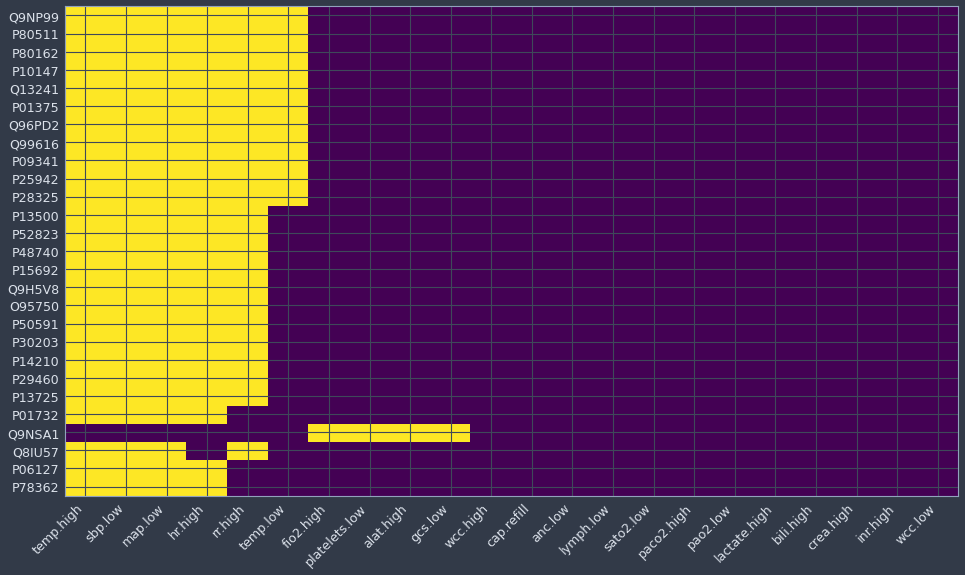

In [143]:
bimphy_fig

###### Associated Organs

In [145]:
l = .05

test_cs = [c for c in sel_dc['organs'] if ('cons' not in c) and ('summary' not in c) and ('score' not in c)]
bimorg_df = pd.DataFrame(index=bims,columns=test_cs)

for p in bims:
    
    c                                = '%sbimorg_cluster' % p
    bim_df                           = imp_df.copy(deep=True)
    cols   = [c for c in bim_df.columns if c in test_cs]+[p]
    bim_df = bim_df[cols]
    bim_df[c]                        = 0
    bim_df.loc[bim_df[p]<=bims[p],c] = 1
    bim_df = bim_df.drop(p,axis=1)
    
    f_df,null_df = f_pvalues(bim_df,'%sbimorg' % p,l)
    f_df         = f_df[f_df.p_value==f_df.p_value.min()]
    
    bimorg_df.loc[p,f_df.index] = 1
    
    print(p)
    print(f_df,'\n')
    
bimorg_df = bimorg_df.fillna(0)

bimorg_pdf = bimorg_df.sum(axis=0).sort_values(ascending=False)
bimorg_bdf = bimorg_df.sum(axis=1).sort_values(ascending=True)
bimorg_df = bimorg_df.loc[bimorg_bdf.index,bimorg_pdf.index]

bimorg_fig = plt.figure(figsize=(16,9))
ax = bimorg_fig.add_subplot(111)
ax.pcolor(bimorg_df)
ax.set_yticks(np.arange(bimorg_df.shape[0])+.5)
ax.set_yticklabels(bimorg_df.index)
ax.set_xticks(np.arange(bimorg_df.shape[1])+.5)
ax.set_xticklabels(bimorg_df.columns,rotation=45,ha='right')
ax.grid('lightgray')
plt.close()

100%|████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 360.70it/s]


Q9NP99
            p_value     f_stat
psofa.hem  0.004566  17.489555
pelod.hem  0.004566  16.446755
psofa.hep  0.004566  11.568501 



100%|████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 359.03it/s]


P78362
            p_value     f_stat
pelod.hem  0.004566  13.031209
psofa.hem  0.004566  12.735571 



100%|████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 358.42it/s]


Q13241
            p_value     f_stat
psofa.hem  0.004566  15.248318
pelod.hem  0.004566  14.207161
psofa.hep  0.004566  10.453646 



100%|████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 359.72it/s]


P52823
            p_value     f_stat
psofa.hem  0.004566  17.489555
pelod.hem  0.004566  16.446755
psofa.hep  0.004566  11.568501 



100%|████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 359.01it/s]


Q96PD2
            p_value     f_stat
psofa.hem  0.004566  17.489555
pelod.hem  0.004566  16.446755
psofa.hep  0.004566  11.568501 



100%|████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 362.90it/s]


Q8IU57
            p_value    f_stat
psofa.hep  0.004566  7.394493 



100%|████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 362.28it/s]


P48740
            p_value     f_stat
psofa.hem  0.004566  17.489555
pelod.hem  0.004566  16.446755 



100%|████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 357.22it/s]


P15692
            p_value     f_stat
psofa.hem  0.004566  17.489555
pelod.hem  0.004566  16.446755
psofa.hep  0.004566  11.568501 



100%|████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 360.62it/s]


P01732
            p_value     f_stat
psofa.hem  0.004566  18.732373
pelod.hem  0.004566  18.110235 



100%|████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 363.03it/s]


Q9H5V8
            p_value     f_stat
psofa.hem  0.004566  17.489555
pelod.hem  0.004566  16.446755
psofa.hep  0.004566  11.568501 



100%|████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 363.57it/s]


P13500
            p_value     f_stat
psofa.hem  0.004566  16.128487
pelod.hem  0.004566  15.085752
psofa.hep  0.004566  10.893614 



100%|████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 364.41it/s]


P50591
            p_value     f_stat
psofa.hem  0.004566  17.489555
pelod.hem  0.004566  16.446755
psofa.hep  0.004566  11.568501 



100%|████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 363.71it/s]


P28325
            p_value     f_stat
psofa.hem  0.004566  17.489555
pelod.hem  0.004566  16.446755
psofa.hep  0.004566  11.568501 



100%|████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 364.61it/s]


P13725
            p_value     f_stat
psofa.hem  0.004566  12.283165
psofa.hep  0.004566   8.568553 



100%|████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 361.56it/s]


P09341
            p_value     f_stat
psofa.hem  0.004566  16.576697
pelod.hem  0.004566  15.533638
psofa.hep  0.004566  11.116566 



100%|████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 363.43it/s]


P30203
            p_value     f_stat
pelod.hem  0.004566  16.227100
psofa.hem  0.004566  16.021125
psofa.hep  0.004566  10.021481 



100%|████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 363.90it/s]


Q99616
            p_value     f_stat
psofa.hem  0.004566  17.489555
pelod.hem  0.004566  16.446755
psofa.hep  0.004566  11.568501 



100%|████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 361.32it/s]


Q9NSA1
             p_value     f_stat
psofa.hem   0.004566  46.771958
pelod.hem   0.004566  44.277193
psofa.cns   0.004566  36.444613
pelod.cns   0.004566  20.072792
psofa.cvs   0.004566  17.408305
pelod.resp  0.004566  14.274523
psofa.resp  0.004566   9.083851 



100%|████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 360.76it/s]


P14210
            p_value     f_stat
psofa.hem  0.004566  17.030373
pelod.hem  0.004566  15.987293
psofa.hep  0.004566  11.341523 



100%|████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 359.61it/s]


P29460
            p_value     f_stat
psofa.hem  0.004566  17.489555
pelod.hem  0.004566  16.446755
psofa.hep  0.004566  11.568501 



100%|████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 361.34it/s]


P01375
            p_value     f_stat
psofa.hem  0.004566  16.919777
pelod.hem  0.004566  15.643392
psofa.hep  0.004566  10.453646 



100%|████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 365.29it/s]


P06127
            p_value     f_stat
psofa.hem  0.004566  17.489555
pelod.hem  0.004566  16.446755
psofa.hep  0.004566  11.568501 



100%|████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 364.32it/s]


P10147
            p_value     f_stat
psofa.hem  0.004566  17.030373
pelod.hem  0.004566  15.987293
psofa.hep  0.004566  11.341523 



100%|████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 365.16it/s]


P80162
            p_value     f_stat
psofa.hem  0.004566  17.030373
pelod.hem  0.004566  15.987293
psofa.hep  0.004566  11.341523 



100%|████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 362.92it/s]


P80511
            p_value     f_stat
psofa.hem  0.004566  17.489555
pelod.hem  0.004566  16.446755
psofa.hep  0.004566  11.568501 



100%|████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 365.18it/s]


P25942
            p_value     f_stat
psofa.hem  0.004566  17.489555
pelod.hem  0.004566  16.446755
psofa.hep  0.004566  11.568501 



100%|████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 363.19it/s]


O95750
            p_value     f_stat
psofa.hem  0.004566  15.497720
pelod.hem  0.004566  15.463225
psofa.hep  0.004566  11.810373 



###### Figure

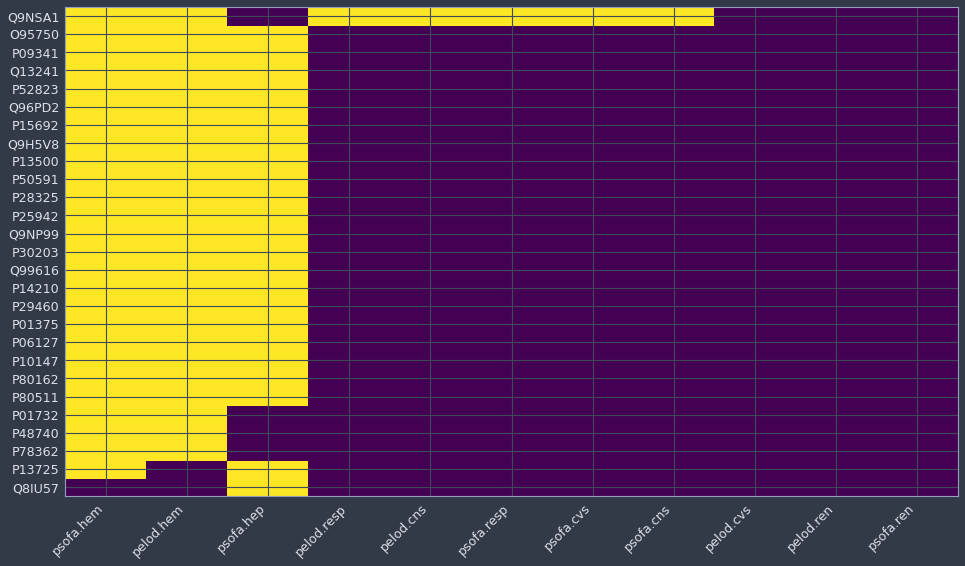

In [146]:
bimorg_fig

###### Associated Chronic Condition

In [130]:
l = .05

test_cs   = [c for c in sel_dc['chronic_conditions'] if ('cate' not in c) and ('summary' not in c)]
bimccc_df = pd.DataFrame(index=bims,columns=test_cs)

for p in bims:
    
    c                                = '%sbim_cluster' % p
    bim_df                           = imp_df.copy(deep=True)
    cols   = [c for c in bim_df.columns if c in test_cs]+[p]
    bim_df = bim_df[cols]
    bim_df[c]                        = 0
    bim_df.loc[bim_df[p]<=bims[p],c] = 1
    bim_df = bim_df.drop(p,axis=1)
    
    p_df = pd.DataFrame(index=test_cs,columns=['p_value'])
    
    for i in p_df.index:
        
        con_tab = np.empty((2,2))
        C = bim_df[c] == 1
        V = bim_df[i] == 1
        con_tab[0,0] = bim_df[C&V].shape[0]
        con_tab[0,1] = bim_df[C&~V].shape[0]
        con_tab[1,0] = bim_df[~C&V].shape[0]
        con_tab[1,1] = bim_df[~C&~V].shape[0]
        
        o,pv = sps.fisher_exact(con_tab)
        p_df.loc[i,'p_value'] = pv
        
    p_df = p_df.sort_values('p_value')
    p_df = p_df[p_df.p_value<l/p_df.shape[0]]
    
    bimccc_df.loc[p,p_df.index] = 1
    
    print(p)
    print(p_df,'\n')
    
bimccc_df = bimccc_df.fillna(0)

bimccc_pdf = bimccc_df.sum(axis=0).sort_values(ascending=False)
bimccc_bdf = bimccc_df.sum(axis=1).sort_values(ascending=True)
bimccc_df = bimccc_df.loc[bimccc_bdf.index,bimccc_pdf.index]

bimccc_fig = plt.figure(figsize=(16,9))
ax = bimccc_fig.add_subplot(111)
ax.pcolor(bimccc_df)
ax.set_yticks(np.arange(bimccc_df.shape[0])+.5)
ax.set_yticklabels(bimccc_df.index)
ax.set_xticks(np.arange(bimccc_df.shape[1])+.5)
ax.set_xticklabels(bimccc_df.columns,rotation=45,ha='right')
ax.grid('lightgray')
plt.close()

Q9NP99
             p_value
ccc.onco         0.0
ccc.surg    0.000001
ccc.cardio  0.000008
ccc.neo     0.000028
ccc.uro     0.001806
ccc.gastro  0.002959 

P78362
             p_value
ccc.onco         0.0
ccc.surg    0.000006
ccc.cardio  0.000052
ccc.neo     0.000166
ccc.uro     0.003581 

Q13241
             p_value
ccc.onco         0.0
ccc.surg    0.000003
ccc.neo     0.000005
ccc.cardio  0.000015
ccc.uro      0.00346 

P52823
             p_value
ccc.onco         0.0
ccc.surg    0.000001
ccc.cardio  0.000008
ccc.neo     0.000028
ccc.uro     0.001806
ccc.gastro  0.002959 

Q96PD2
             p_value
ccc.onco         0.0
ccc.surg    0.000001
ccc.cardio  0.000008
ccc.neo     0.000028
ccc.uro     0.001806
ccc.gastro  0.002959 

Q8IU57
             p_value
ccc.onco    0.000001
ccc.surg    0.000035
ccc.cardio  0.000178
ccc.neo     0.000518 

P48740
             p_value
ccc.onco         0.0
ccc.surg    0.000001
ccc.cardio  0.000008
ccc.neo     0.000028
ccc.uro     0.001806
ccc.gastro  0.0

###### Figure

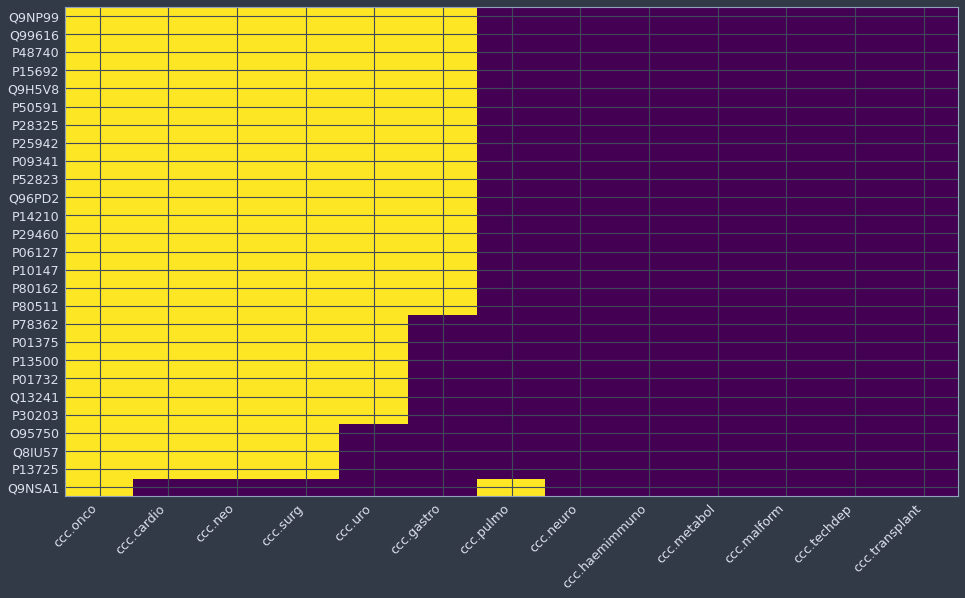

In [131]:
bimccc_fig

###### Associated Infection Focus

In [132]:
l = .05

test_cs   = [c for c in sel_dc['infections']]
biminf_df = pd.DataFrame(index=bims,columns=test_cs)

for p in bims:
    
    c                                = '%sbim_cluster' % p
    bim_df                           = imp_df.copy(deep=True)
    cols   = [c for c in bim_df.columns if c in test_cs]+[p]
    bim_df = bim_df[cols]
    bim_df[c]                        = 0
    bim_df.loc[bim_df[p]<=bims[p],c] = 1
    bim_df = bim_df.drop(p,axis=1)
    
    p_df = pd.DataFrame(index=test_cs,columns=['p_value'])
    
    for i in p_df.index:
        
        con_tab = np.empty((2,2))
        C = bim_df[c] == 1
        V = bim_df[i] == 1
        con_tab[0,0] = bim_df[C&V].shape[0]
        con_tab[0,1] = bim_df[C&~V].shape[0]
        con_tab[1,0] = bim_df[~C&V].shape[0]
        con_tab[1,1] = bim_df[~C&~V].shape[0]
        
        o,pv = sps.fisher_exact(con_tab)
        p_df.loc[i,'p_value'] = pv
        
    p_df = p_df.sort_values('p_value')
    p_df = p_df[p_df.p_value<l/p_df.shape[0]]
    
    biminf_df.loc[p,p_df.index] = 1
    
    print(p)
    print(p_df,'\n')
    
biminf_df = biminf_df.fillna(0)

biminf_pdf = biminf_df.sum(axis=0).sort_values(ascending=False)
biminf_bdf = biminf_df.sum(axis=1).sort_values(ascending=True)
biminf_df = biminf_df.loc[biminf_bdf.index,biminf_pdf.index]

biminf_fig = plt.figure(figsize=(16,9))
ax = biminf_fig.add_subplot(111)
ax.pcolor(biminf_df)
ax.set_yticks(np.arange(biminf_df.shape[0])+.5)
ax.set_yticklabels(biminf_df.index)
ax.set_xticks(np.arange(biminf_df.shape[1])+.5)
ax.set_xticklabels(biminf_df.columns,rotation=45,ha='right')
ax.grid('lightgray')
plt.close()

Q9NP99
                       p_value
cahai_ca                   0.0
focus_clabsi               0.0
focus_pneumonia            0.0
focus_osteoarticular       0.0
cahai_hai                  0.0
cahai_los.hai              0.0
focus_uti             0.000028
focus_skin            0.002696 

P78362
                       p_value
cahai_ca                   0.0
focus_clabsi               0.0
focus_pneumonia            0.0
focus_osteoarticular       0.0
cahai_hai                  0.0
cahai_los.hai         0.000001
focus_uti             0.000166
focus_cns             0.002513 

Q13241
                       p_value
cahai_ca                   0.0
focus_clabsi               0.0
focus_pneumonia            0.0
focus_osteoarticular       0.0
cahai_hai                  0.0
cahai_los.hai              0.0
focus_uti             0.000055
focus_skin            0.002136 

P52823
                       p_value
cahai_ca                   0.0
focus_clabsi               0.0
focus_pneumonia            0.0
focus

###### Figure

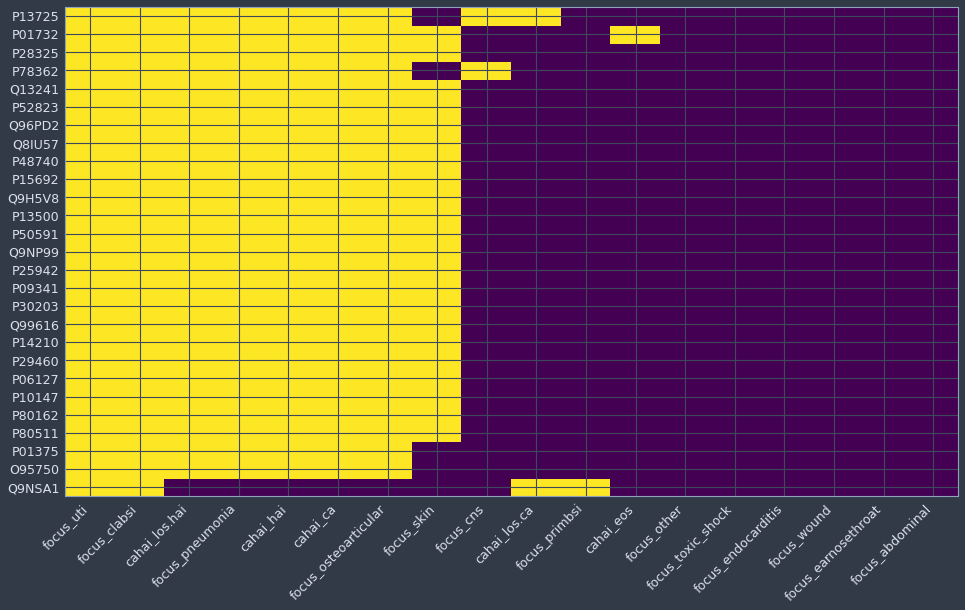

In [133]:
biminf_fig

###### Associated Pathogen

In [136]:
l = .05

test_cs   = [c for c in sel_dc['pathogen']]
bimpat_df = pd.DataFrame(index=bims,columns=test_cs)

for p in bims:
    
    c                                = '%sbim_cluster' % p
    bim_df                           = imp_df.copy(deep=True)
    cols   = [c for c in bim_df.columns if c in test_cs]+[p]
    bim_df = bim_df[cols]
    bim_df[c]                        = 0
    bim_df.loc[bim_df[p]<=bims[p],c] = 1
    bim_df = bim_df.drop(p,axis=1)
    
    p_df = pd.DataFrame(index=test_cs,columns=['p_value'])
    
    for i in p_df.index:
        
        con_tab = np.empty((2,2))
        C = bim_df[c] == 1
        V = bim_df[i] == 1
        con_tab[0,0] = bim_df[C&V].shape[0]
        con_tab[0,1] = bim_df[C&~V].shape[0]
        con_tab[1,0] = bim_df[~C&V].shape[0]
        con_tab[1,1] = bim_df[~C&~V].shape[0]
        
        o,pv = sps.fisher_exact(con_tab)
        p_df.loc[i,'p_value'] = pv
        
    p_df = p_df.sort_values('p_value')
    p_df = p_df[p_df.p_value<l/p_df.shape[0]]
    
    bimpat_df.loc[p,p_df.index] = 1
    
    print(p)
    print(p_df,'\n')
    
bimpat_df = bimpat_df.fillna(0)

bimpat_pdf = bimpat_df.sum(axis=0).sort_values(ascending=False)
bimpat_bdf = bimpat_df.sum(axis=1).sort_values(ascending=True)
bimpat_df = bimpat_df.loc[bimpat_bdf.index,bimpat_pdf.index]

bimpat_fig = plt.figure(figsize=(16,9))
ax = bimpat_fig.add_subplot(111)
ax.pcolor(bimpat_df)
ax.set_yticks(np.arange(bimpat_df.shape[0])+.5)
ax.set_yticklabels(bimpat_df.index)
ax.set_xticks(np.arange(bimpat_df.shape[1])+.5)
ax.set_xticklabels(bimpat_df.columns,rotation=45,ha='right')
ax.grid('lightgray')
plt.close()

Q9NP99
                    p_value
patho_spneumoniae       0.0
patho_ecoli             0.0
patho_spyogenes         0.0
patho_cons         0.000005
patho_othergneg    0.000071 

P78362
                      p_value
patho_spneumoniae         0.0
patho_ecoli               0.0
patho_spyogenes           0.0
patho_cons           0.000017
patho_othergneg      0.000257
patho_nmeningitidis  0.002653 

Q13241
                    p_value
patho_spneumoniae       0.0
patho_ecoli             0.0
patho_spyogenes         0.0
patho_cons         0.000009
patho_othergneg    0.000136 

P52823
                    p_value
patho_spneumoniae       0.0
patho_ecoli             0.0
patho_spyogenes         0.0
patho_cons         0.000005
patho_othergneg    0.000071 

Q96PD2
                    p_value
patho_spneumoniae       0.0
patho_ecoli             0.0
patho_spyogenes         0.0
patho_cons         0.000005
patho_othergneg    0.000071 

Q8IU57
                      p_value
patho_spyogenes           0.0
patho_

###### Figure

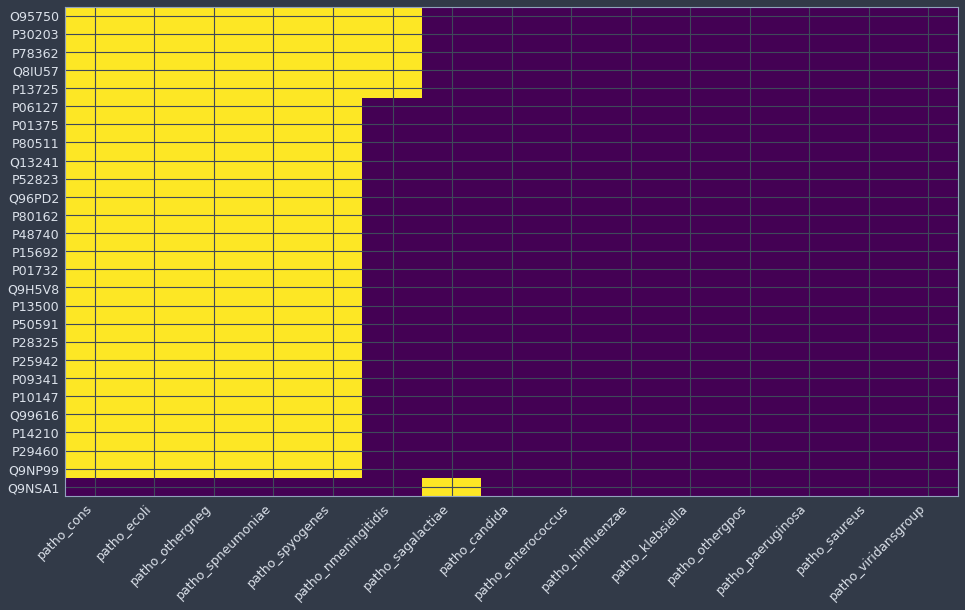

In [137]:
bimpat_fig

###### Associated Demographics

In [138]:
l = .05

test_cs   = [c for c in sel_dc['demographics'] if 'age' not in c]
bimdem_df = pd.DataFrame(index=bims,columns=test_cs)

for p in bims:
    
    c                                = '%sbim_cluster' % p
    bim_df                           = imp_df.copy(deep=True)
    cols   = [c for c in bim_df.columns if c in test_cs]+[p]
    bim_df = bim_df[cols]
    bim_df[c]                        = 0
    bim_df.loc[bim_df[p]<=bims[p],c] = 1
    bim_df = bim_df.drop(p,axis=1)
    
    p_df = pd.DataFrame(index=test_cs,columns=['p_value'])
    
    for i in p_df.index:
        
        con_tab = np.empty((2,2))
        C = bim_df[c] == 1
        V = bim_df[i] == 1
        con_tab[0,0] = bim_df[C&V].shape[0]
        con_tab[0,1] = bim_df[C&~V].shape[0]
        con_tab[1,0] = bim_df[~C&V].shape[0]
        con_tab[1,1] = bim_df[~C&~V].shape[0]
        
        o,pv = sps.fisher_exact(con_tab)
        p_df.loc[i,'p_value'] = pv
        
    p_df = p_df.sort_values('p_value')
    p_df = p_df[p_df.p_value<l/p_df.shape[0]]
    
    bimdem_df.loc[p,p_df.index] = 1
    
    print(p)
    print(p_df,'\n')
    
bimdem_df = bimdem_df.fillna(0)

bimdem_pdf = bimdem_df.sum(axis=0).sort_values(ascending=False)
bimdem_bdf = bimdem_df.sum(axis=1).sort_values(ascending=True)
bimdem_df = bimdem_df.loc[bimdem_bdf.index,bimdem_pdf.index]

bimdem_fig = plt.figure(figsize=(16,9))
ax = bimdem_fig.add_subplot(111)
ax.pcolor(bimdem_df)
ax.set_yticks(np.arange(bimdem_df.shape[0])+.5)
ax.set_yticklabels(bimdem_df.index)
ax.set_xticks(np.arange(bimdem_df.shape[1])+.5)
ax.set_xticklabels(bimdem_df.columns,rotation=45,ha='right')
ax.grid('lightgray')
plt.close()

Q9NP99
                p_value
cate_neonate        0.0
eth_caucasian  0.002369 

P78362
                p_value
cate_neonate        0.0
eth_caucasian  0.001733 

Q13241
                p_value
cate_neonate        0.0
eth_caucasian  0.003858 

P52823
                p_value
cate_neonate        0.0
eth_caucasian  0.002369 

Q96PD2
                p_value
cate_neonate        0.0
eth_caucasian  0.002369 

Q8IU57
             p_value
cate_neonate     0.0 

P48740
                p_value
cate_neonate        0.0
eth_caucasian  0.002369 

P15692
                p_value
cate_neonate        0.0
eth_caucasian  0.002369 

P01732
               p_value
cate_neonate       0.0
eth_caucasian  0.00384 

Q9H5V8
                p_value
cate_neonate        0.0
eth_caucasian  0.002369 

P13500
               p_value
cate_neonate       0.0
eth_caucasian  0.00384 

P50591
                p_value
cate_neonate        0.0
eth_caucasian  0.002369 

P28325
                p_value
cate_neonate        0.0
eth_cauca

###### Figure

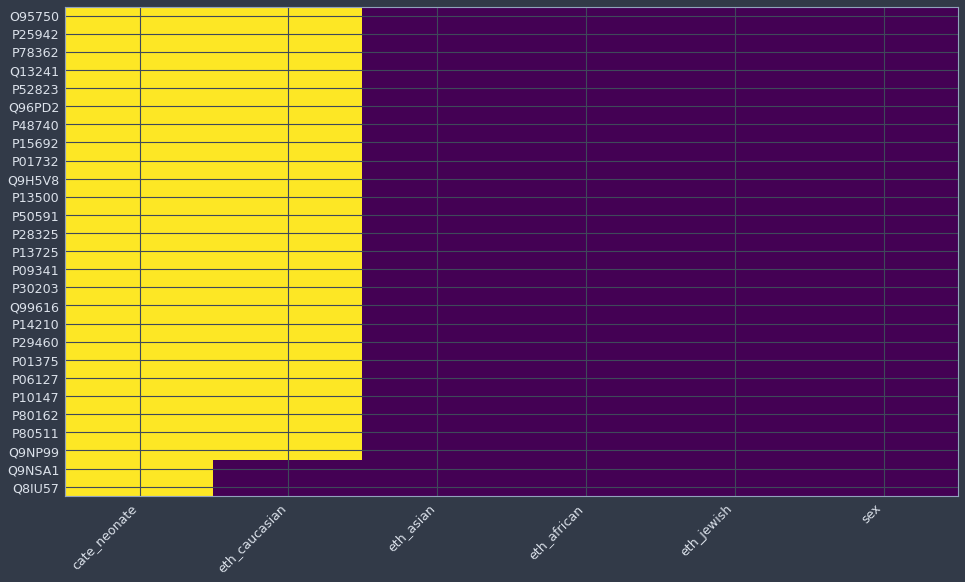

In [139]:
bimdem_fig

###### List

In [148]:
for b in bims:
    print(b)

Q9NP99
P78362
Q13241
P52823
Q96PD2
Q8IU57
P48740
P15692
P01732
Q9H5V8
P13500
P50591
P28325
P13725
P09341
P30203
Q99616
Q9NSA1
P14210
P29460
P01375
P06127
P10147
P80162
P80511
P25942
O95750


### Single-View Clustering

#### Search Grid

In [40]:
n_states = 10
n_comps  = [2]
epss     = np.linspace(.1,10,100)
minss    = np.arange(2,12)

#### Confounders

In [41]:
dem_df = std_df[dempc_cs+['age.at.bc']].copy(deep=True)

#### Physiological View

##### Definition

###### Definition

In [42]:
phy_df = std_df[physio_cs].copy(deep=True)

###### Orthogonalization

In [43]:
phy_odf = ortho_project(phy_df,dem_df)

##### Clustering Optimization

###### Grid Search

In [44]:
label     = 'physio'
phyopt_df = cluster_optimization(phy_odf,n_states,n_comps,epss,minss,label)
phyopt_df.head(3)

100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.38s/it]


,dim,state,epsilon,n_mins,n_clusters,silhouette
271,2,8,2.8,3,11,0.391456
272,2,8,2.8,4,11,0.386793
261,2,8,2.7,3,12,0.386202


###### Compute Silhouettes

In [45]:
phyts_df,phyclu_df = optimal_clusters(phy_odf,phyopt_df)
phyts_fig          = cluster_fig(phyts_df,phyclu_df)

100%|█████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.33s/it]


###### Figure

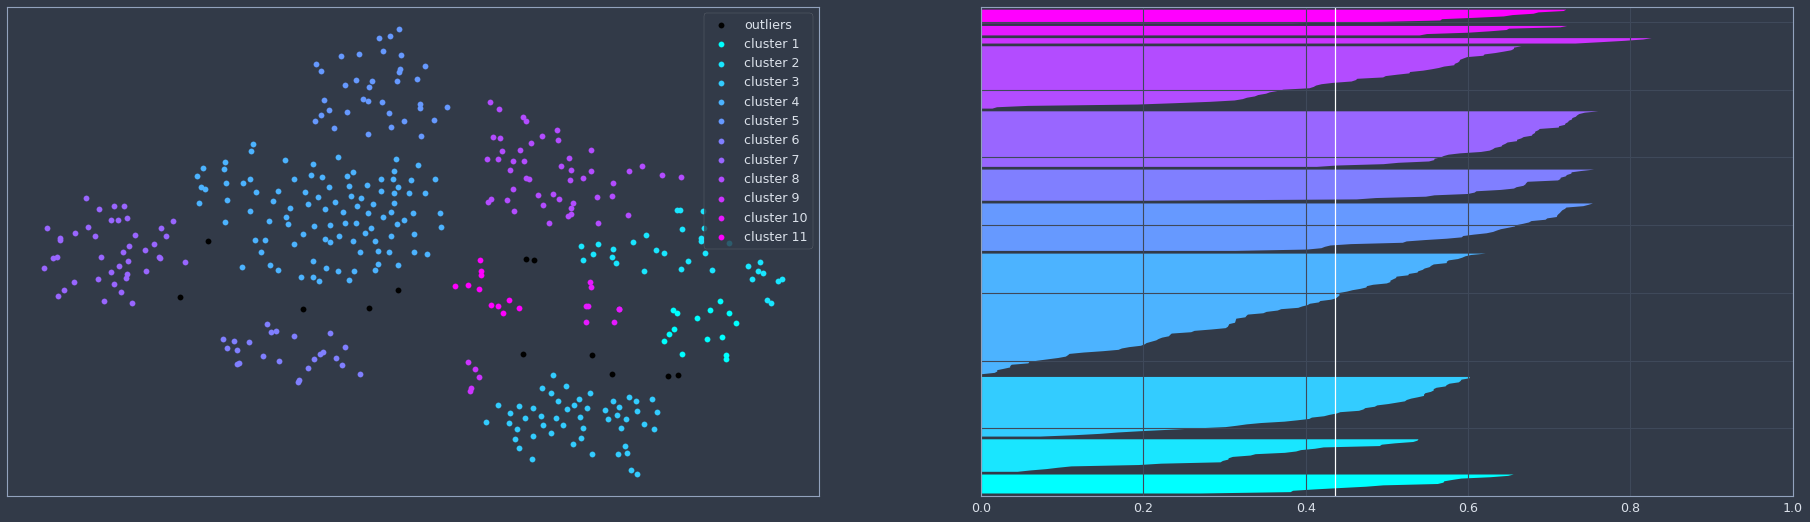

In [46]:
phyts_fig

##### F-Test

###### Compute

In [47]:
stdsv_df = assign_clusters(std_df,phyclu_df,label)
impsv_df = assign_clusters(imp_df,phyclu_df,label)
phyf_df,phynull_df = f_pvalues(impsv_df,label,0.05)
phyfstat_fig = fstat_fig(impsv_df,phyf_df,label)
phyf_df.head(10)

100%|███████████████████████████████████████████████████████████| 9578/9578 [03:53<00:00, 40.96it/s]


,p_value,f_stat
pelod.hem,0.000104,171.888465
cate_neonate,0.000104,109.689416
pelod.ren,0.000104,99.266578
psofa.hem,0.000104,85.454197
psofa.cns,0.000104,76.110078
ccc.onco,0.000104,70.578829
cons05.hem,0.000104,68.187064
pao2.low,0.000104,65.842571
gcs.low,0.000104,56.481457
cons05.cns,0.000104,53.988401


###### Figure

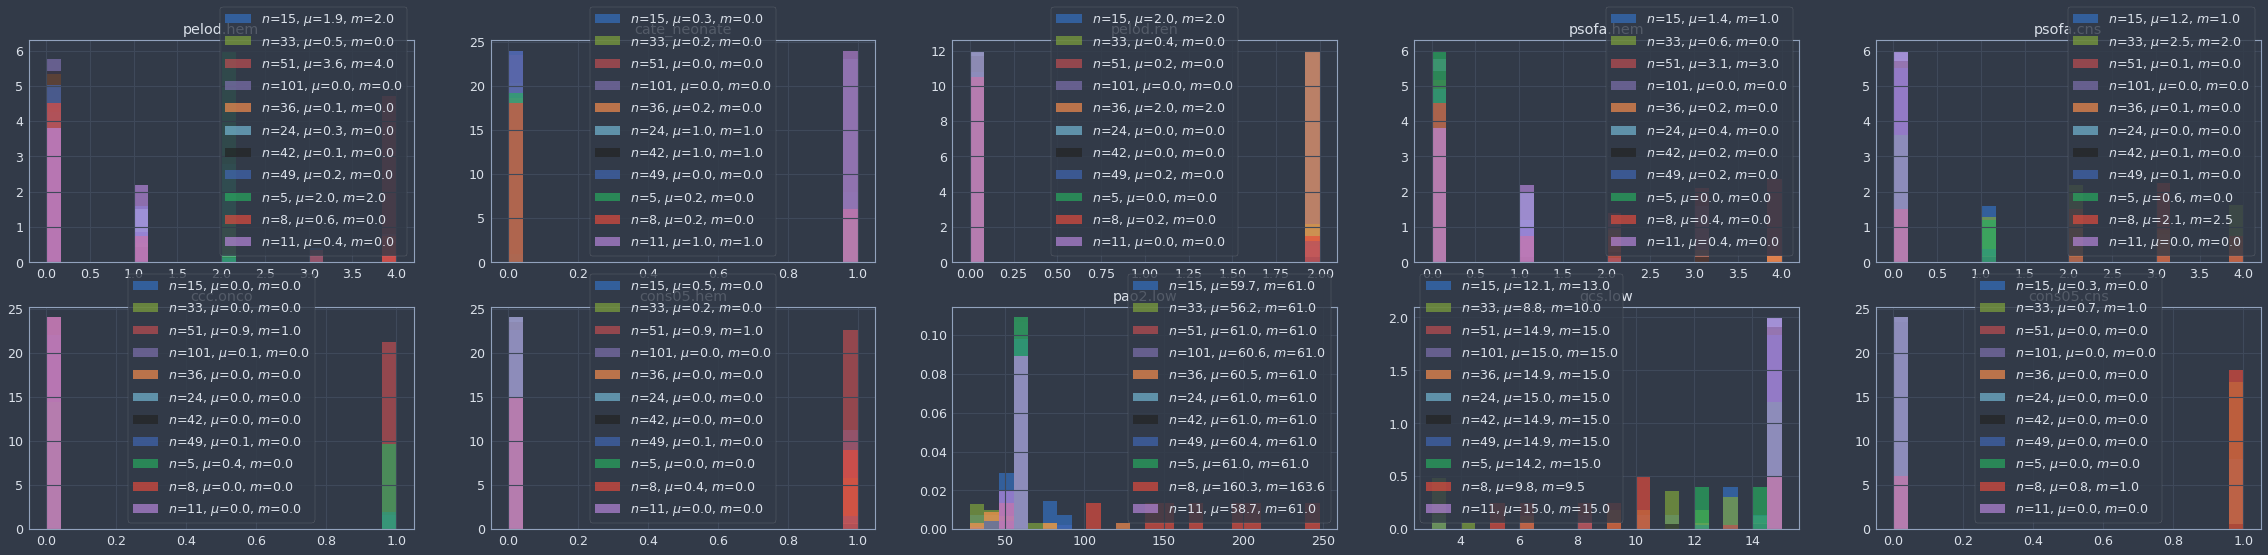

In [48]:
phyfstat_fig

#### Contextual View

##### Definition

###### Definition

In [49]:
con_df = std_df[conpc_cs+infpc_cs].copy(deep=True)

###### Orthogonalization

In [50]:
con_odf = ortho_project(con_df,dem_df)

##### Clustering Optimization

###### Grid Search

In [51]:
label     = 'context'
conopt_df = cluster_optimization(con_odf,n_states,n_comps,epss,minss,label)
conopt_df.head(3)

100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.36s/it]


,dim,state,epsilon,n_mins,n_clusters,silhouette
630,2,6,6.4,2,2,0.291008
725,2,6,7.3,7,2,0.291008
742,2,6,7.5,4,2,0.291008


###### Compute Silhouettes

In [52]:
conts_df,conclu_df = optimal_clusters(con_odf,conopt_df)
conts_fig          = cluster_fig(conts_df,conclu_df)

100%|█████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.35s/it]


###### Figure

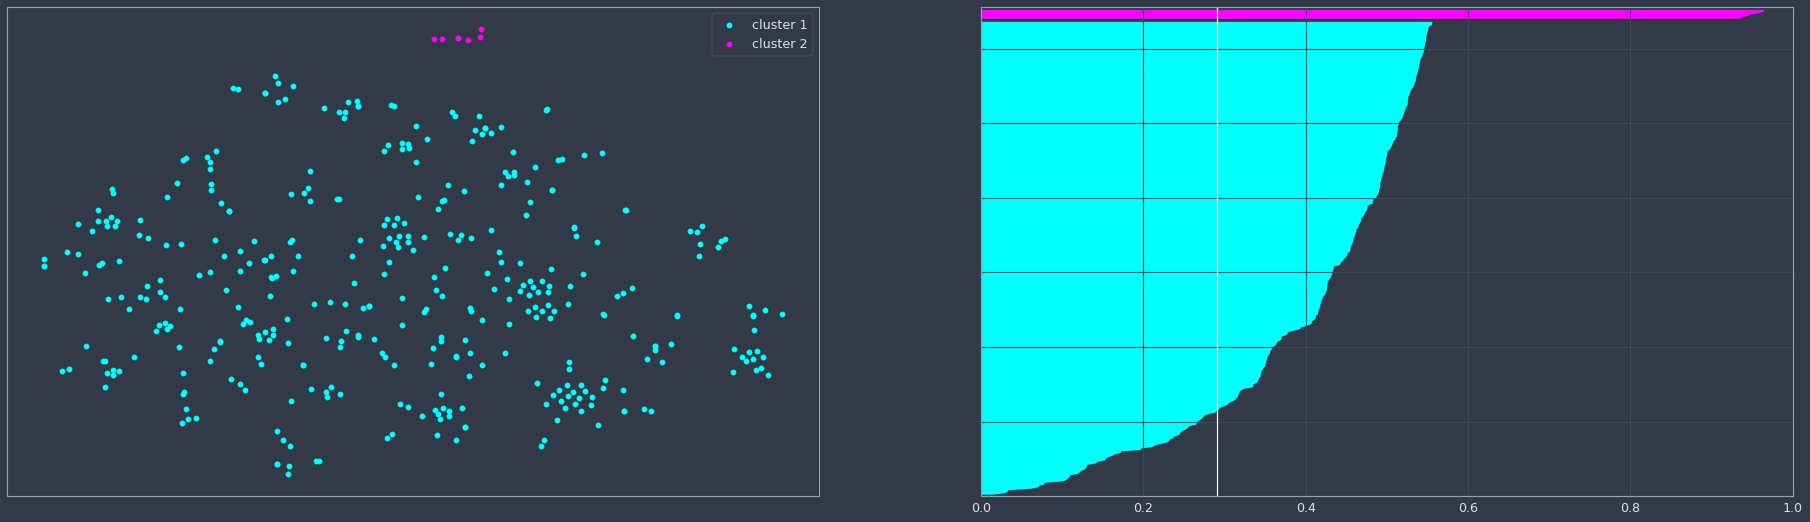

In [53]:
conts_fig

##### F-Test

###### Compute

In [54]:
stdsv_df = assign_clusters(std_df,conclu_df,label)
impsv_df = assign_clusters(imp_df,conclu_df,label)
conf_df,connull_df = f_pvalues(impsv_df,label,.05)
confstat_fig = fstat_fig(impsv_df,conf_df,label)
conf_df.head(10)

100%|███████████████████████████████████████████████████████████| 9578/9578 [03:13<00:00, 49.41it/s]


,p_value,f_stat
focus_wound,0.000104,875.120586
patho_saureus,0.000104,38.661231
cahai_hai,0.000104,24.664526
ccc.surg,0.000731,27.178937
platelets.low,0.001253,10.117625
Q96D42,0.00167,10.277865
cate_comorbidity,0.001984,11.161198
wcc.high,0.005011,8.573474
Q9UN19,0.008978,7.922371
hfnc,0.009082,20.016835


###### Figure

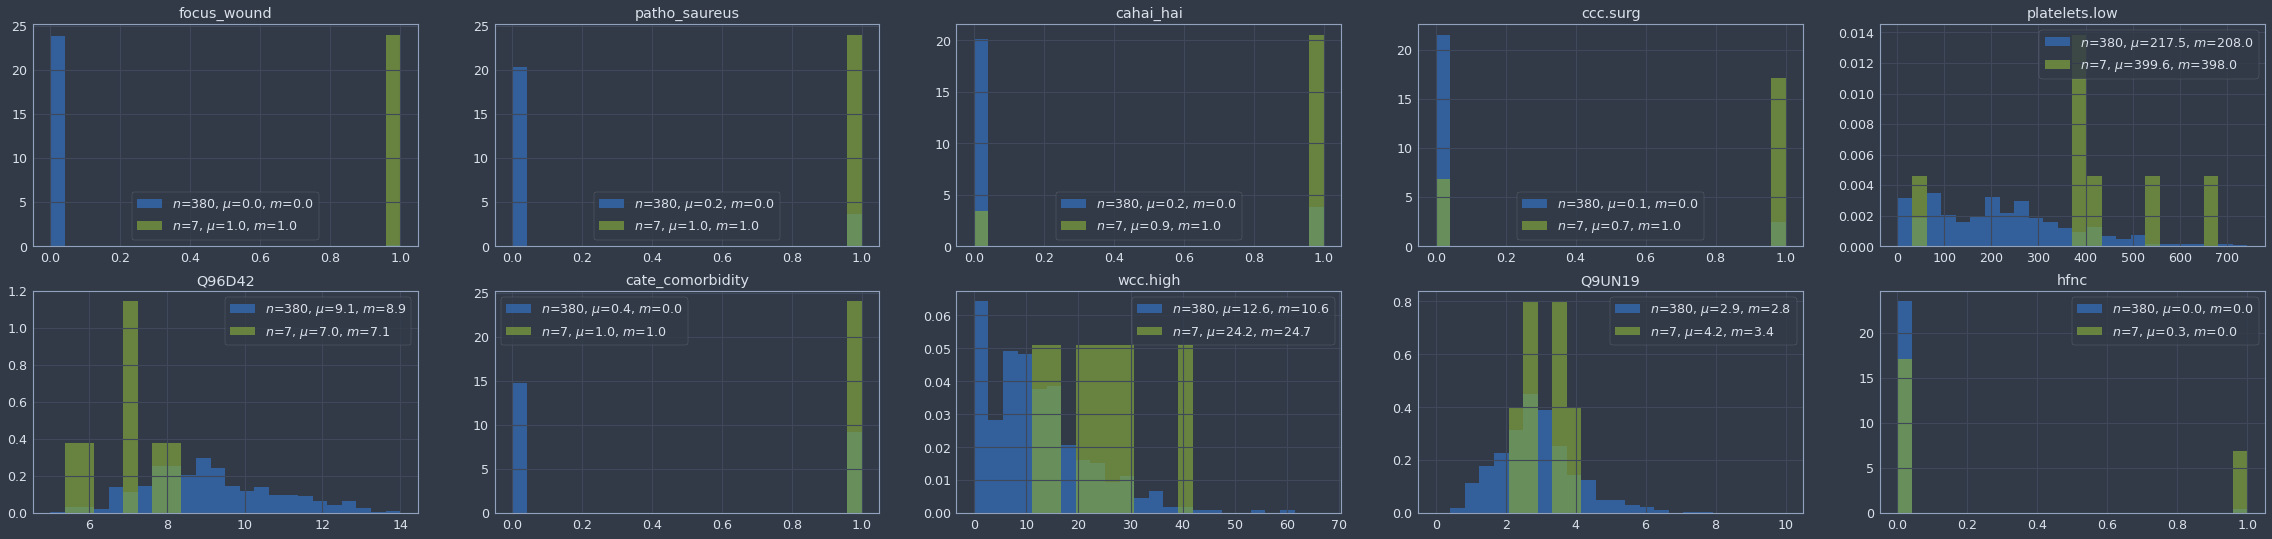

In [55]:
confstat_fig

#### Clinical View

##### Definition

###### Definition

In [56]:
cli_df = std_df[physio_cs+conpc_cs+infpc_cs].copy(deep=True)

###### Orthogonalization

In [57]:
cli_odf = ortho_project(cli_df,dem_df)

##### Clustering Optimization

###### Grid Search

In [58]:
label  = 'clinic'
cliopt_df = cluster_optimization(cli_odf,n_states,n_comps,epss,minss,label)
cliopt_df.head(3)

100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.37s/it]


,dim,state,epsilon,n_mins,n_clusters,silhouette
595,2,1,6.0,7,2,0.245434
560,2,1,5.7,2,2,0.245434
583,2,1,5.9,5,2,0.245434


###### Compute Silhouettes

In [59]:
clits_df,cliclu_df = optimal_clusters(cli_odf,cliopt_df)
clits_fig          = cluster_fig(clits_df,cliclu_df)

100%|█████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.33s/it]


###### Figure

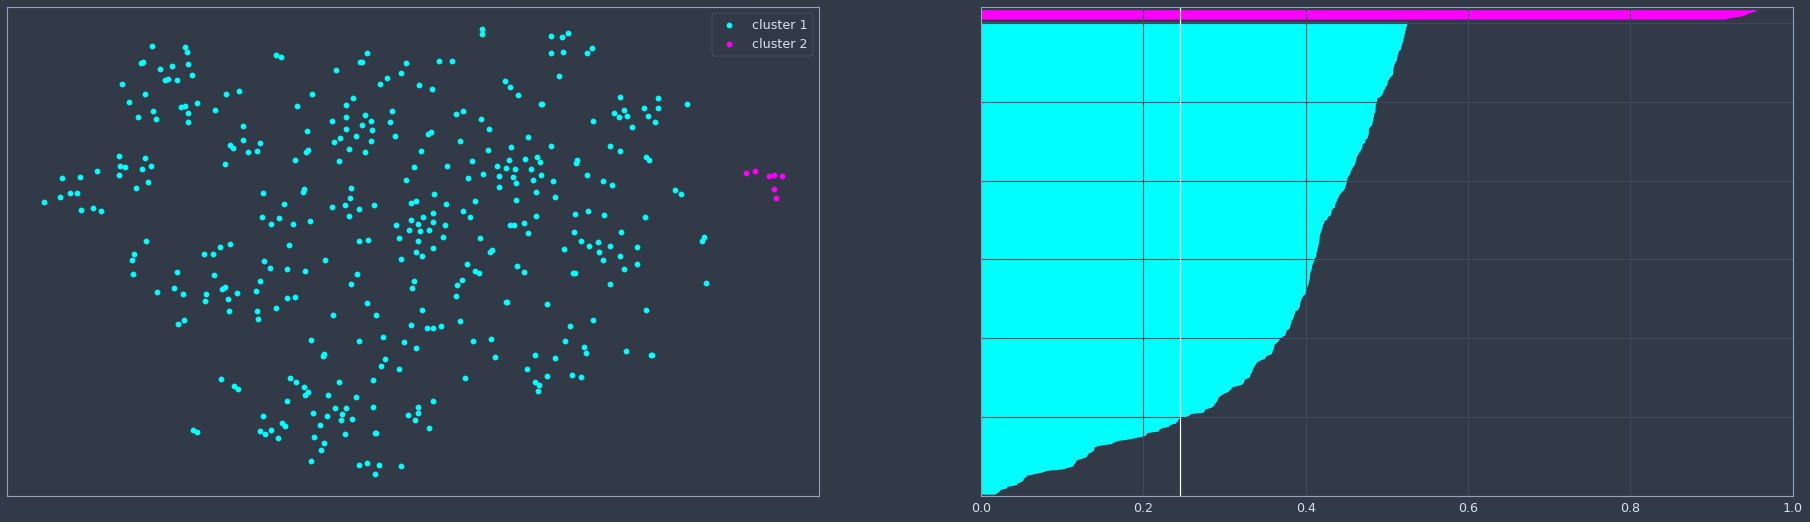

In [60]:
clits_fig

##### F-Test

###### Compute

In [61]:
stdsv_df = assign_clusters(std_df,cliclu_df,label)
impsv_df = assign_clusters(imp_df,cliclu_df,label)
clif_df,clinull_df = f_pvalues(impsv_df,label,.05)
clifstat_fig = fstat_fig(impsv_df,clif_df,label)
clif_df.head(10)

100%|███████████████████████████████████████████████████████████| 9578/9578 [03:12<00:00, 49.64it/s]


,p_value,f_stat
focus_wound,0.000104,875.120586
patho_saureus,0.000104,38.661231
ccc.surg,0.000104,27.178937
cahai_hai,0.000104,24.664526
cate_comorbidity,0.001253,11.161198
Q96D42,0.001879,10.277865
platelets.low,0.002297,10.117625
wcc.high,0.006055,8.573474
hfnc,0.008665,20.016835
Q9UN19,0.010335,7.922371


###### Figure

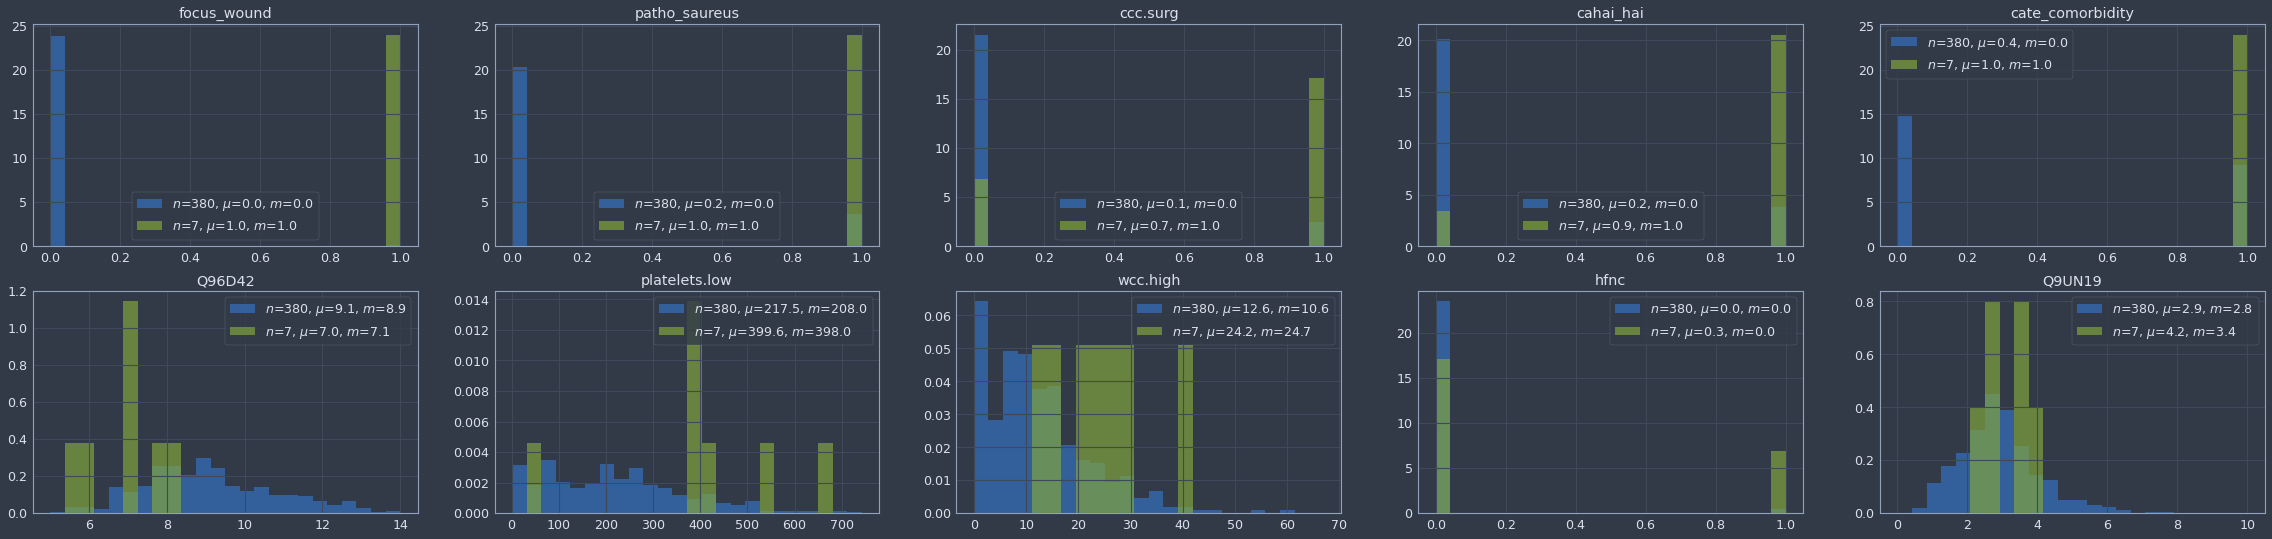

In [62]:
clifstat_fig

#### Proteomic View

##### Definition

###### Definition

In [63]:
pro_df = std_df[protein_cs].copy(deep=True)

###### Orthogonalization

In [64]:
pro_odf = ortho_project(pro_df,dem_df)

##### Clustering Optimization

###### Grid Search

In [65]:
label  = 'protein'
proopt_df = cluster_optimization(pro_odf,n_states,n_comps,epss,minss,label)
proopt_df.head(3)

,dim,state,epsilon,n_mins,n_clusters,silhouette
460,2,4,4.7,2,3,0.595945
470,2,4,4.8,2,3,0.595945
519,2,4,5.2,11,3,0.595945


###### Compute Silhouettes

In [66]:
prots_df,proclu_df = optimal_clusters(pro_odf,proopt_df)
prots_fig          = cluster_fig(prots_df,proclu_df)

100%|█████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.32s/it]


###### Figure

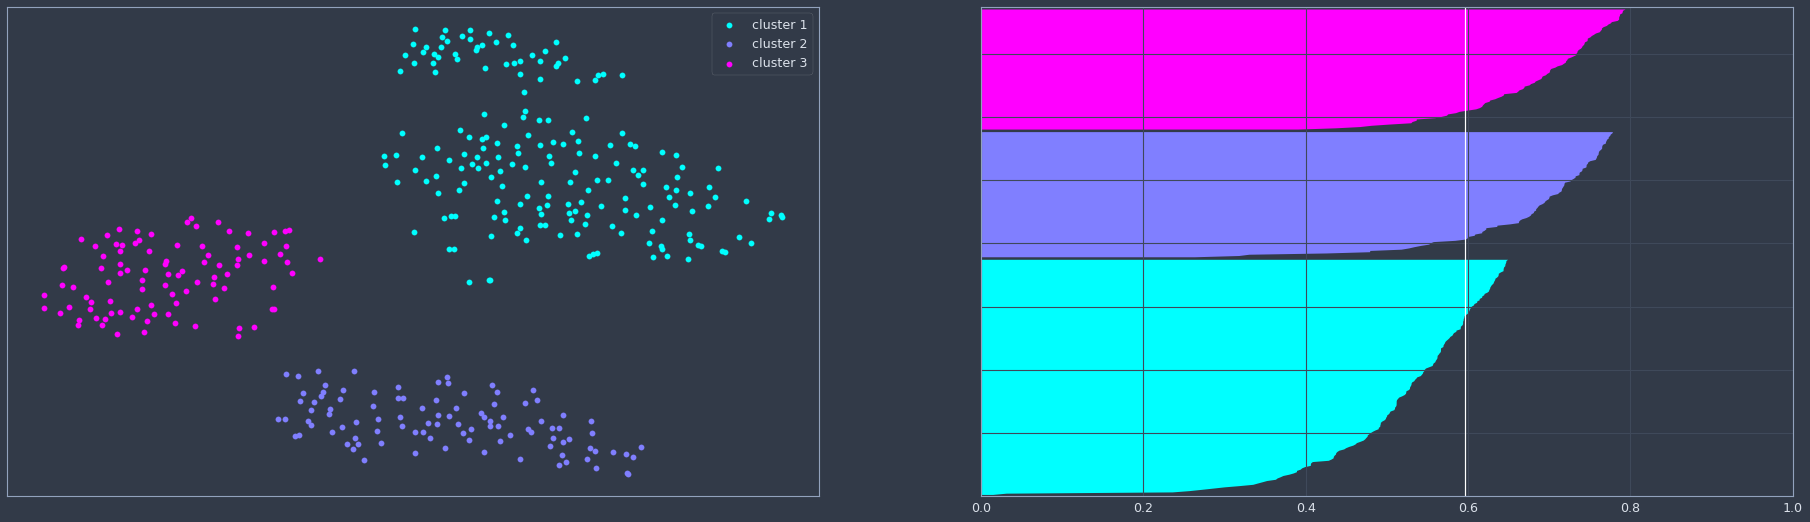

In [67]:
prots_fig

##### F-Test

###### Compute

In [68]:
stdsv_df = assign_clusters(std_df,proclu_df,label)
impsv_df = assign_clusters(imp_df,proclu_df,label)
prof_df,pronull_df = f_pvalues(impsv_df,label,.05)
profstat_fig = fstat_fig(impsv_df,prof_df,label)
prof_df.head(10)

100%|███████████████████████████████████████████████████████████| 9578/9578 [03:20<00:00, 47.85it/s]


,p_value,f_stat
P09603,0.000104,90957.015373
P52823,0.000104,6935.602102
Q14116,0.000104,6337.630277
P29460,0.000104,5937.216390
P80162,0.000104,5479.916147
P06127,0.000104,4650.728111
Q96PD2,0.000104,4490.260240
P15692,0.000104,4350.178652
P48740,0.000104,3563.820451
P50591,0.000104,3514.498254


###### Figure

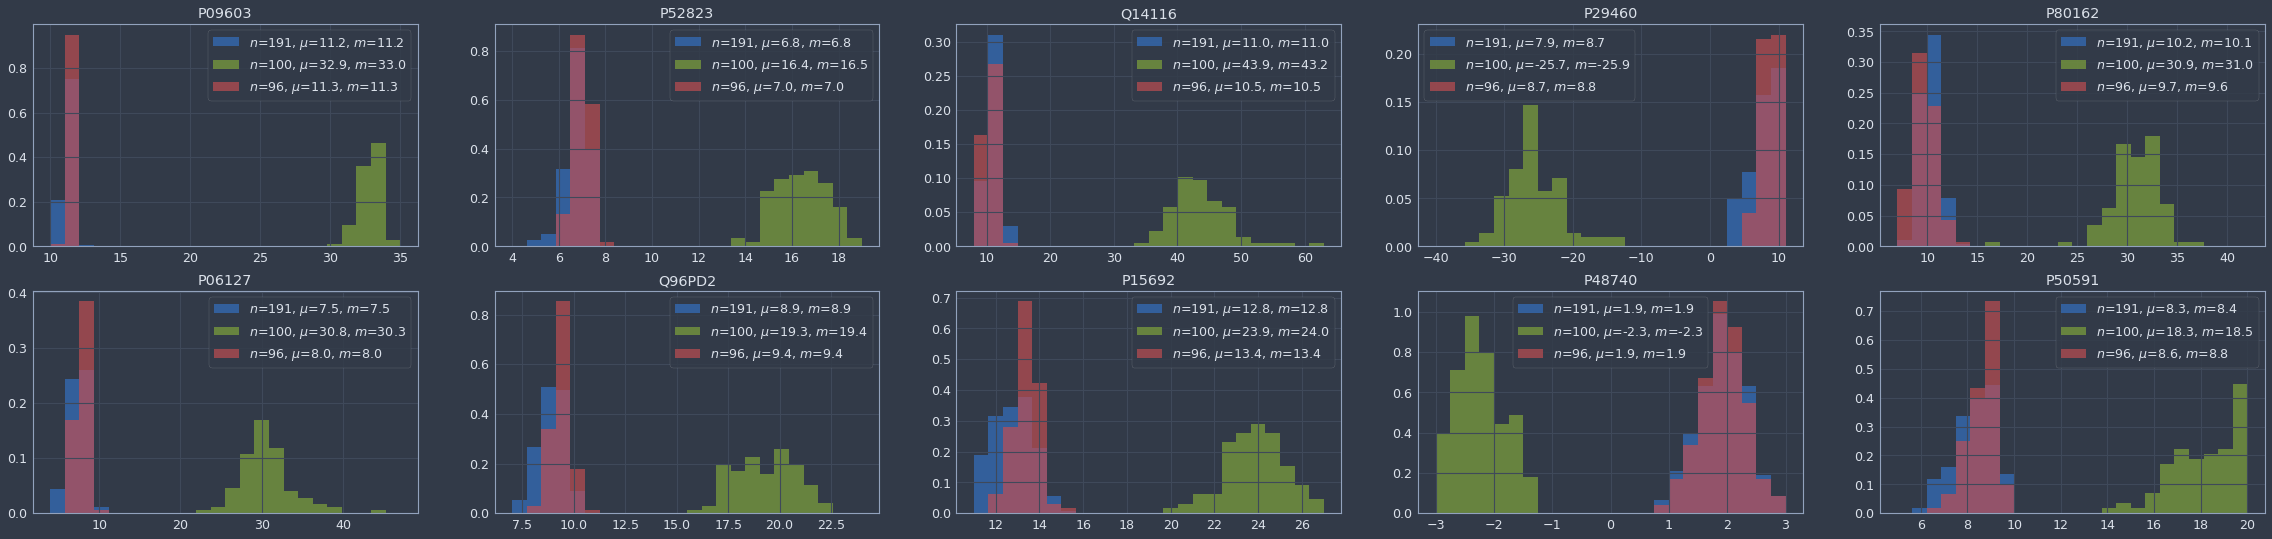

In [69]:
profstat_fig

### Multi-View Clustering

### Gene Ontology Term Enrichment

### Biomarker Search